# **Loan Default Prediction**

## **Problem Definition**

### **The Context:**

  A significant portion of retail bank profit stems from interests generated through various forms of loans, particularly home loans. These loans are typically acquired by individuals with regular income or high-earning capacity. However, banks face considerable risk when approving loans, primarily due to the potential for defaulters. Bad loans, also known as Non-Performing Assets (NPA), can substantially erode a bank's profits and stability. Therefore, it is essential for banks to exercise prudence and diligence in the loan approval process to mitigate the risk of defaults.

  The traditional manual approach to loan approval is not only labor-intensive but also susceptible to errors and biases. Human judgment in assessing creditworthiness can lead to inconsistencies and inaccuracies, potentially resulting in incorrect approvals or rejections.

  There is an opportunity to automate and enhance the loan approval process through Data Science and Machine Learning. By leveraging data-driven models, banks can make more informed and objective decisions, leading to improved efficiency, accuracy, and risk management.

### **The objective:**

  The primary objective is to build a classification model capable of predicting clients who are likely to default on their loans. Additionally, the goal is to provide actionable recommendations to the bank based on the important features identified by the model. These recommendations will guide the bank in making informed decisions while approving loans, thereby reducing the risk of defaults and minimizing potential losses.

### **The key questions:**

  1. **Which factors contribute to the likelihood of loan default?**
     Understanding the key determinants of loan default is essential for building an effective predictive model. Identifying these factors will enable the bank to assess the creditworthiness of applicants more accurately and allocate resources accordingly.

  2. **How can we leverage historical loan data to predict future defaults?**
     By analyzing historical loan data from past applicants who have been granted credit, we can identify patterns and trends that indicate a higher risk of default. Leveraging this information will help in developing a predictive model that can forecast potential defaults with greater accuracy.

  3. **What features should be considered in the credit scoring model?**
     Determining the most relevant features or attributes to include in the credit scoring model is crucial. Features such as income level, credit history, employment status, debt-to-income ratio, and loan amount are likely to play a significant role in predicting loan defaults.

  4. **How interpretable should the model be to justify loan approval decisions?**
     While predictive accuracy is essential, the model must also be interpretable to provide justifications for loan approval decisions, especially in cases of adverse outcomes or rejections. Ensuring interpretability will enhance transparency and trust in the decision-making process.

### **The problem formulation**:

  Using data science, we aim to develop a robust classification model that can effectively predict which clients are likely to default on their loans. This model will analyze historical loan data, identify patterns and trends indicative of default risk, and assign a probability of default to each applicant. By leveraging machine learning algorithms and predictive modeling techniques, we seek to automate and enhance the loan approval process, enabling the bank to make more informed and objective decisions. Additionally, the model will provide insights into the key features driving loan defaults, allowing the bank to prioritize these factors during the approval process and mitigate potential risks effectively. Ultimately, the goal is to improve the efficiency, accuracy, and reliability of loan approvals while minimizing the impact of defaults on the bank's profitability and stability.

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property. 

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts) 

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments). 

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due). 

* **CLAGE:** Age of the oldest credit line in months. 

* **NINQ:** Number of recent credit inquiries. 

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## **Import the necessary libraries and Data**

In [1]:
# Importing warnings module to suppress specific types of warnings
import warnings

# Suppressing specific types of warnings for cleaner output
warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# Setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To build models for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report,recall_score,precision_score, accuracy_score
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get different metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    classification_report,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

## **Data Overview**

- Reading the dataset
- Understanding the shape of the dataset
- Checking the data types
- Checking for missing values
- Checking for duplicated values

In [2]:
# Load the data frame to the IDE. 
Loan_df = pd.read_csv('hmeq.csv')

In [3]:
# Display the first five rows of the data frame 'Loan_df'.
Loan_df.head()

BAD  LOAN     MORTDUE        VALUE   REASON     JOB      YOJ   DEROG  \
0    1  1100 25860.00000  39025.00000  HomeImp   Other 10.50000 0.00000   
1    1  1300 70053.00000  68400.00000  HomeImp   Other  7.00000 0.00000   
2    1  1500 13500.00000  16700.00000  HomeImp   Other  4.00000 0.00000   
3    1  1500         NaN          NaN      NaN     NaN      NaN     NaN   
4    0  1700 97800.00000 112000.00000  HomeImp  Office  3.00000 0.00000   

   DELINQ     CLAGE    NINQ     CLNO  DEBTINC  
0 0.00000  94.36667 1.00000  9.00000      NaN  
1 2.00000 121.83333 0.00000 14.00000      NaN  
2 0.00000 149.46667 1.00000 10.00000      NaN  
3     NaN       NaN     NaN      NaN      NaN  
4 0.00000  93.33333 0.00000 14.00000      NaN

In [4]:
# Display the last five rows of the data frame 'Loan_df'
Loan_df.tail()

BAD   LOAN     MORTDUE       VALUE   REASON    JOB      YOJ   DEROG  \
5955    0  88900 57264.00000 90185.00000  DebtCon  Other 16.00000 0.00000   
5956    0  89000 54576.00000 92937.00000  DebtCon  Other 16.00000 0.00000   
5957    0  89200 54045.00000 92924.00000  DebtCon  Other 15.00000 0.00000   
5958    0  89800 50370.00000 91861.00000  DebtCon  Other 14.00000 0.00000   
5959    0  89900 48811.00000 88934.00000  DebtCon  Other 15.00000 0.00000   

      DELINQ     CLAGE    NINQ     CLNO  DEBTINC  
5955 0.00000 221.80872 0.00000 16.00000 36.11235  
5956 0.00000 208.69207 0.00000 15.00000 35.85997  
5957 0.00000 212.27970 0.00000 15.00000 35.55659  
5958 0.00000 213.89271 0.00000 16.00000 34.34088  
5959 0.00000 219.60100 0.00000 16.00000 34.57152

In [5]:
'''
"dataframe.shape" in Pandas returns a tuple (a,b)that gives the dimensions of the data frame
 (a,b)= (number of rows, number of columns)
'''

print(Loan_df.shape) # Print the number of rows and columns in the data frame

print('_'*55)   # Print separator line

#Print the message indicating the number of rows and columns.
print('There are',Loan_df.shape[0],'rows and',Loan_df.shape[1],'columns present in the data.')

(5960, 13)
_______________________________________________________
There are 5960 rows and 13 columns present in the data.


In [6]:
# Check and print the number of duplicated data.

duplicate = Loan_df.duplicated().sum()

print('There is', duplicate, ' duplicate in the data.') 

There is 0  duplicate in the data.


In [7]:
# Display information about the type, structure, and characteristics of data in the data frame 'Loan_df'
Loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


***Observations:***

* *There are 5960 rows and 13 features in the data.*
* *Only the features `'BAD'` and `'LOAN'` have 5960 observations, all the other features have fewer observations than the number of rows in the DataFrame, indicating that there are null values in them.*
* *The features `'BAD'`, and `'LOAN'` read as 'int64' data type. The features `'REASON'`, and `'JOB'` read as 'object' data type, but should be categorical variables. The rest of the features in the DataFrame read as 'float64' data type.*

*`There are missing values in all features in the dataset, except in features 'BAD' and 'LOAN'`.*



In [8]:
# Checking the missing values further

def missing_values_info(df):
    """
    Find missing value counts and percentages for each feature in a DataFrame.

    Parameters:
        - df: DataFrame containing the data.

    Returns:
        - DataFrame containing missing value counts and percentages.
    """
    # Calculate missing value counts for each feature
    missing_counts = df.isnull().sum()

    # Calculate missing value percentages for each feature
    missing_percentages = (missing_counts / len(df)) * 100

    # Create a DataFrame to store missing value information
    missing_values = pd.DataFrame({
        'Missing Value Count': missing_counts,
        'Missing Value Percentage': missing_percentages
    })

    return missing_values


In [9]:
# Checking missing value count and percentage in the dataset
missing_values_df = missing_values_info(Loan_df)
missing_values_df

Missing Value Count  Missing Value Percentage
BAD                        0                   0.00000
LOAN                       0                   0.00000
MORTDUE                  518                   8.69128
VALUE                    112                   1.87919
REASON                   252                   4.22819
JOB                      279                   4.68121
YOJ                      515                   8.64094
DEROG                    708                  11.87919
DELINQ                   580                   9.73154
CLAGE                    308                   5.16779
NINQ                     510                   8.55705
CLNO                     222                   3.72483
DEBTINC                 1267                  21.25839

***Observations:***

* *The above output shows the missing value count and percentage in each feature in the dataset.*
* *We will proceed with the treatment of missing values after we analyze the distribution of each feature.*


**Summary Statistics**

* Observations from Summary Statistics

In [10]:
"""
The method describe() generates descriptive statistics such as count, mean value, standard deviation, 
min value, 25th percentile, 50th percentile, 75th percentile, and max value 
"""

# Display descriptive statistics for all columns (count, mean, std, min, 25%, 50%, 75%, and max)
Loan_df.describe().T

count         mean         std        min         25%  \
BAD     5960.00000      0.19950     0.39966    0.00000     0.00000   
LOAN    5960.00000  18607.96980 11207.48042 1100.00000 11100.00000   
MORTDUE 5442.00000  73760.81720 44457.60946 2063.00000 46276.00000   
VALUE   5848.00000 101776.04874 57385.77533 8000.00000 66075.50000   
YOJ     5445.00000      8.92227     7.57398    0.00000     3.00000   
DEROG   5252.00000      0.25457     0.84605    0.00000     0.00000   
DELINQ  5380.00000      0.44944     1.12727    0.00000     0.00000   
CLAGE   5652.00000    179.76628    85.81009    0.00000   115.11670   
NINQ    5450.00000      1.18606     1.72867    0.00000     0.00000   
CLNO    5738.00000     21.29610    10.13893    0.00000    15.00000   
DEBTINC 4693.00000     33.77992     8.60175    0.52450    29.14003   

                50%          75%          max  
BAD         0.00000      0.00000      1.00000  
LOAN    16300.00000  23300.00000  89900.00000  
MORTDUE 65019.00000  91488.00000 399550.00000  
VALUE   89235.50000 119824.25000 855909.00000  
YOJ         7.00000     13.00000     41.00000  
DEROG       0.00000      0.00000     10.00000  
DELINQ      0.00000      0.00000     15.00000  
CLAGE     173.46667    231.56228   1168.23356  
NINQ        1.00000      2.00000     17.00000  
CLNO       20.00000     26.00000     71.00000  
DEBTINC    34.81826     39.00314    203.31215

***Observations:***

* *There is a significant discrepancy between the third quartile and the highest value for the following features: the amount of loan approved (`LOAN`), the amount due on the existing mortgage (`MORTDUE`), the current value of the property (`VALUE`), the years at present job (`YOJ`), the age of the oldest credit line in months (`CLAGE`), the number of recent credit inquiries (`NINQ`), the number of existing credit lines (`CLNO`), and the debt-to-income ratio (`DEBTINC`), indicating that these variables may have outliers to the right.*

***By default, the describe() function shows the summary of numeric variables only. Let's check the summary of non-numeric variables.*** 





In [11]:
# Summary statistics of categorical variable present in the dataset
Loan_df.describe(exclude = 'number').T

count unique      top  freq
REASON  5708      2  DebtCon  3928
JOB     5681      6    Other  2388

***Observations:***

* *The feature `REASON` has two unique categories. The category `DebtCon` has occurred 3,928 times in the data.*
* *The feature `JOB` has six unique categories. The category `Other` has occurred more often.*

***Let's check the count of each unique category in the feature `JOB`.***


In [12]:
# Printing number of count of each unique value in the feature 'JOB'
Loan_df['JOB'].value_counts()

JOB
Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: count, dtype: int64

***Observations:***

* *From the most frequent to the least, the unique category in the feature **`JOB`** are `Other`, `ProExe`, `Office`, `Mgr`, `Self`, and `Sales`.*

### Exploratory Data Analysis (EDA) and Visualization


* EDA is an important part of any project involving data.
* It is important to investigate and understand the data better before building a model with it.
* A few questions have been mentioned below which will help you approach the analysis in the right manner and understand generated insights from the data.

**Keys questions answered throughout this analysis**:

1. What is the range of values for the loan amount variable "LOAN"?
2. How does the distribution of years at present job "YOJ" vary across the dataset?
3. How many unique categories are there in the REASON variable?
4. What is the most common category in the JOB variable?
5. Is there a relationship between the REASON variable and the proportion of applicants who defaulted on their loan?
6. Do applicants who default have a significantly different loan amount compared to those who repay their loan?
7. Is there a correlation between the value of the property and the loan default rate?
8. Do applicants who default have a significantly different mortgage amount compared to those who repay their loan?


### **Univariate Analysis**


In [13]:
def histogram_boxplot(feature, figsize=(15, 10), bins="auto"):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (15, 10))
    bins: number of bins (default "auto")
    """
    f, (ax_box, ax_hist) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid
        sharex=True,  # The X-axis will be shared among all the subplots
        gridspec_kw={"height_ratios": (.25, .75)},
        figsize=figsize
    )

    # Creating the subplots
    # Boxplot will be created and the mean value of the column will be indicated using some symbol
    sns.boxplot(x=feature, ax=ax_box, showmeans=True, color='red')

    # For histogram
    sns.histplot(x=feature, kde=False, ax=ax_hist, bins=bins)
    ax_hist.axvline(np.mean(feature), color='g', linestyle='--')      # Add mean to the histogram
    ax_hist.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

    plt.show()

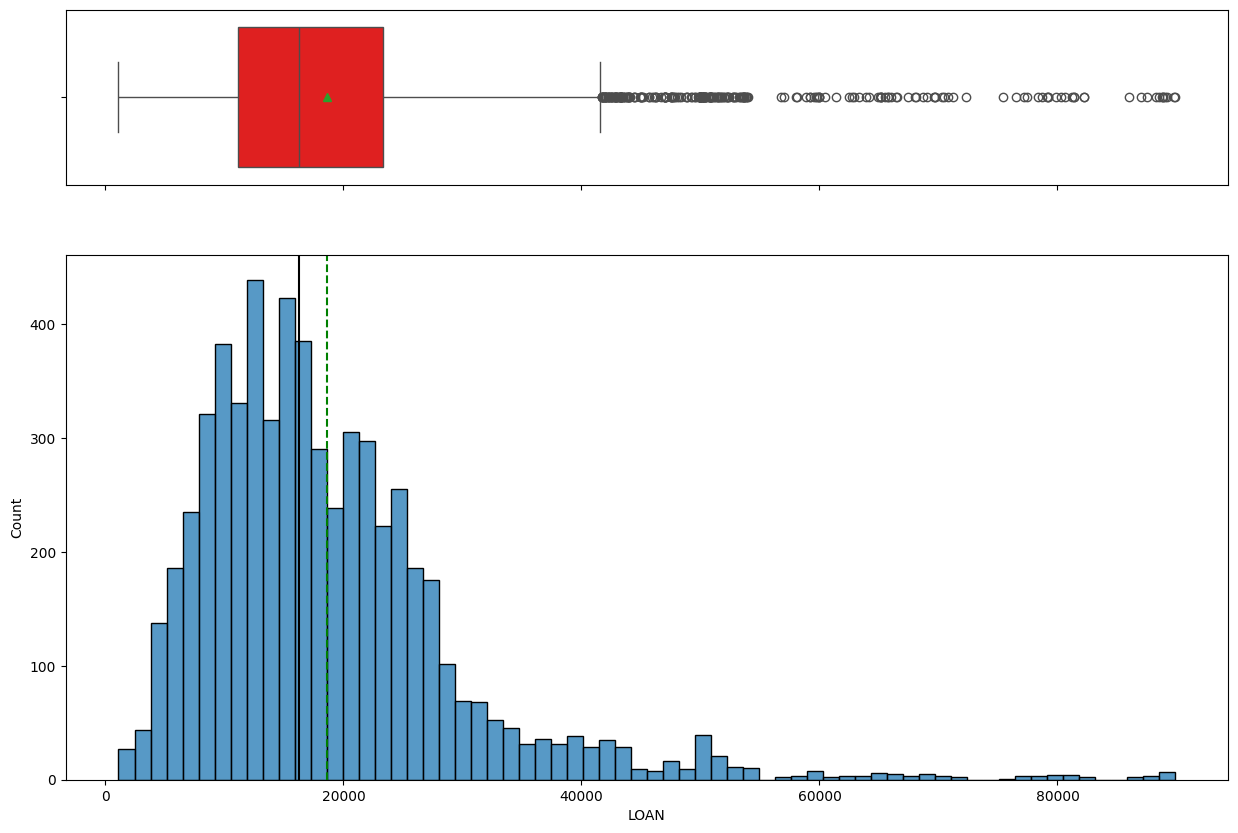

In [14]:
# Create a histogram with a corresponding box plot for the 'LOAN' column
histogram_boxplot(Loan_df.LOAN)

***Observations:***

* *The distribution of the approved loan amounts (represented by the feature: `LOAN`) is skewed to the right. There are outliers in the feature.*
* *The best estimate of the central tendency of this feature is the median. This is because the mean is heavily influenced by the presence of outliers, whereas the median is more robust to extreme values.*


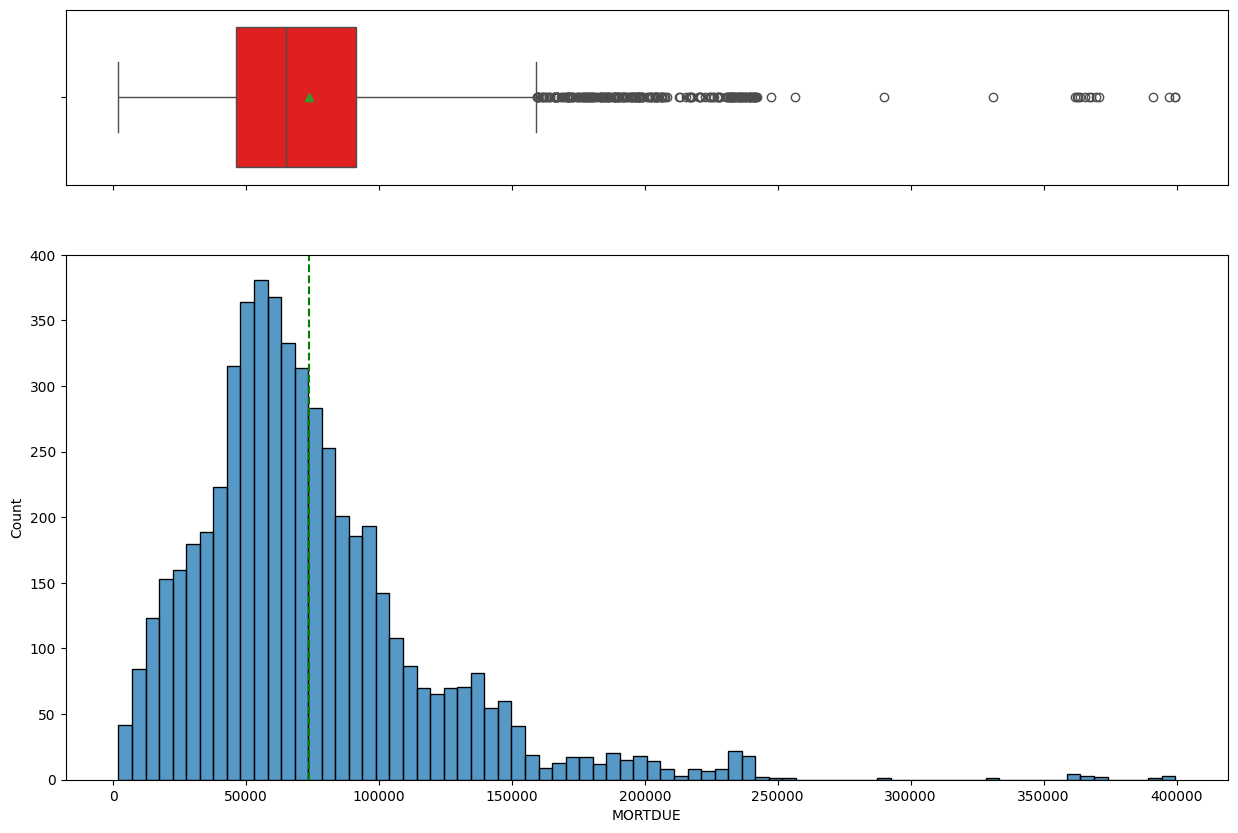

In [15]:
# Create a histogram with a corresponding box plot for the 'MORTDUE' column
histogram_boxplot(Loan_df.MORTDUE)

***Observations:***

* *The distribution of the existing mortgage amounts (represented by the feature: `MORTDUE`) is skewed to the right. There are outliers in the data.* 
* *The best estimate of the central tendency of this feature is the median. This is because the mean is heavily influenced by the presence of outliers, whereas the median is more robust to extreme values.*



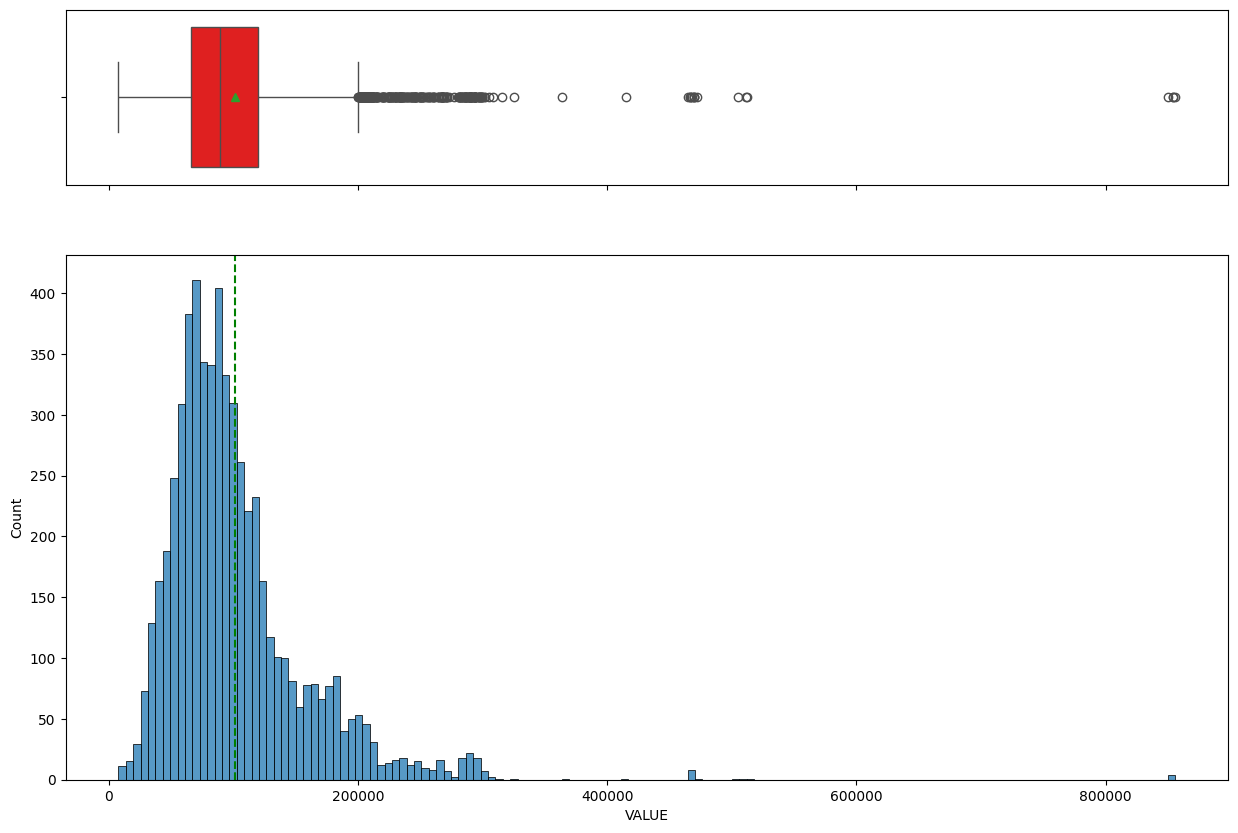

In [16]:
# Create a histogram with a corresponding box plot for the 'VALUE' column
histogram_boxplot(Loan_df.VALUE)

***Observations:***

* *The distribution of the current value of the properties (represented by the feature: `VALUE`) is skewed to the right. There are outliers in the feature.*
* *The best estimate of the central tendency of this feature is the median. This is because the mean is heavily influenced by the presence of outliers, whereas the median is more robust to extreme values.*


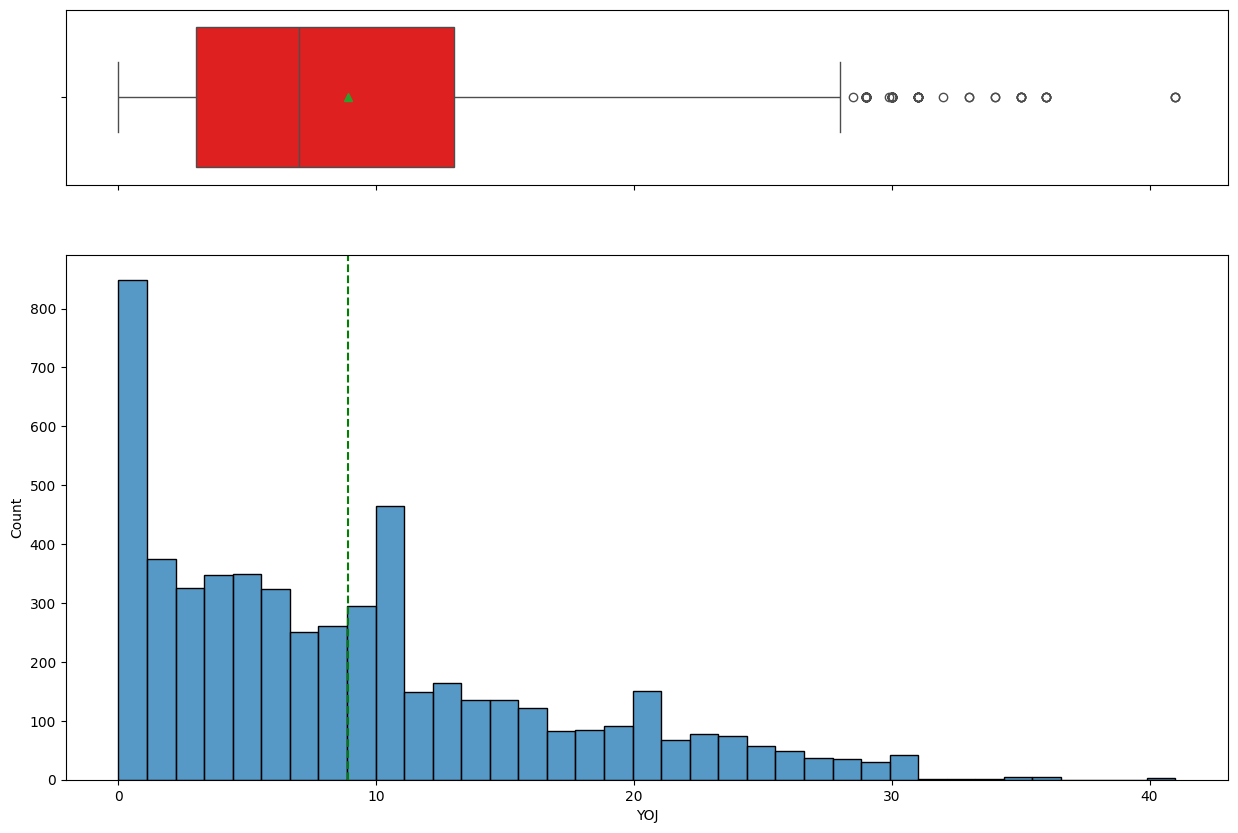

In [17]:
# Create a histogram with a corresponding box plot for the 'YOJ' column
histogram_boxplot(Loan_df.YOJ)

***Observations:***

* *The distribution of the number of years at present job (represented by the feature: `YOJ`) is skewed to the right. There are outliers in the feature.*
* *The best estimate of the central tendency of this feature is the median. This is because the mean is heavily influenced by the presence of outliers, whereas the median is more robust to extreme values.*


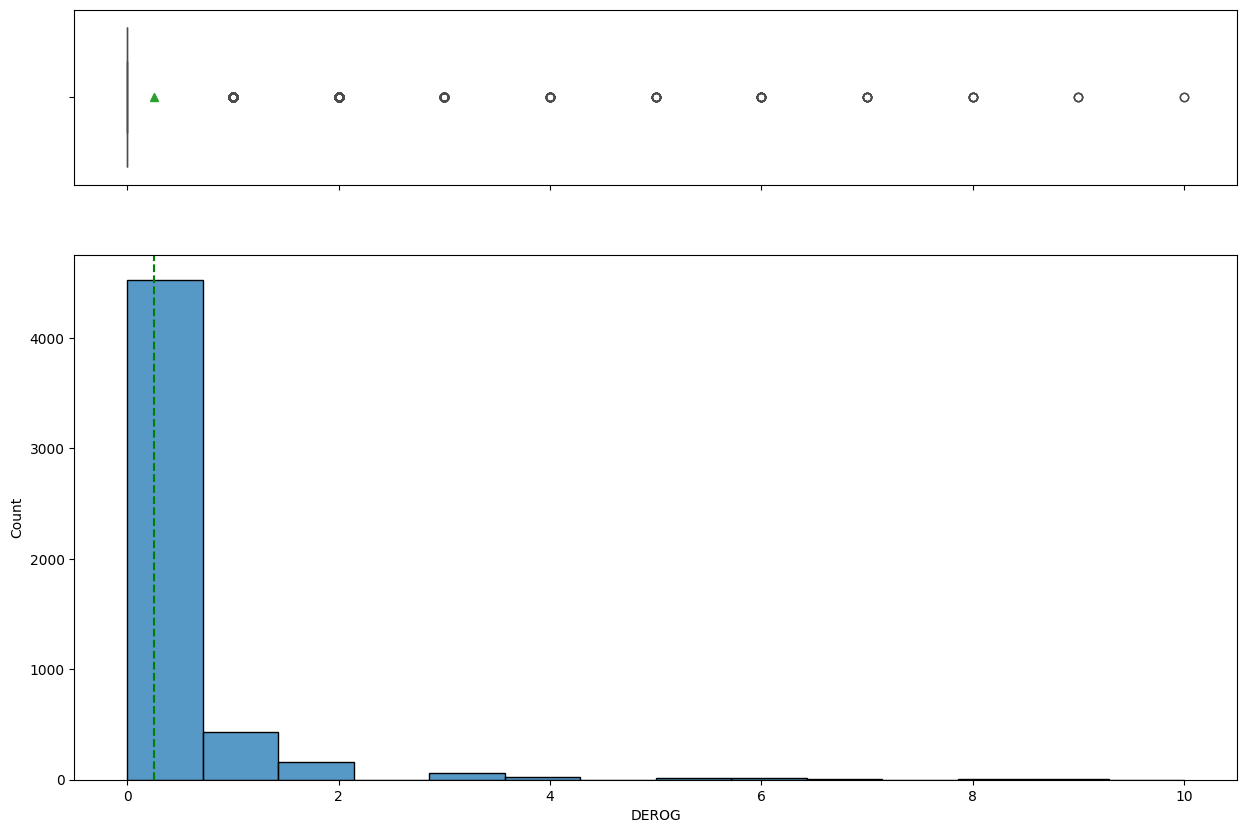

In [18]:
# Create a histogram with a corresponding box plot for the 'DEROG' column
histogram_boxplot(Loan_df.DEROG)

***Observations:***

* *The distribution of the number of major derogatory reports (represented by the feature: `DEROG`) is skewed to the right. There are outliers in the data.*

* *The best estimate of the central tendency of this feature is the median. This is because the mean is heavily influenced by the presence of outliers, whereas the median is more robust to extreme values.*


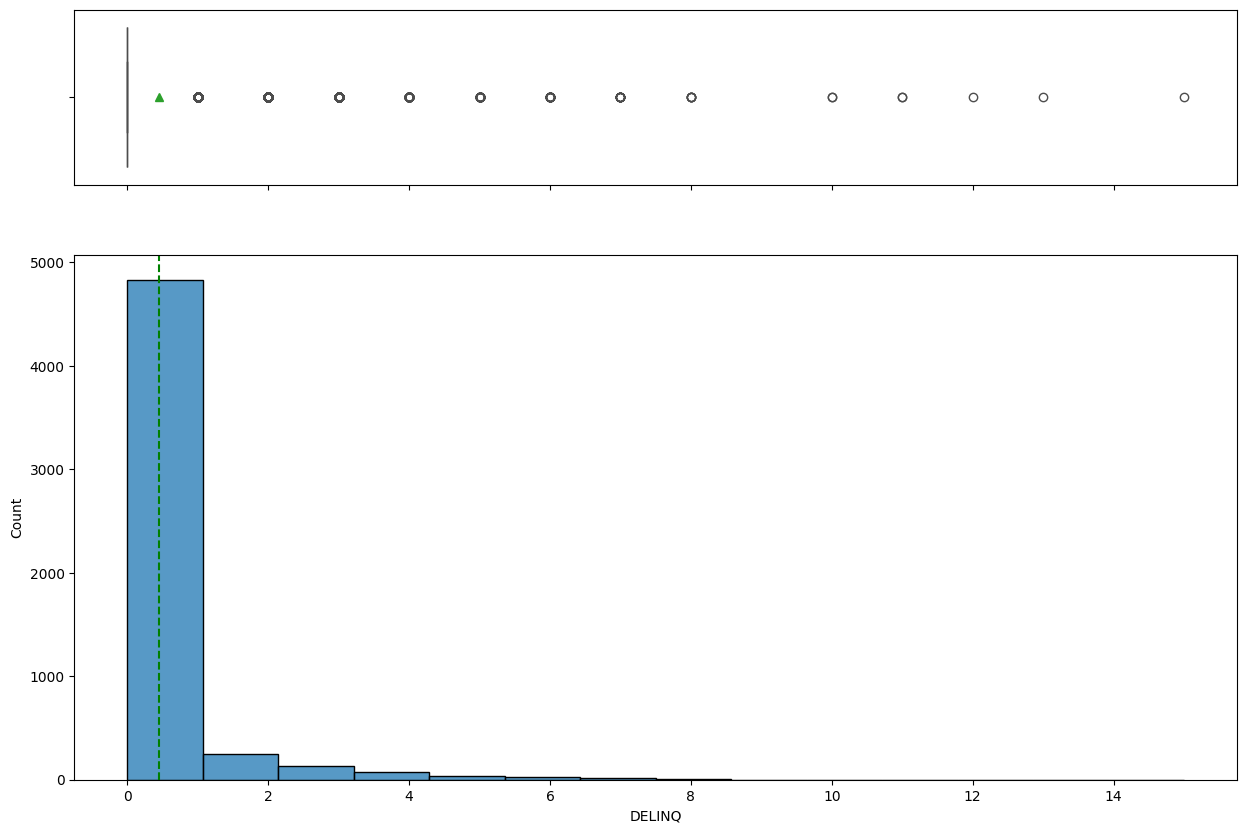

In [19]:
# Create a histogram with a corresponding box plot for the 'DELINQ' column
histogram_boxplot(Loan_df.DELINQ)

***Observations:***

* *The distribution of the number of delinquent credit lines (represented by the feature: `DELINQ`) is skewed to the right. There are outliers in the feature.*

* *The best estimate of the central tendency of this feature is the median. This is because the mean is heavily influenced by the presence of outliers, whereas the median is more robust to extreme values.*


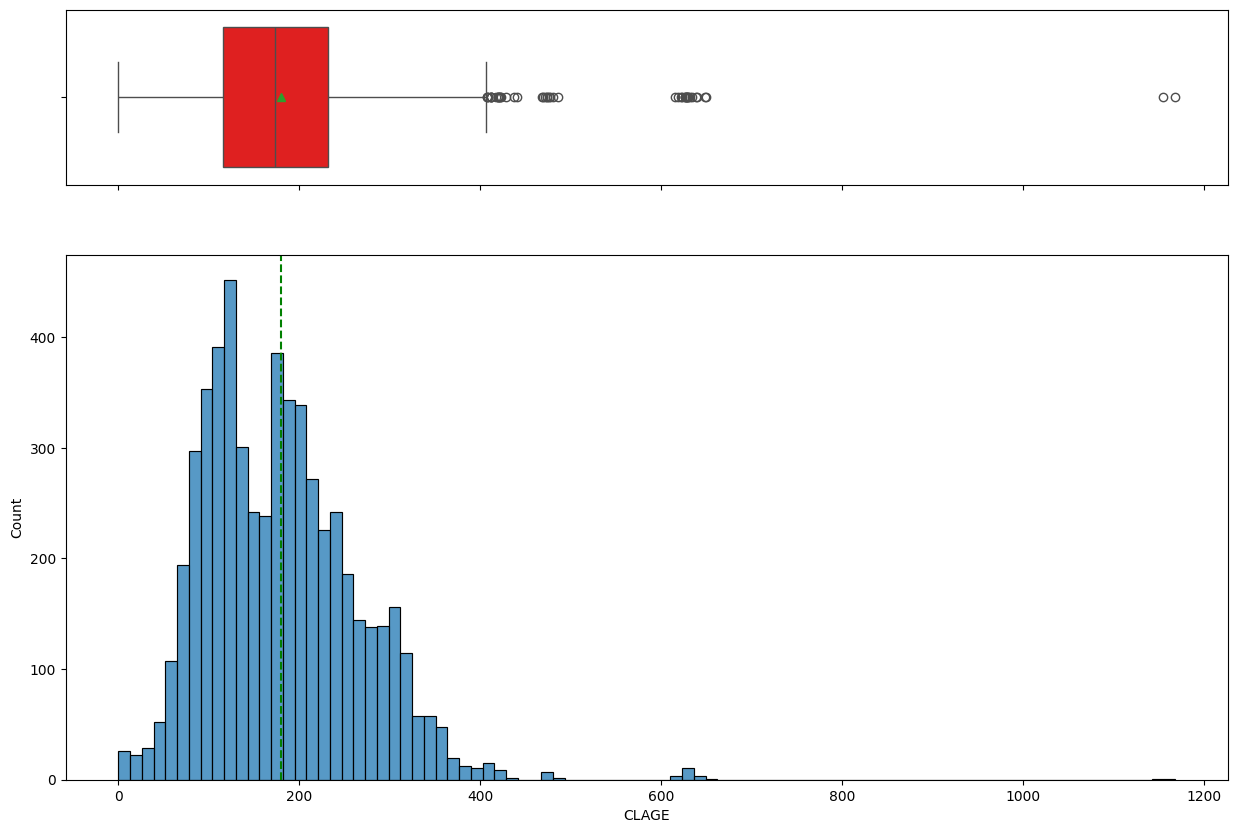

In [20]:
# Create a histogram with a corresponding box plot for the 'CLAGE' column
histogram_boxplot(Loan_df.CLAGE)

***Observations:***

* *The distribution of the ages of the oldest credit line in months (represented by the feature: `CLAGE`) is roughly symmetric. There are outliers in the feature.* 
  
* *The best estimate of the central tendency of this feature is the median.*


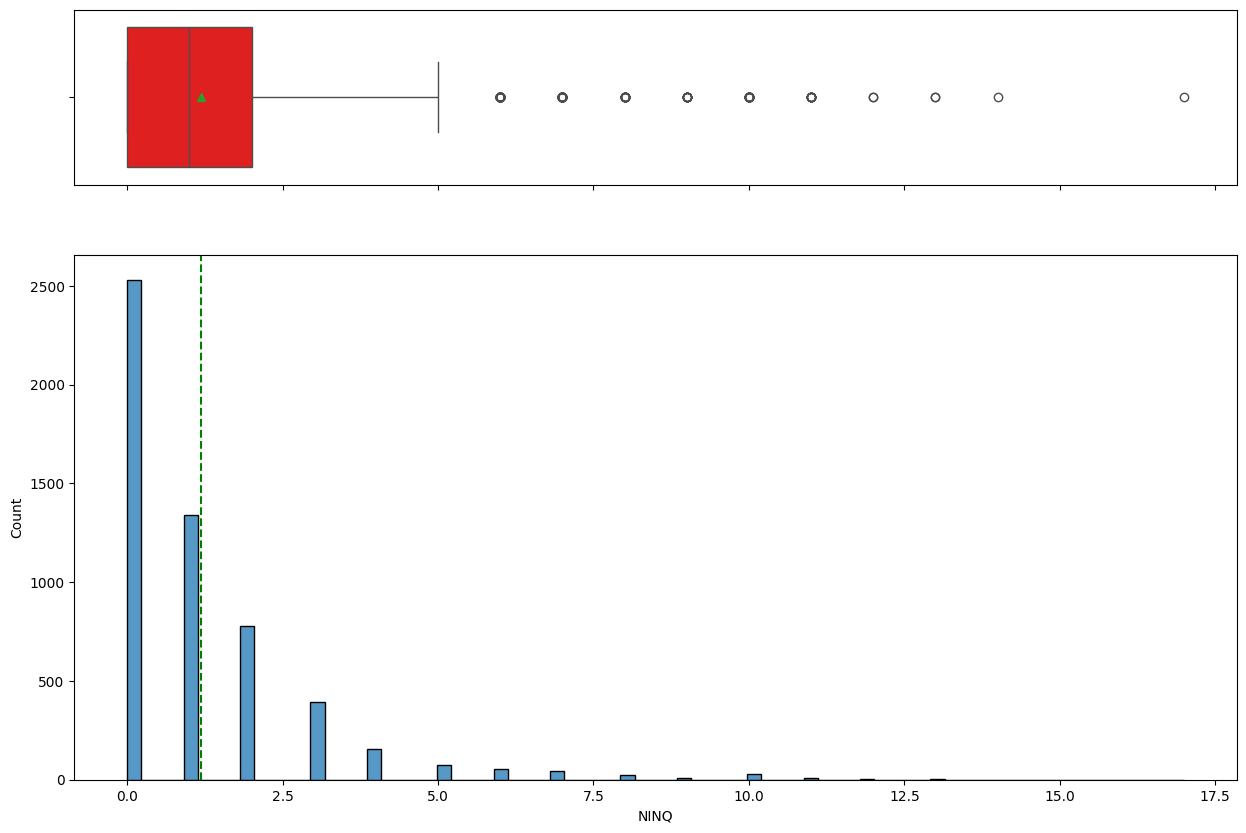

In [21]:
# Create a histogram with a corresponding box plot for the 'NINQ' column
histogram_boxplot(Loan_df.NINQ)

***Observations:***

* *The distribution of the number of recent credit inquiries (represented by the feature: `NINQ`) is skewed to the right. There are outliers in the feature.* 
* *The best estimate of the central tendency of this feature is the median.*

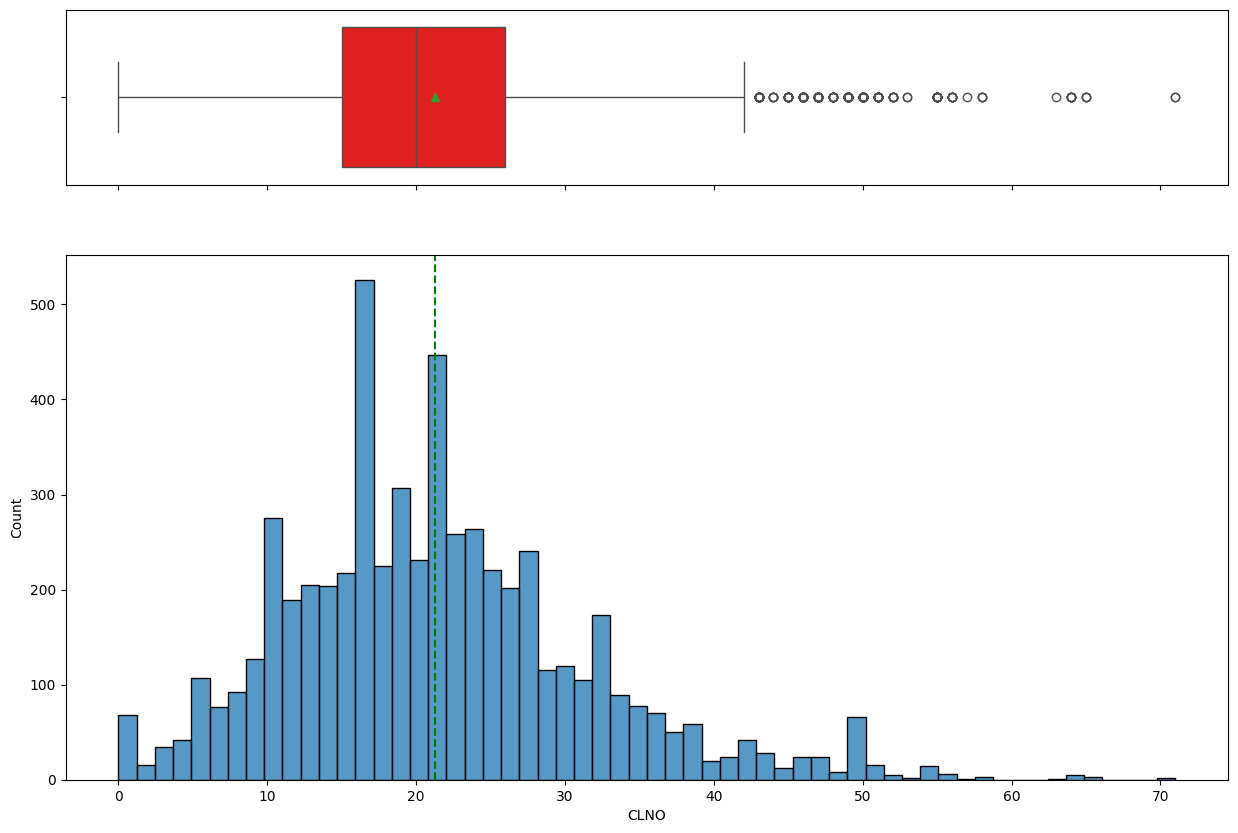

In [22]:
# Create a histogram with a corresponding box plot for the 'CLNO' column
histogram_boxplot(Loan_df.CLNO)

***Observations:***

* *The distribution of the number of existing credit lines (represented by the feature: `CLNO`) is skewed to the right. There are outliers in the data.*
* *The best estimate of the central tendency of this feature is the median.*

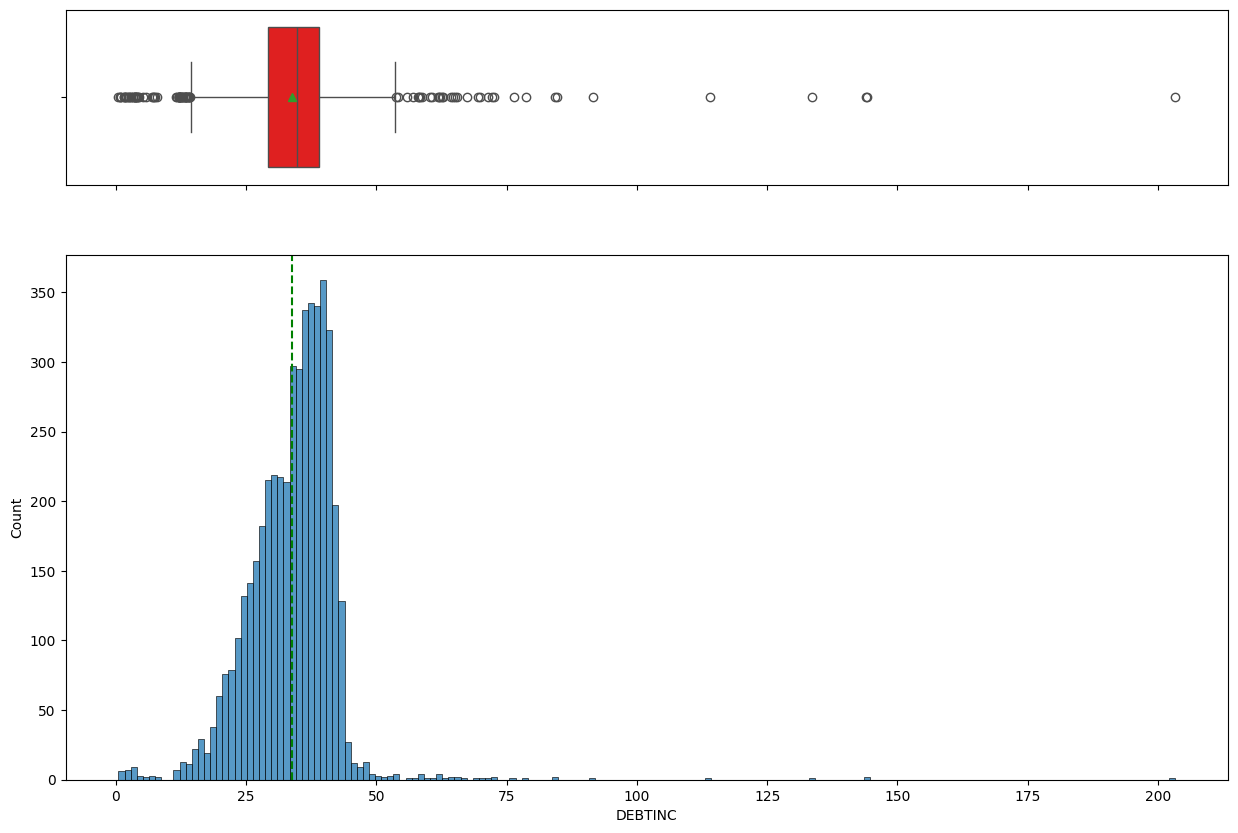

In [23]:
# Create a histogram with a corresponding box plot for the 'DEBTINC' column
histogram_boxplot(Loan_df.DEBTINC)

***Observations:***

* *The distribution of the number of recent credit inquiries (represented by the feature: `DEBTINC`) is skewed to the left. There are outliers in the feature.*

* *The best estimate of the central tendency of this feature is the median.*


In [24]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """
    # Create a figure with adjustable width and height
    plt.figure(figsize=(n + 1 if n is not None else data[feature].nunique() + 1, 5))
    
    # Plot the countplot
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    # Get the total count of values in the feature
    total = len(data[feature])
    
    # Set x-axis labels rotation and font size
    plt.xticks(rotation=75, fontsize=15)
    
    # Annotate each bar with percentage or count
    for p in ax.patches:
        label = "{:.1f}%".format(100 * p.get_height() / total) if perc else p.get_height()
        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot
        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )
    
    # Show the plot
    plt.show()


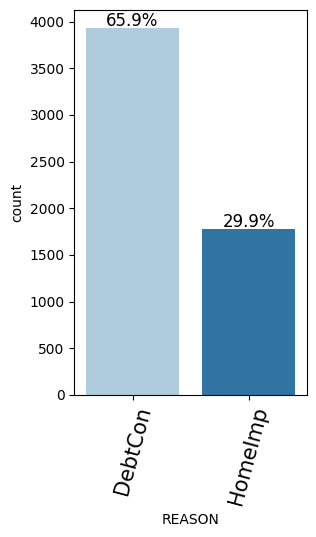

In [25]:
# Create a labeled bar plot for the 'REASON' column
labeled_barplot(Loan_df, 'REASON', perc=True, n=None) 

***Observations:***

* *The distribution of loan request reasons (represented by the feature: `REASON`) reveals only two values: approximately 70% of loans are for debt consolidation (`DebtCon`), while the remaining 30% are for home improvement (`HomeImp`).*
* *The most suitable measure of central tendency for this feature is the mode, which indicates the most frequently occurring reason for loan requests.*



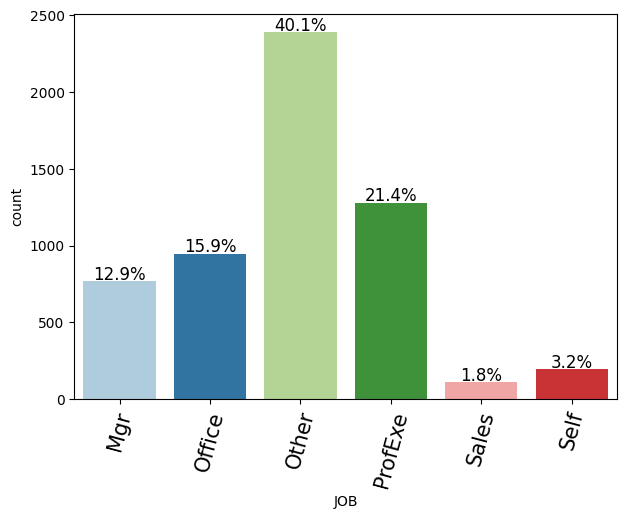

In [26]:
# Create a labeled bar plot for the 'JOB' column
labeled_barplot(Loan_df, 'JOB', perc=True, n=None)

***Observations:***

* *The distribution of job types among loan applicants (represented by the feature: `JOB`) consists of six categories: approximately 40% of applicants have jobs categorized as `Other`, 21% are professional executives (`ProfExe`), 16% work in office positions (`Office`), 13% hold managerial positions (`Mgr`), 3% are self-employed (`Self`), and 2% are in sales roles (`Sales`).*
* *The most appropriate measure of central tendency for this feature is the mode, which represents the most commonly occurring job type among loan applicants.*

BAD
0    4771
1    1189
Name: count, dtype: int64


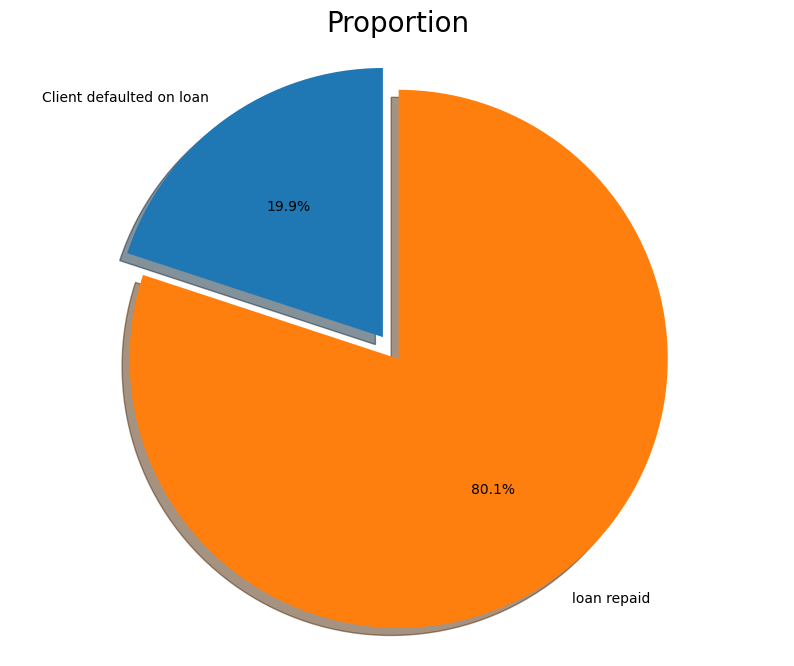

In [27]:
'''
Display a pie chart with the proportions of values in the Target's column, that's column 'BAD'.
'''

# Print value counts of the 'status' column
print(Loan_df['BAD'].value_counts())

# Define labels and sizes for the pie chart to represent the proportion of the values in the column 'status'
labels = ['Client defaulted on loan', 'loan repaid']
sizes = [Loan_df['BAD'].eq(1).sum(), Loan_df['BAD'].eq(0).sum()]

# Define explode for the pie chart
explode = (0, 0.1)

# Create pie chart
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title("Proportion", size=20)
plt.show()

***Observations:***

*In the dataset, 4771 clients, accounting for approximately 80.1%, successfully paid their loans, while the remaining 1189 clients, equivalent to 19.9%, defaulted on their loans.*

*This observation highlights an imbalance in the distribution of classes for the target variable `BAD`. Approximately 80.1% of the dataset comprises clients who paid their loans, indicating a skewed distribution towards this class. Therefore, this dataset and associated problem statement exemplify an instance of imbalanced classification. Such a scenario presents distinct challenges compared to classification tasks involving balanced target variables.*

In [28]:
# Create a summary count of the variable in the categorical features of the DataFrame.
# Identify categorical columns in the DataFrame
cat_cols = Loan_df.select_dtypes(include=['object']).columns.tolist()

# Printing the count subcategories of each category.
for i in cat_cols:

    print(Loan_df[i].value_counts(normalize = False, dropna=False))

    print('*' * 40)

REASON
DebtCon    3928
HomeImp    1780
NaN         252
Name: count, dtype: int64
****************************************
JOB
Other      2388
ProfExe    1276
Office      948
Mgr         767
NaN         279
Self        193
Sales       109
Name: count, dtype: int64
****************************************



***The summary count of the variable in the categorical features of the DataFrame confirms the observation from the descriptive statistics and the bar plots we ran earlier***



### **Bivariate and Multivariate Analysis**

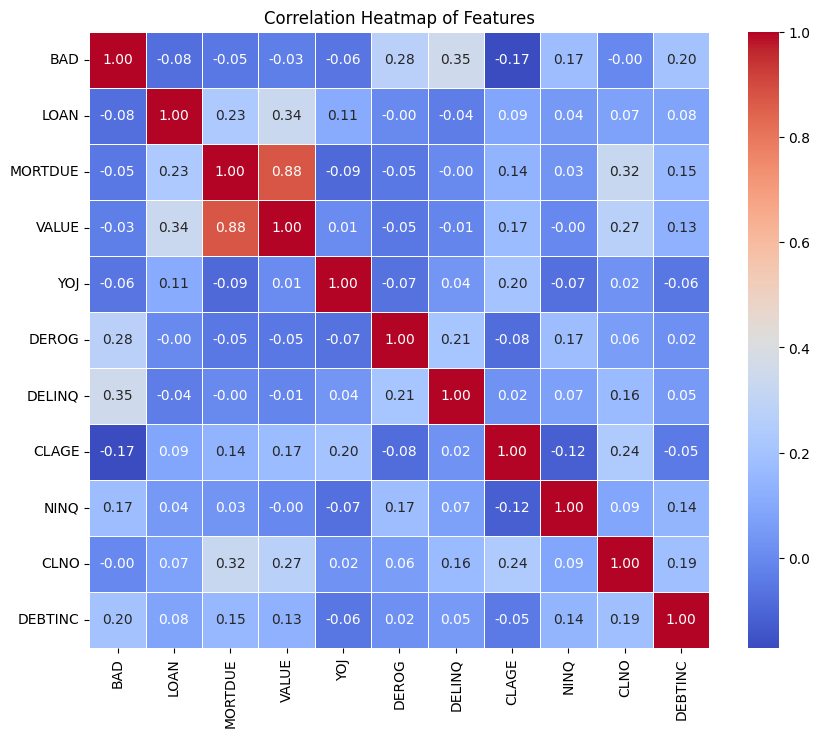

In [29]:
 # Calculate correlation matrix of numerical features
correlation_matrix = Loan_df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

***Observations:***

* *There's a strong positive correlation of `0.88` between the current property values (`VALUE`) and the existing mortgage amounts (`MORTDUE`).*
* *A weak positive correlation of `0.35` exists between the target variable `BAD` and the number of delinquent credit lines (`DELINQ`).*
* *A similar weak positive correlation of `0.28` is observed between the target variable `BAD` and the number of major derogatory reports (`DEROG`).*
* *Additionally, there's a weak positive correlation of `0.20` between `BAD` and the number of recent credit inquiries (`DEBTINC`).*
* *A weak positive correlation of `0.34` is found between approved loan amounts (`LOAN`) and current property values (`VALUE`).*
* *Similarly, a weak positive correlation of `0.23` exists between approved loan amounts (`LOAN`) and existing mortgage amounts (`MORTDUE`).*
* *There's also a weak positive correlation of `0.32` between existing mortgage amounts (`MORTDUE`) and the number of existing credit lines (`CLNO`).*
* *Furthermore, a weak positive correlation of `0.27` is observed between current property values (`VALUE`) and the number of existing credit lines (`CLNO`).*
* *There's a weak positive correlation of `0.20` between the number of years in the present job (`YOJ`) and the age of the oldest credit line in months (`CLAGE`).*
* *Lastly, a weak positive correlation of `0.21` is found between the number of major derogatory reports (`DEROG`) and the number of delinquent credit lines (`DELINQ`).*

***Let's check the correlation between the numerical and categorical variable in the same heatmap.***

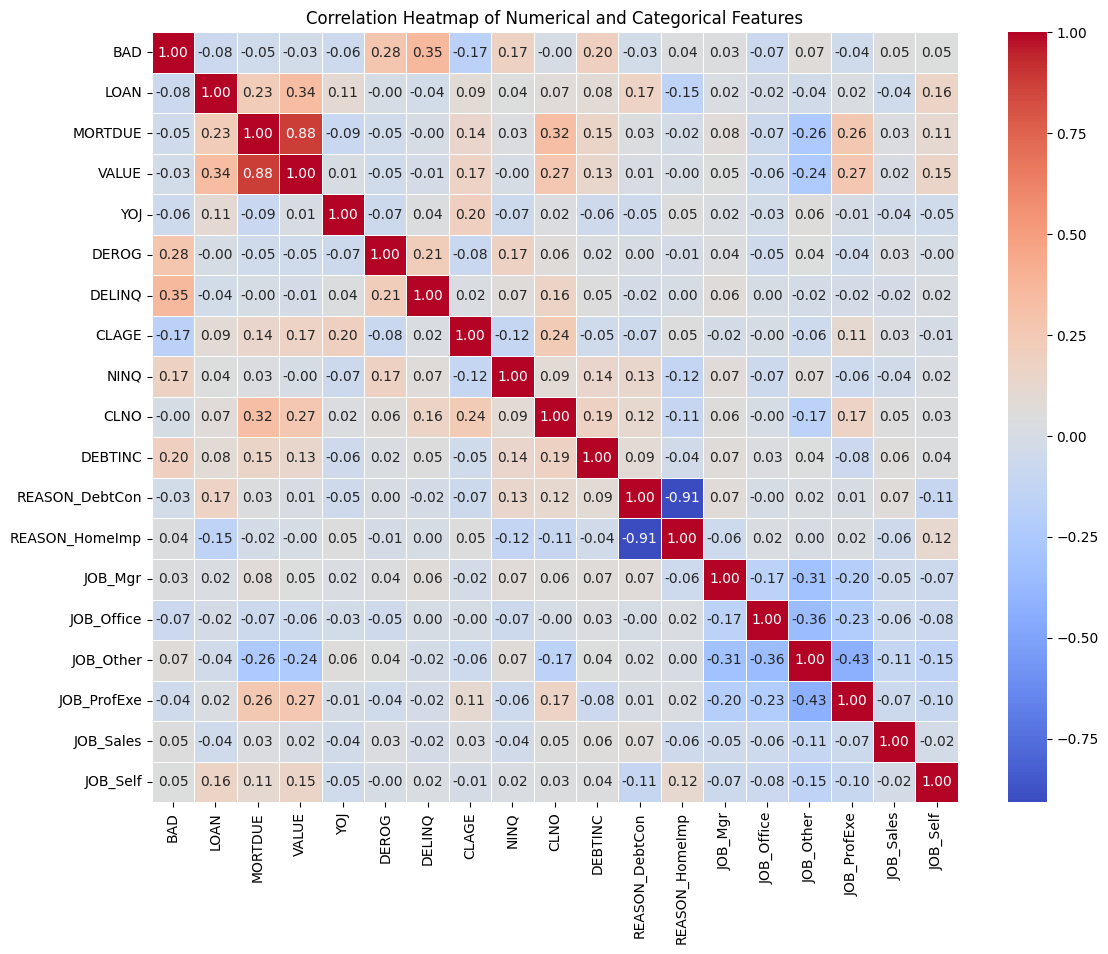

In [30]:
# Create a copy to the Dataframe to avoid changing the original DataFrame(Loan_df)
Loan_copy_df=Loan_df.copy()

# One-hot encode categorical features
Loan_copy_df_encoded = pd.get_dummies(Loan_copy_df)

# Calculate correlation matrix
correlation_matrix = Loan_copy_df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(13, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical and Categorical Features')
plt.show()

***Observations:***

* *A weak negative correlation exists between the existing mortgage amount (`MORTDUE`) and the category `"Other"` in the job type (`JOB_Other`). This suggests that as the existing mortgage amount increases, the proportion of clients in the `"Other"` job category decreases. This implies that the `"Other"` job category might not be as well-paying.*
* *Similarly, the current property values (`VALUE`) show a weak negative correlation with the `"Other"` job category (`JOB_other`). This indicates that the income from jobs categorized as `"Other"` might generally not be sufficient to afford properties with higher values.*
* *Conversely, there's a weak positive correlation between the existing mortgage amount (`MORTDUE`) and the "Professional/Executive" job category (`JOB_ProfExe`), as well as between the current property values (`VALUE`) and the "Professional/Executive" job category. This suggests that individuals in "Professional/Executive" roles tend to have sufficient income to afford either high existing mortgage amounts or properties with high values.*

*The correlations between dummy features within the same category were ignored in this observation.*


**Bivariate Analysis**

***We will represent the following relationships***

* *Relationship between the features `REASON` and the target `BAD`.*
* *Relationship between the features `LOAN` and the target `BAD`.*
* *Relationship between the features `VALUE` and the target `BAD`.*
* *Relationship between the features `MORTDUE` and the target `BAD`.*
* *Relationship between the features `DEBTINC` and the target `BAD`.*
* *Relationship between the features `DELINQ` and the target `BAD`.*
* *Relationship between the features `DEROG` and the target `BAD`.*
* *Relationship between the features `CLAGE` and the target `BAD`.*
* *Relationship between the features `NINQ` and the target `BAD`.*


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

def distribution_plot_wrt_target(data, predictor, target):
    """
    Plot distributions with respect to the target variable.

    Parameters:
        - data: DataFrame containing predictor and target variables.
        - predictor: Name of the predictor variable (column).
        - target: Name of the target variable (column).
    """

    # Create subplots
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    # Plot distributions for each unique target value
    for i, val in enumerate(data[target].unique()):
        # Determine subplot position
        row, col = divmod(i, 2)

        # Set title for each subplot
        axs[row, col].set_title(f"Distribution of {predictor} for {target}={val}")

        # Plot histogram for the current target value
        sns.histplot(data=data[data[target] == val], x=predictor, kde=True, 
                     color="teal" if i == 0 else "orange", ax=axs[row, col])

    # Plot boxplots
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
    axs[1, 0].set_title(f"Boxplot of {predictor} w.r.t {target}")

    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 1], showfliers=False, palette="gist_rainbow")
    axs[1, 1].set_title(f"Boxplot (without outliers) of {predictor} w.r.t {target}")

    # Adjust layout for better visualization
    plt.tight_layout()
    # Display the plot
    plt.show()


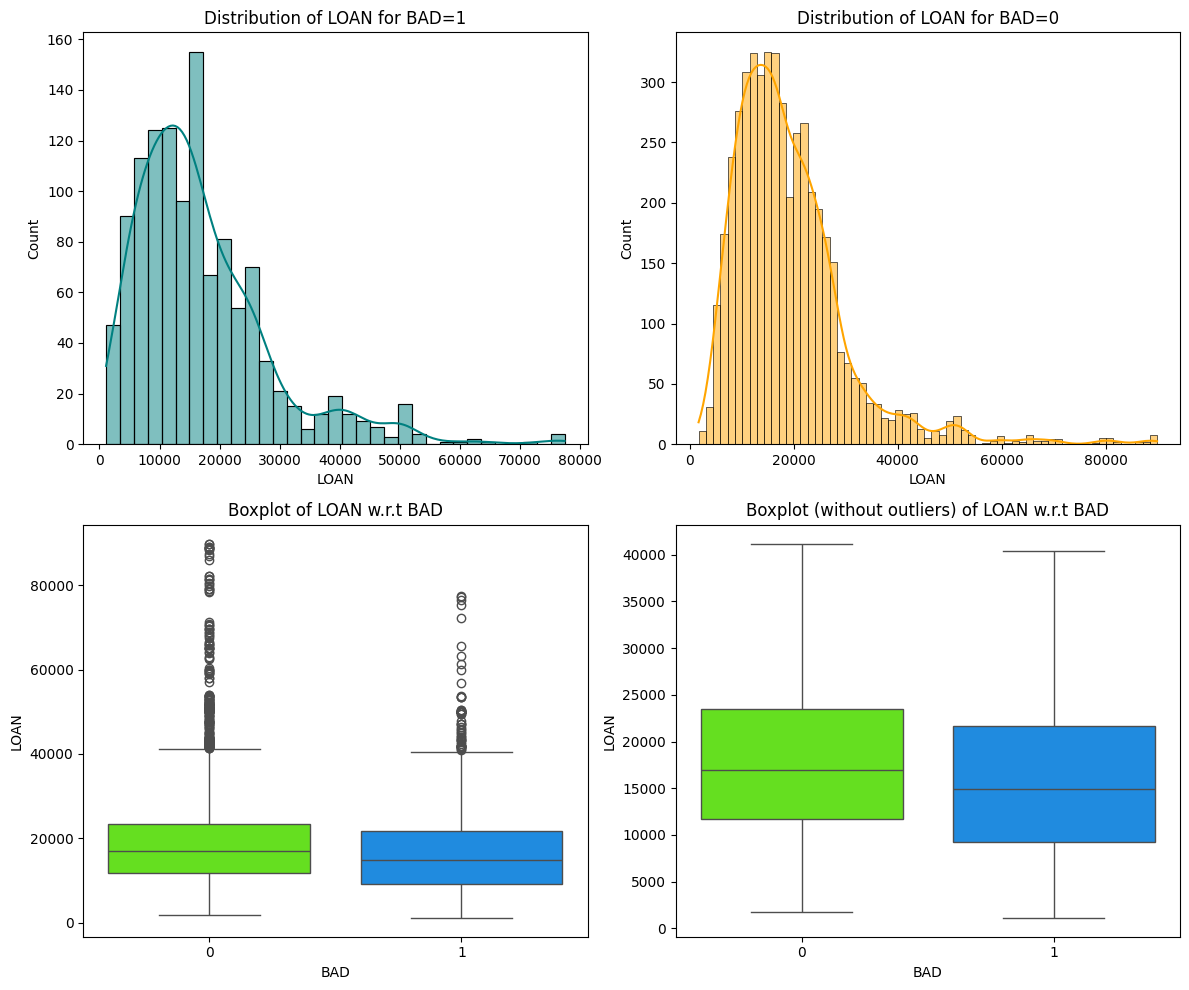

In [32]:
# Plot the distribution of the 'LOAN' column with respect to the target variable 'BAD'
distribution_plot_wrt_target(Loan_df, 'LOAN', 'BAD')

***Observations:***

* ***The median of the approved loan amounts for the clients who defaulted on their loans is lower than for those who repaid their loans.*** 

* *This indicates that the approved loan amounts affect whether a client will default or repay their loan. Specifically, it suggests that, on average, clients with lower approved loan amounts are more likely to default on their loans.*
---

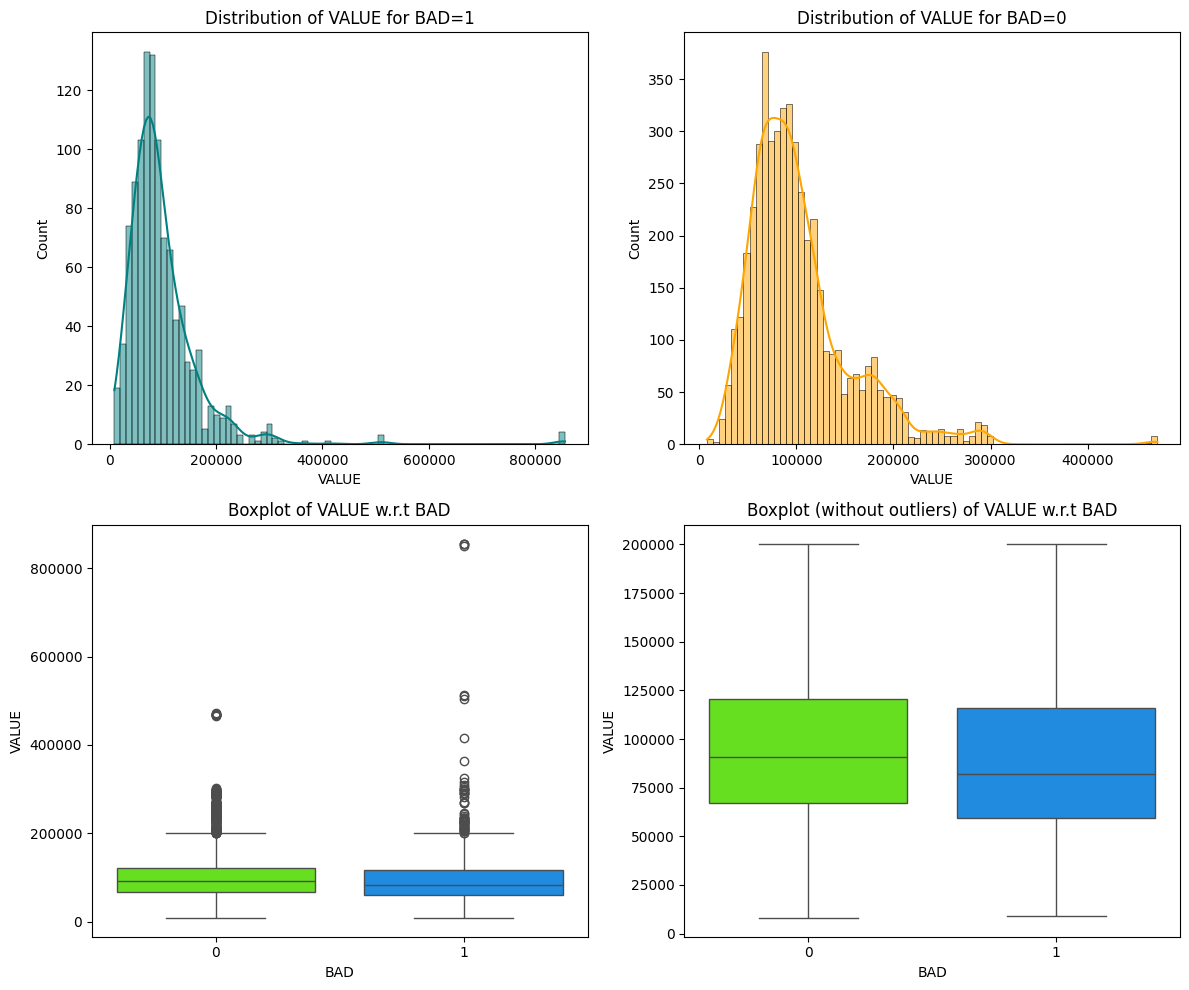

In [33]:
# Plot the distribution of the 'VALUE' column with respect to the target variable 'BAD'
distribution_plot_wrt_target(Loan_df, 'VALUE', 'BAD')

***Observations:***

***The median of the current property values for the clients who defaulted on their loans is lower than for those who repaid their loans.*** 

* *This indicates that the current property values affect whether a client will default or repay their loan. Specifically, it suggests that, on average, clients with lower  property values are more likely to default on their loans.*


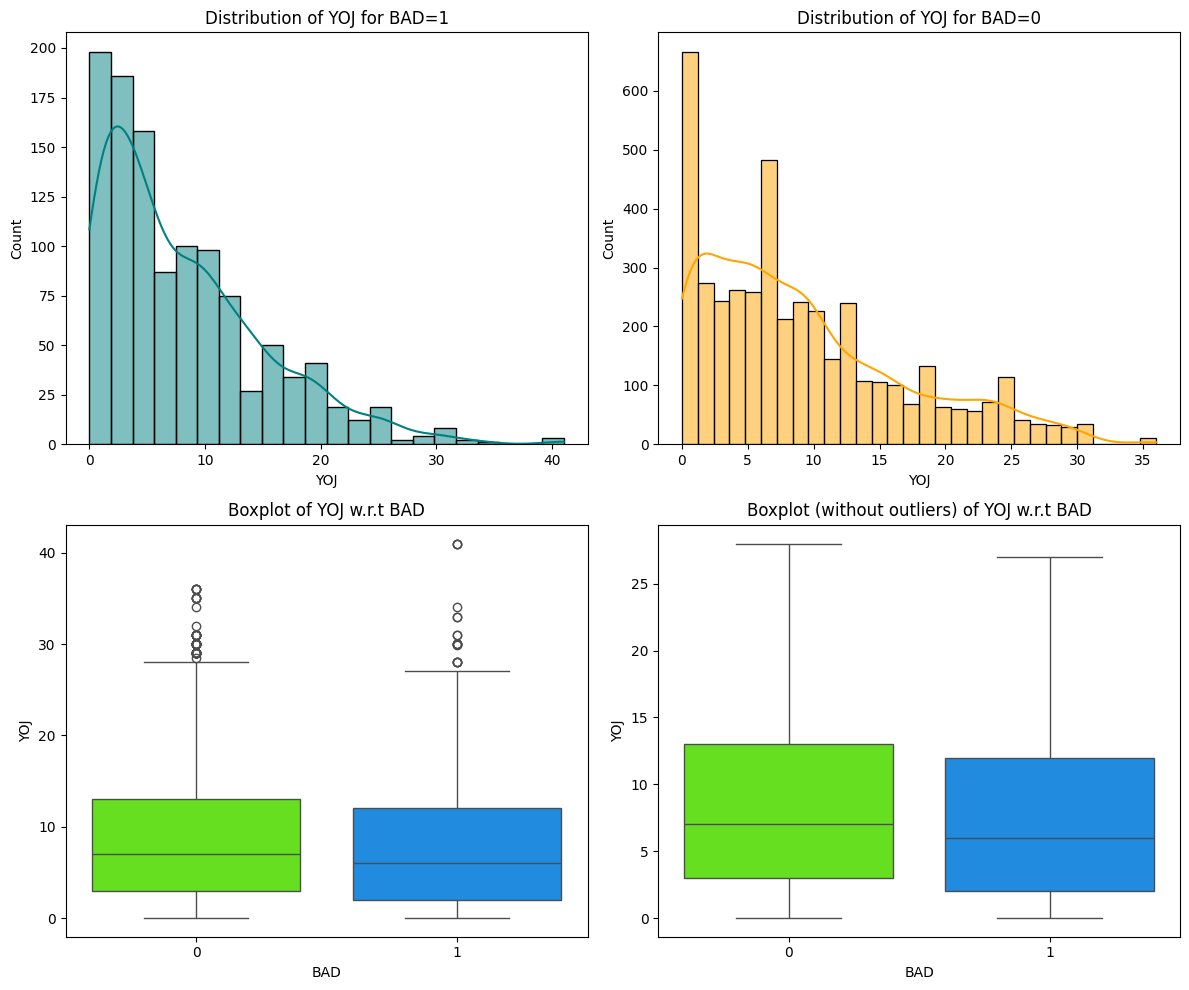

In [34]:
# Plot the distribution of the 'YOJ' column with respect to the target variable 'BAD'
distribution_plot_wrt_target(Loan_df, 'YOJ', 'BAD')

***Observations:***

***The median of the type of job of the loan applicants who defaulted on their loans is slightly lower than for those who repaid their loans.*** 

* *This indicates that the type of job that a loan applicant has might affect whether a client will default or repay their loan.*


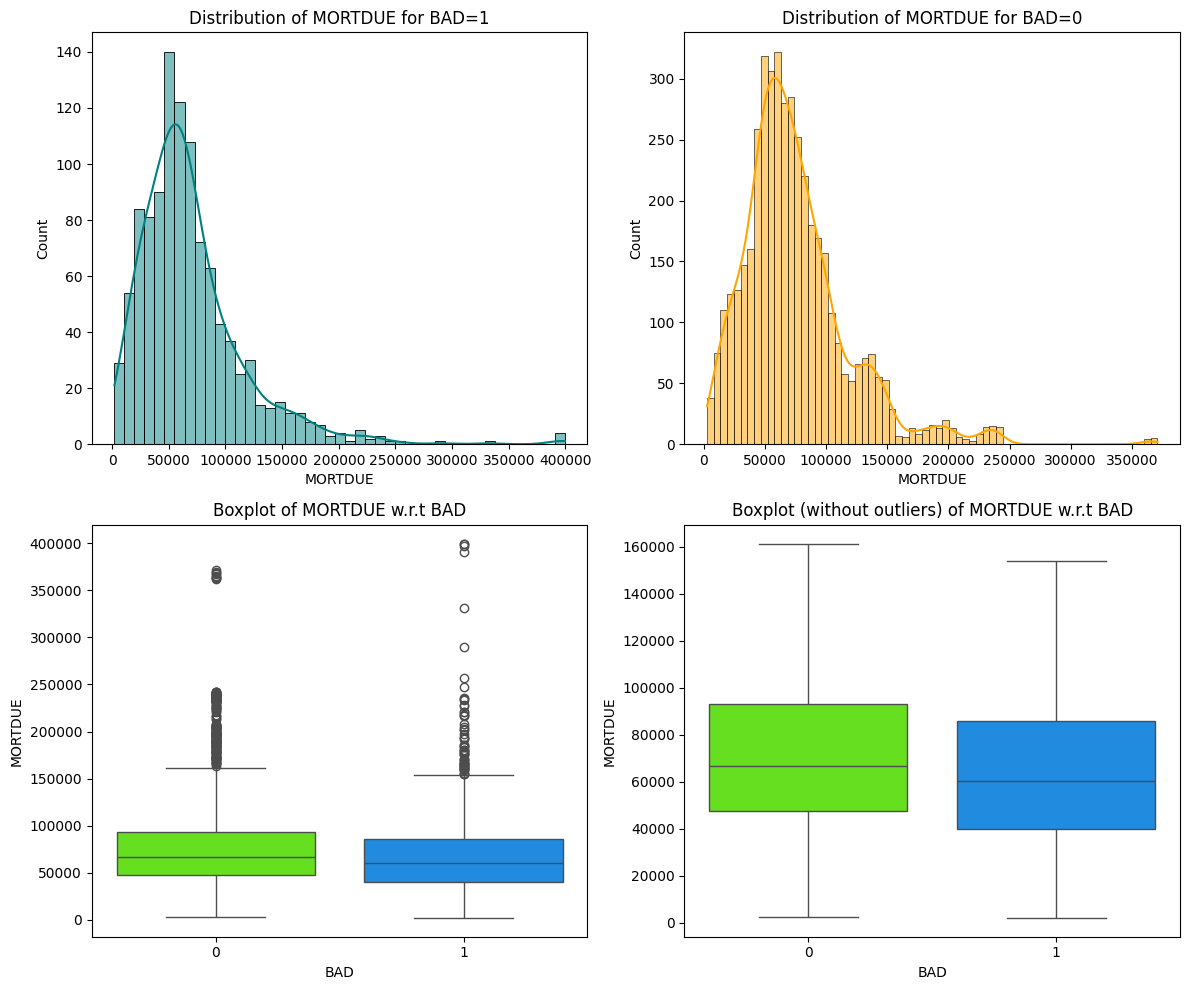

In [35]:
# Plot the distribution of the 'MORTDUE' column with respect to the target variable 'BAD'
distribution_plot_wrt_target(Loan_df, 'MORTDUE', 'BAD')

***Observations:***

***The median of the existing mortgage amounts for the clients who defaulted on their loans is lower than for those who repaid their loans.*** 

* *This indicates that the existing mortgage amounts affect whether a client will default or repay their loan. Specifically, it suggests that, on average, clients with lower mortgage amounts are more likely to default on their loans.* 


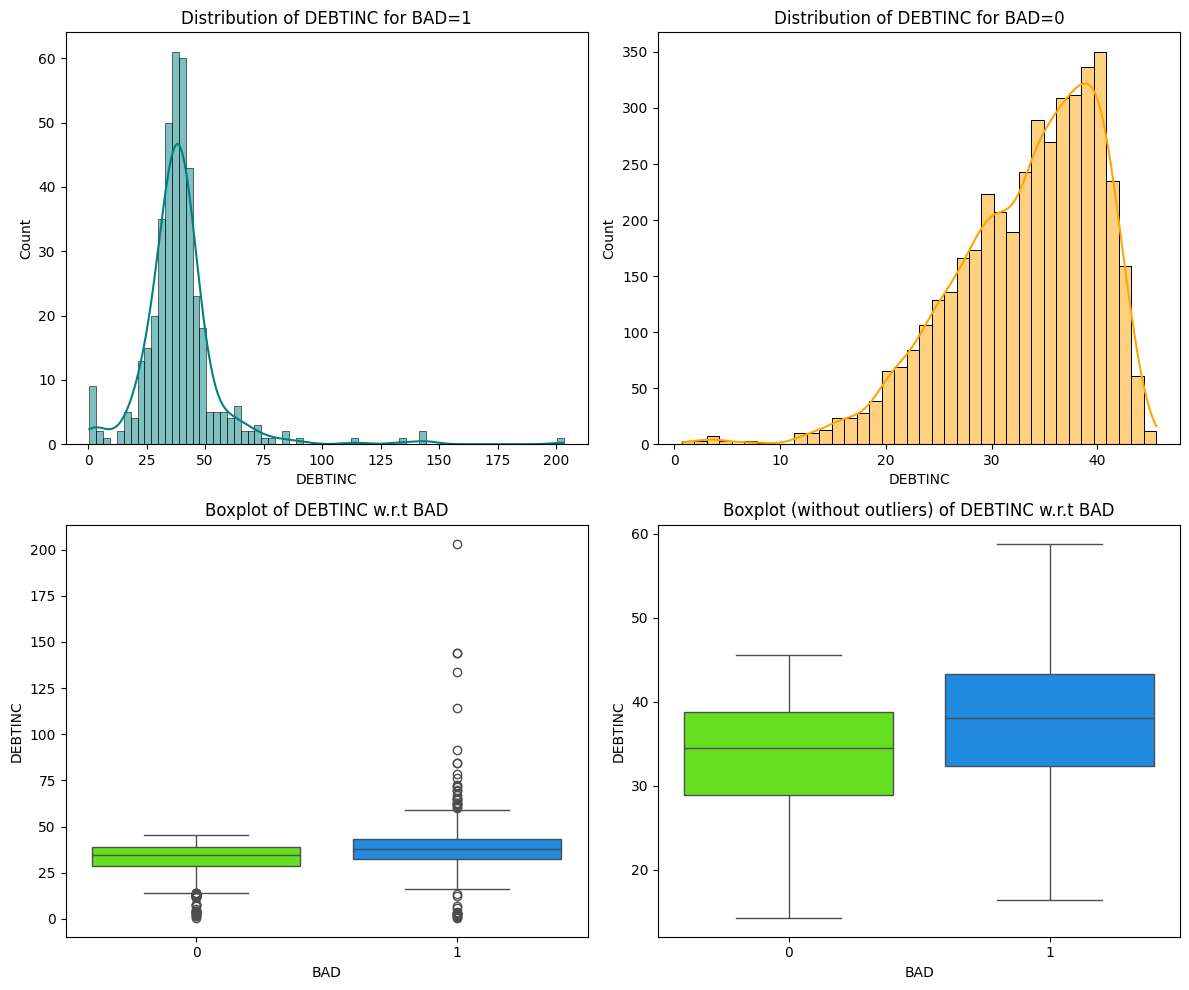

In [36]:
# Plot the distribution of the 'DEBTINC' column with respect to the target variable 'BAD'
distribution_plot_wrt_target(Loan_df, 'DEBTINC', 'BAD')

***Observations:***

***The median of the debt-to-income ratios for the clients who defaulted on their loans is higher than for those who repaid their loans.*** 


* *This indicates that the debt-to-income ratios affect whether a client will default or repay their loan. Specifically, it suggests that, on average, clients with higher debt-to-income ratios are more likely to default on their loans.*

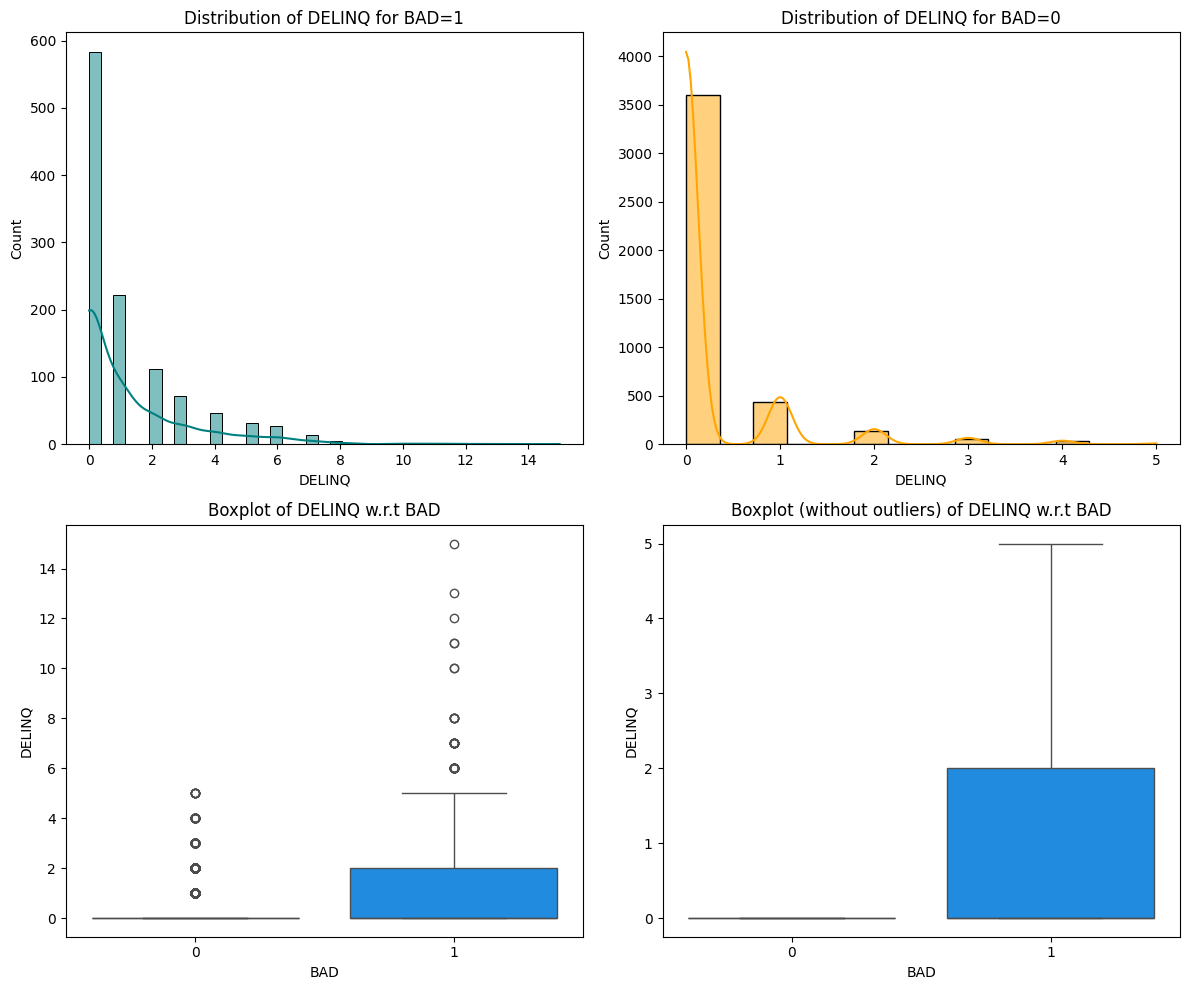

In [37]:
# Plot the distribution of the 'DELINQ' column with respect to the target variable 'BAD'
distribution_plot_wrt_target(Loan_df, 'DELINQ', 'BAD')

***Observations:*** 

* *The boxplots indicate that the number of delinquent credit lines affects whether a client will default or repay their loan. Specifically, it suggests that, on average, clients with a higher number of delinquent credit lines are more likely to default on their loans.*



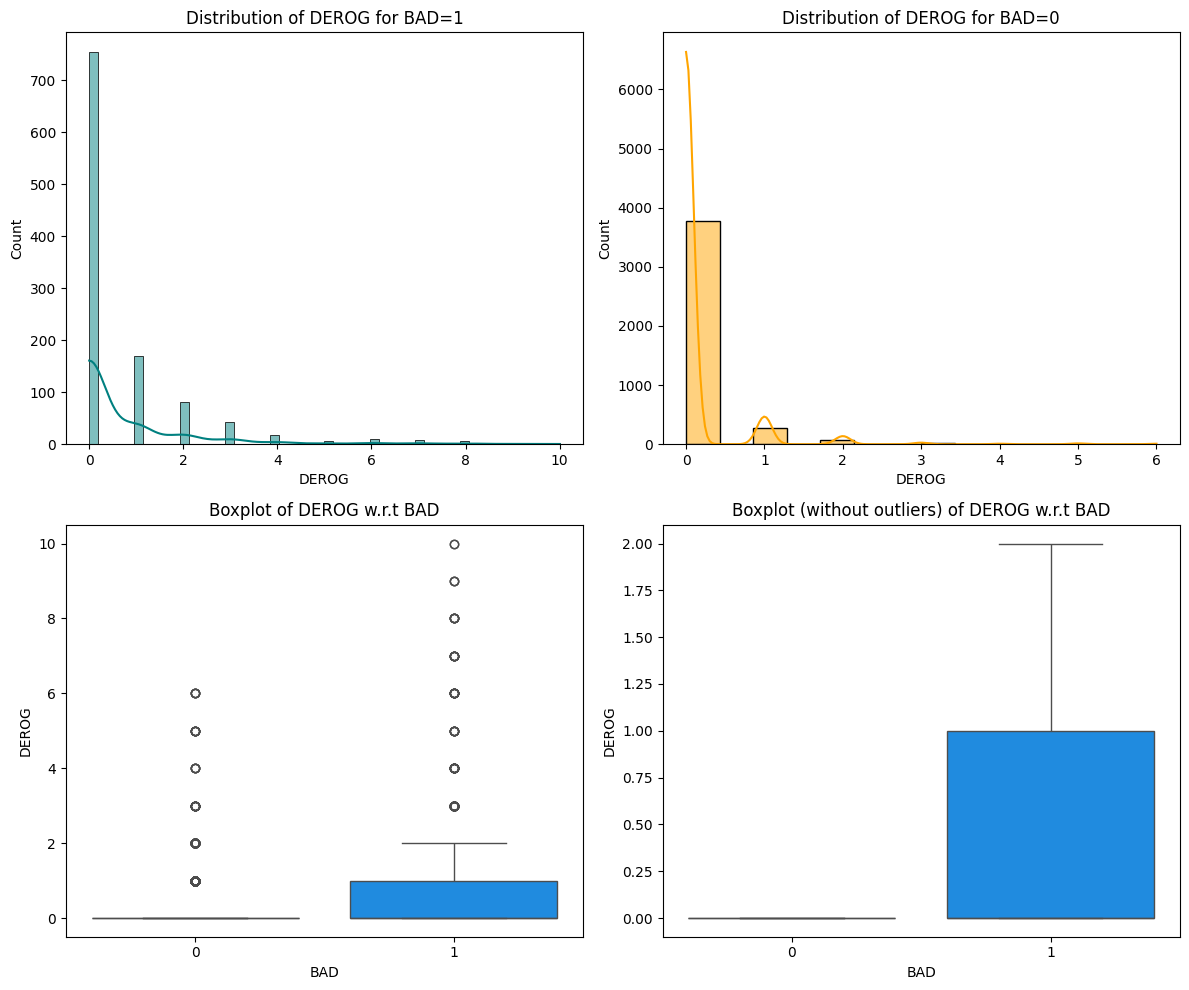

In [38]:
# Plot the distribution of the 'DEROG' column with respect to the target variable 'BAD'
distribution_plot_wrt_target(Loan_df, 'DEROG', 'BAD')

***Observations:*** 

* *The boxplots indicate that the number of major derogatory reports affects whether a client will default or repay their loan. Specifically, it suggests that, on average, clients with a higher number of major derogatory reports are more likely to default on their loans.*


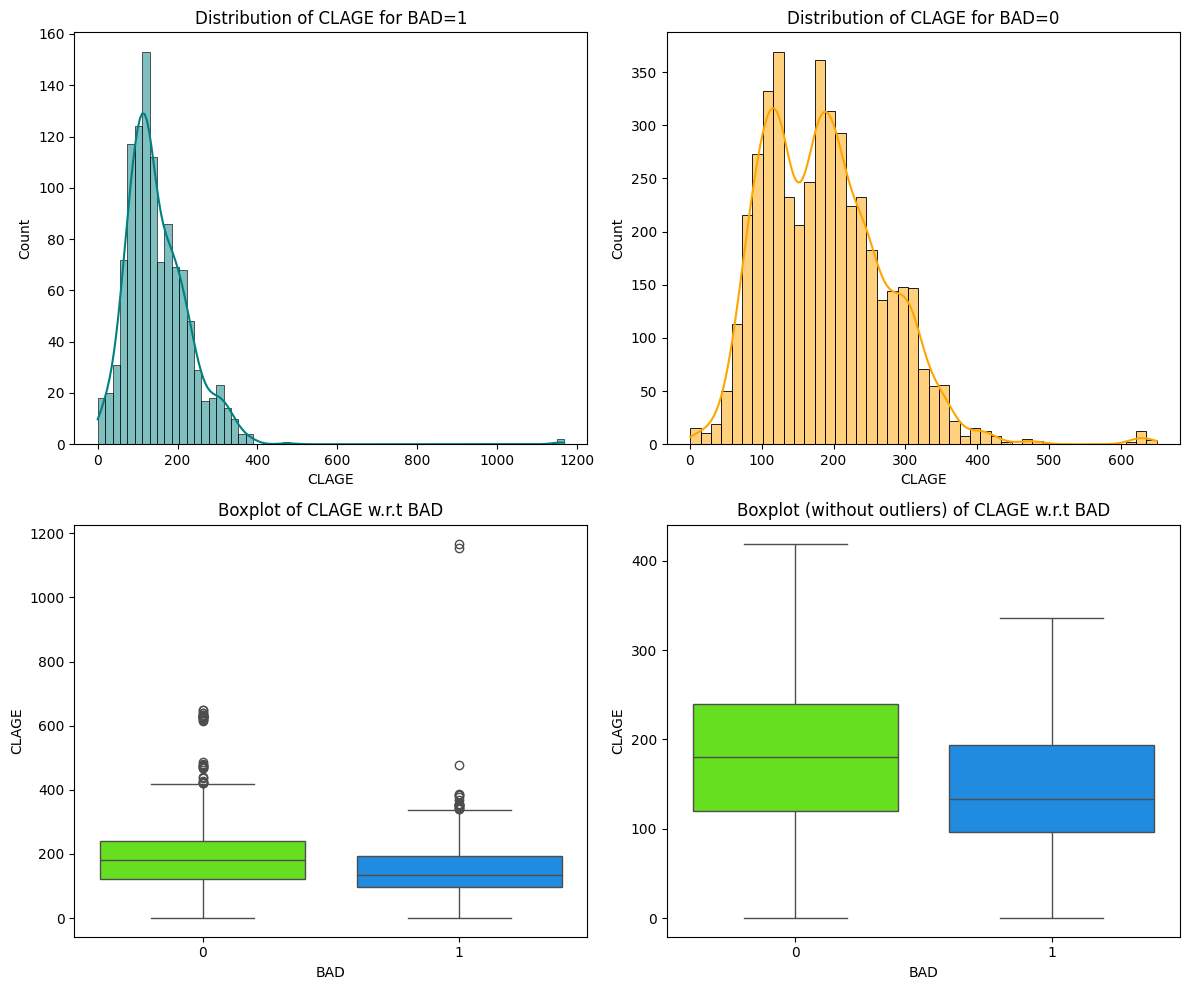

In [39]:
# Plot the distribution of the 'CLAGE' column with respect to the target variable 'BAD'
distribution_plot_wrt_target(Loan_df, 'CLAGE', 'BAD')

***Observations:***

***The median of the ages of the oldest credit line in months for the clients who defaulted on their loans is lower than for those who repaid their loans.*** 


* *This indicates that the ages of the oldest credit line in months affect whether a client will default or repay their loan. Specifically, it suggests that, on average, clients with a lower age of the oldest credit line in months are more likely to default on their loans.*


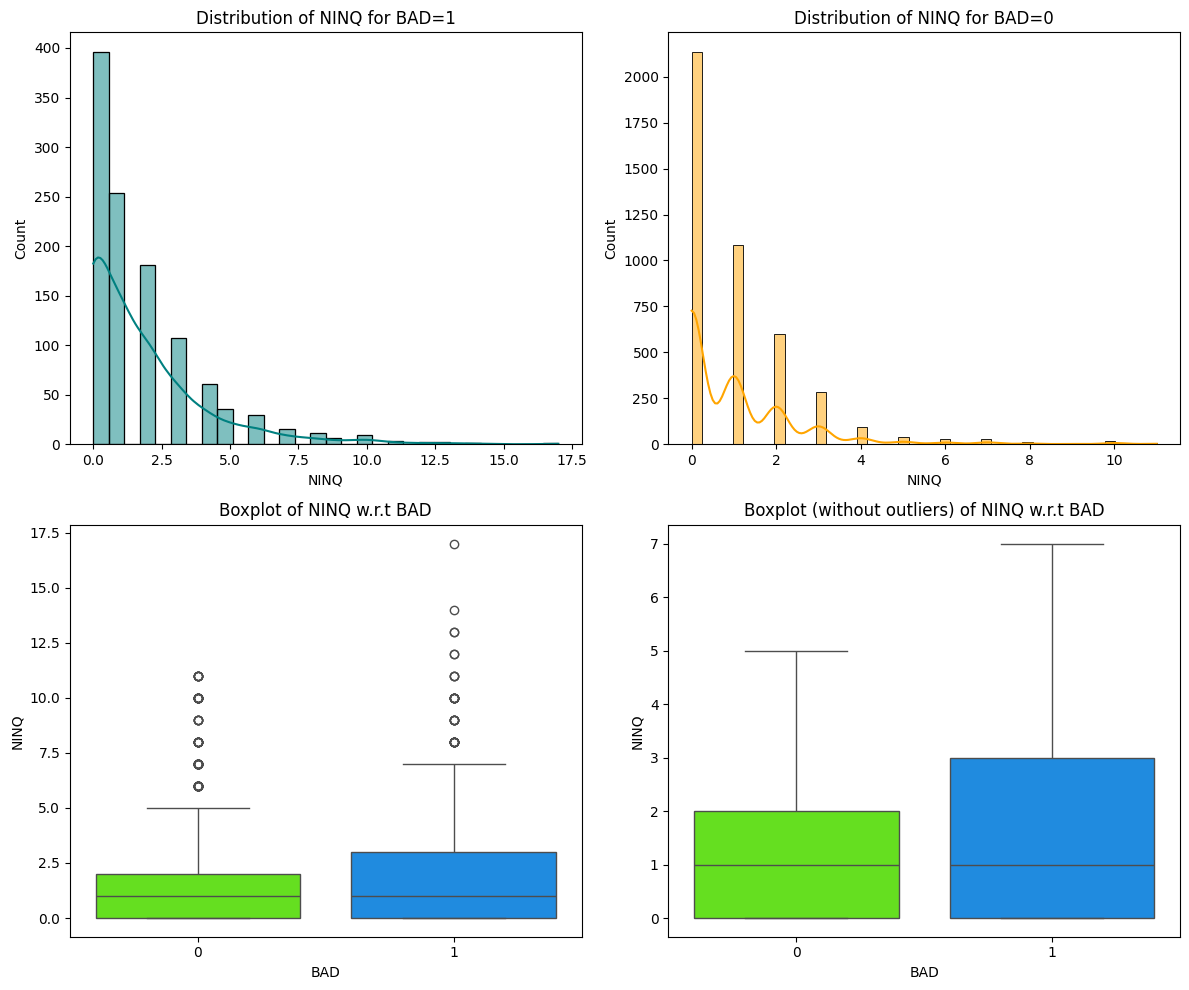

In [40]:
# Plot the distribution of the 'NINQ' column with respect to the target variable 'BAD'
distribution_plot_wrt_target(Loan_df, 'NINQ', 'BAD')

***Observations:***

***The median number of recent credit inquiries for clients is comparable between those who defaulted on their loans and those who repaid them.** However, in both boxplots, the range from the median to the upper quartile of the number of recent credit inquiries is wider for clients who defaulted on their loans compared to those who repaid them.*

* *This suggests that the number of recent credit inquiries influences whether a client will default or repay their loan. More specifically, it indicates that clients with a higher number of recent credit inquiries are more likely to default on their loans.*


In [41]:
# Function that displays the category counts and plots a stacked bar chart of two features (named predictor and target) from the data frame

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart
    
    Parameters:
    - data: dataFrame
    - predictor: independent variable
    - target: target variable
    
    """
    # Calculate category counts
    count = data[predictor].nunique()

    # Create a crosstab with margins
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(by=1, ascending=False)

    # Print the crosstab
    print(tab)
    print("-" * 135)

    # Plot the stacked bar chart
    ax = tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    
    # Adjust legend position
    ax.legend(loc="upper left", bbox_to_anchor=(1, 1), frameon=False)
    
    # Rotate x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    
    # Show the plot
    plt.show()

BAD           0       1
REASON                 
HomeImp 0.77753 0.22247
DebtCon 0.81034 0.18966
---------------------------------------------------------------------------------------------------------------------------------------


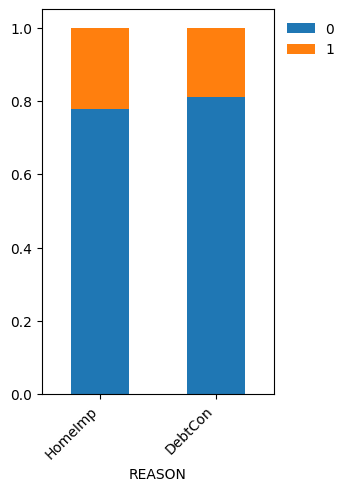

In [42]:
stacked_barplot(Loan_df, 'REASON', 'BAD')

***Observations:***

*The clients with home improvement debt (`HomeImp`) who defaulted on their loans are ~4% higher compared to those with debt consolidation(`DebtCon`).* 


BAD           0       1
JOB                    
Sales   0.65138 0.34862
Self    0.69948 0.30052
Mgr     0.76662 0.23338
Other   0.76801 0.23199
ProfExe 0.83386 0.16614
Office  0.86814 0.13186
---------------------------------------------------------------------------------------------------------------------------------------


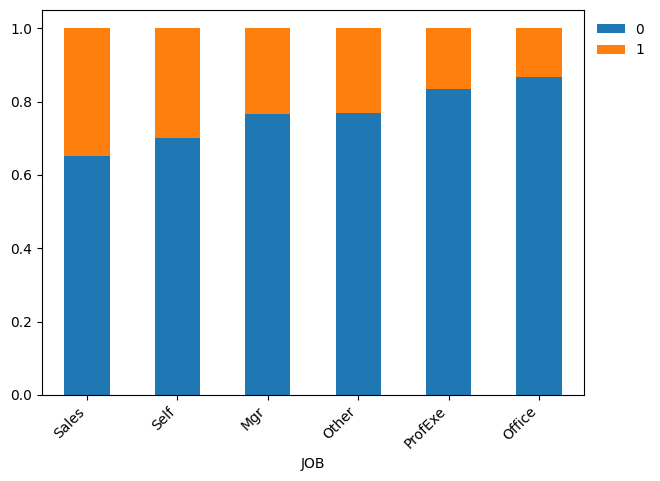

In [43]:
stacked_barplot(Loan_df, 'JOB', 'BAD')

***Observations:***

*The job types with the highest percentage of clients who defaulted on their loans (about 35%) are Sales, followed by Self-employed, Managers, clients in the "Other" category, professional executives, and finally office workers.* 


### **Treating Outliers**

***Let's find the count, and the percentage of outliers, in each column of the data, using IQR.***

In [44]:
# Display the counts and the percentage of outliers in each feature.
# Create a list of numerical features in the dataset.
numeric_columns=['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']

def detect_outliers(df, numeric_columns):
    """
    Detect outliers in numerical columns of a DataFrame.

    Parameters:
        - df: DataFrame containing the data.
        - numeric_columns: List of numerical column names.

    Returns:
        - DataFrame with outliers information for each numerical column.
    """
    # Calculate the 25th and 75th percentiles for the numerical columns
    Q1 = df[numeric_columns].quantile(0.25)
    Q3 = df[numeric_columns].quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Define lower and upper whiskers to identify outliers
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    # Detect outliers in each column
    outliers = ((df[numeric_columns] < lower_whisker) | (df[numeric_columns] > upper_whisker))

    # Count the number of outliers in each column
    outliers_count = outliers.sum()

    # Calculate the percentage of outliers in each column
    outliers_percentage = (outliers_count / df.shape[0]) * 100

    # Create a DataFrame to store outliers information
    outliers_info = pd.DataFrame({
        'Outliers Count': outliers_count,
        'Outliers Percentage': outliers_percentage,
        'Lower Whisker': lower_whisker,
        'Upper Whisker': upper_whisker,
        'First Quartile': Q1,
        'Third Quartile': Q3,
        'Inter Quartile': IQR,
        'Minimum Value': df[numeric_columns].min(),
        'Maximum Value': df[numeric_columns].max()
    })

    return outliers_info

# Call the function to detect outliers in the DataFrame
outliers_info = detect_outliers(Loan_df, numeric_columns)

# Display outliers information
print("Outliers information for each numerical column:")
print('*' * 130)
outliers_info


Outliers information for each numerical column:
**********************************************************************************************************************************


Outliers Count  Outliers Percentage  Lower Whisker  Upper Whisker  \
LOAN                256              4.29530    -7200.00000    41600.00000   
MORTDUE             234              3.92617   -21542.00000   159306.00000   
VALUE               320              5.36913   -14547.62500   200447.37500   
YOJ                  91              1.52685      -12.00000       28.00000   
DEROG               725             12.16443        0.00000        0.00000   
DELINQ             1201             20.15101        0.00000        0.00000   
CLAGE                47              0.78859      -59.55166      406.23064   
NINQ                177              2.96980       -3.00000        5.00000   
CLNO                219              3.67450       -1.50000       42.50000   
DEBTINC              94              1.57718       14.34537       53.79780   

         First Quartile  Third Quartile  Inter Quartile  Minimum Value  \
LOAN        11100.00000     23300.00000     12200.00000     1100.00000   
MORTDUE     46276.00000     91488.00000     45212.00000     2063.00000   
VALUE       66075.50000    119824.25000     53748.75000     8000.00000   
YOJ             3.00000        13.00000        10.00000        0.00000   
DEROG           0.00000         0.00000         0.00000        0.00000   
DELINQ          0.00000         0.00000         0.00000        0.00000   
CLAGE         115.11670       231.56228       116.44558        0.00000   
NINQ            0.00000         2.00000         2.00000        0.00000   
CLNO           15.00000        26.00000        11.00000        0.00000   
DEBTINC        29.14003        39.00314         9.86311        0.52450   

         Maximum Value  
LOAN       89900.00000  
MORTDUE   399550.00000  
VALUE     855909.00000  
YOJ           41.00000  
DEROG         10.00000  
DELINQ        15.00000  
CLAGE       1168.23356  
NINQ          17.00000  
CLNO          71.00000  
DEBTINC      203.31215

***Observations:***

*We observe that outliers are present in all numerical features of the dataset.*

*To comprehensively assess the nature of these outliers, we will conduct a column-wise analysis, examining each numerical feature individually. This process will provide insights into whether the values identified as outliers can be deemed authentic within the context of the data or if they represent anomalous observations that warrant further investigation.*



In [45]:
'''
Print the unique values and count of each feature in the DataFrame
'''
# Iterate over the columns of the DataFrame
for column in Loan_df.columns:
    # Print the column name
    print(column)
    
    # Print the unique value counts for the current column
    print(Loan_df[column].value_counts())
    print('*' * 40)
    print()

BAD
BAD
0    4771
1    1189
Name: count, dtype: int64
****************************************

LOAN
LOAN
15000    105
10000     81
20000     74
25000     73
12000     69
        ... 
47700      1
47100      1
46900      1
46700      1
89900      1
Name: count, Length: 540, dtype: int64
****************************************

MORTDUE
MORTDUE
42000.00000     11
47000.00000     10
65000.00000      9
50000.00000      7
124000.00000     7
                ..
65372.00000      1
15346.00000      1
58549.00000      1
69195.00000      1
48811.00000      1
Name: count, Length: 5053, dtype: int64
****************************************

VALUE
VALUE
60000.00000     15
80000.00000     14
85000.00000     12
65000.00000     11
78000.00000     10
                ..
116994.00000     1
42682.00000      1
72175.00000      1
70095.00000      1
88934.00000      1
Name: count, Length: 5381, dtype: int64
****************************************

REASON
REASON
DebtCon    3928
HomeImp    1780
Name: count, d

In [46]:
def print_outliers(df, column_name):
    """
    Print outliers for a specified column in a DataFrame.

    Parameters:
        - df: DataFrame containing the data.
        - column_name: Name of the column.

    Returns:
        - None
    """
    # Select values from the specified column and store them in a list
    column_values = df[column_name].tolist()

    # Calculate the 25th and 75th percentiles for the column
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Define lower and upper whiskers to identify outliers
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    # Find outliers in the column
    outliers = [value for value in column_values if value < lower_whisker or value > upper_whisker]

    # Print the list of outliers
    print(f"Outliers for column '{column_name}':")
    print(outliers)


In [47]:
# Print a list of all outliers in the feature 'VALUE'
print_outliers(Loan_df, 'VALUE')

Outliers for column 'VALUE':
[245300.0, 251962.0, 250155.0, 245730.0, 208910.0, 247611.0, 205981.0, 203936.0, 251771.0, 246758.0, 249071.0, 251935.0, 202962.0, 251426.0, 201689.0, 202788.0, 201281.0, 210000.0, 203815.0, 206201.0, 209931.0, 205346.0, 219783.0, 219936.0, 201713.0, 225750.0, 215784.0, 268000.0, 200459.0, 201820.0, 203341.0, 203720.0, 226000.0, 228670.0, 235000.0, 214523.0, 202186.0, 200480.0, 215014.0, 227295.0, 208924.0, 227171.0, 232176.0, 229929.0, 234454.0, 230920.0, 201245.0, 210072.0, 227737.0, 210595.0, 200707.0, 212995.0, 235912.0, 207562.0, 202800.0, 205950.0, 206148.0, 204282.0, 206368.0, 209364.0, 208429.0, 202989.0, 215548.0, 208782.0, 210685.0, 212530.0, 203737.0, 205608.0, 217000.0, 200902.0, 219300.0, 224270.0, 222227.0, 224233.0, 277500.0, 204000.0, 308600.0, 201500.0, 201214.0, 286955.0, 220843.0, 219297.0, 204082.0, 220886.0, 230000.0, 234004.0, 209695.0, 204192.0, 204384.0, 282972.0, 235968.0, 230443.0, 212505.0, 284790.0, 200594.0, 234269.0, 230513.0, 

In [48]:
# Print a list of all outliers in the feature 'DEROG'
print_outliers(Loan_df, 'DEROG')

Outliers for column 'DEROG':
[3.0, 2.0, 1.0, 1.0, 2.0, 4.0, 1.0, 3.0, 1.0, 1.0, 1.0, 3.0, 2.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 2.0, 2.0, 1.0, 1.0, 3.0, 5.0, 1.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 3.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 6.0, 1.0, 1.0, 2.0, 2.0, 3.0, 2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 6.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 7.0, 3.0, 8.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 2.0, 2.0, 4.0, 1.0, 6.0, 3.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 6.0, 6.0, 1.0, 1.0, 1.0, 3.0, 4.0, 1.0, 5.0, 1.0, 1.0, 1.0, 1.0, 3.0, 3.0, 1.0, 2.0, 4.0, 1.0, 1.0, 2.0, 2.0, 1.0, 3.0, 4.0, 1.0, 2.0, 1.0, 2.0, 2.0, 1.0, 1.0, 3.0, 2.0, 3.0, 3.0, 9.0, 2.0, 5.0, 4.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 4.0, 1.0, 1.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 3.0, 5.0, 2.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 5.0, 4.0, 6.0, 3.0, 1.0, 1.0, 4.0, 

In [49]:
# Print a list of all outliers in the feature 'DELINQ'
print_outliers(Loan_df, 'DELINQ')

Outliers for column 'DELINQ':
[2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 6.0, 1.0, 2.0, 2.0, 15.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 4.0, 2.0, 6.0, 1.0, 2.0, 4.0, 6.0, 1.0, 4.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 3.0, 1.0, 2.0, 2.0, 4.0, 1.0, 3.0, 3.0, 1.0, 4.0, 3.0, 2.0, 3.0, 3.0, 2.0, 4.0, 1.0, 2.0, 1.0, 1.0, 1.0, 3.0, 6.0, 3.0, 1.0, 2.0, 2.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 6.0, 1.0, 1.0, 3.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 4.0, 3.0, 2.0, 4.0, 1.0, 1.0, 1.0, 1.0, 4.0, 4.0, 6.0, 2.0, 3.0, 1.0, 1.0, 2.0, 5.0, 1.0, 3.0, 2.0, 4.0, 2.0, 1.0, 1.0, 1.0, 2.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 4.0, 1.0, 1.0, 3.0, 5.0, 3.0, 3.0, 1.0, 1.0, 2.0, 3.0, 4.0, 3.0, 6.0, 5.0, 1.0, 1.0, 4.0, 7.0, 1.0, 2.0, 1.0, 1.0, 1.0, 3.0, 1.0, 4.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 3.0, 3.0, 1.0, 1.0, 1.0, 1.0, 3.0, 2.0, 4.0, 2.0, 1.0, 1.0, 3.0, 2.0, 1.0, 1.0, 2.0, 5.0, 1.0, 4.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 3.0

***Observations:*** 

*Outliers are detected in several features: `LOAN` (Amount of loan approved), `MORTDUE` (Amount due on the existing mortgage), `YOJ` (Years at present job), `CLAGE` (Age of the oldest credit line in months), `NINQ` (Number of recent credit inquiries), `CLNO` (Number of existing credit lines), and `DEBTINC` (Debt-to-income ratio). These outliers, constituting less than 5% of the values in each feature, appear to be legitimate within the loan context and the current economic conditions in many areas of California. Given their small proportion, they are unlikely to significantly skew the data distribution and will not be treated as outliers for the purpose of this analysis.*

**'''**

*However, features such as `VALUE`(Current value of the property), `DEROG`(Number of major derogatory reports), and `DELINQ` (Debt-to-income ratio) exhibit more than 5% of their values as outliers. While these outliers could still be authentic considering the nature of loans and prevailing economic circumstances, their higher prevalence—exceeding 5%—may distort the data distribution and introduce bias in the analysis. Consequently, outliers in these features will be addressed in the subsequent analysis.* 

***Addressing outliers:***

*The minimum and maximum values of the `VALUE`, `DEROG`, and `DELINQ` features will be adjusted to the lower and upper whisker values of the boxplot. These values are determined using the formula `Q1 - 1.5 * IQR` and `Q3 + 1.5 * IQR`, respectively.*


***Create a function to adjust outliers in a feature***

In [50]:
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1                # Inter Quantile Range (75th perentile - 25th percentile)
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    # all the values smaller than lower_whisker will be assigned the value of lower_whisker
    # all the values greater than upper_whisker will be assigned the value of upper_whisker
    # the assignment will be done by using the clip function of NumPy
    df[col] = np.clip(df[col], lower_whisker, upper_whisker)

    return df

***Treat outliers in the feature `'VALUE'`***

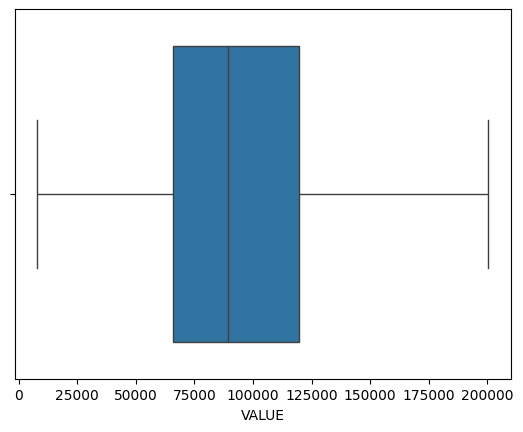

In [51]:
# Treat outliers in the 'VALUE' column of the Loan_df DataFrame
data_value = treat_outliers(Loan_df,'VALUE')

# Visualize the distribution of the 'VALUE' column after outlier treatment
sns.boxplot(data_value, x='VALUE')
plt.show()


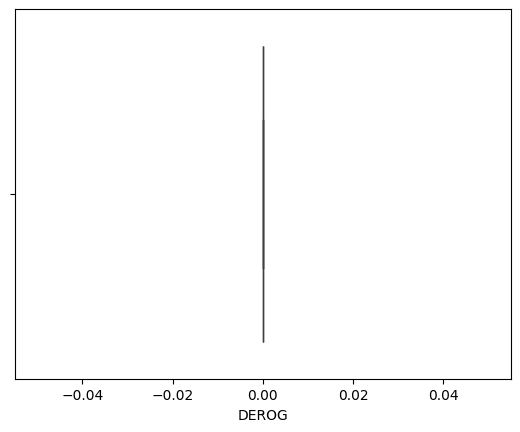

In [52]:
# Treat outliers in the 'VALUE' column of the Loan_df DataFrame
data_derog = treat_outliers(Loan_df,'DEROG')

# Visualizing the column after outlier treatment
sns.boxplot(data_derog,x='DEROG')
plt.show()

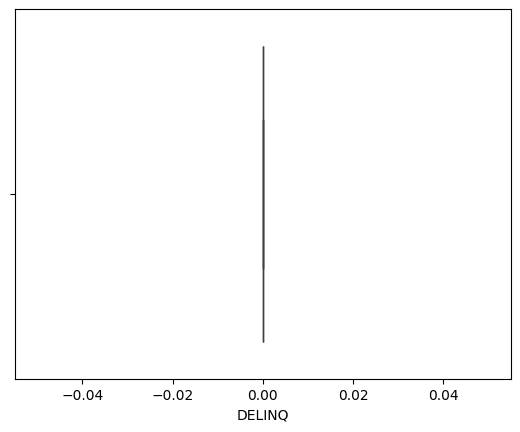

In [53]:
# Treat outliers in the 'VALUE' column of the Loan_df DataFrame
data_delinq = treat_outliers(Loan_df,'DELINQ')

# Visualizing the column after outlier treatment
sns.boxplot(data_delinq,x='DELINQ')
plt.show()

***Observations:***

*The `VALUE`, `DEROG`, and `DELINQ` features have undergone outlier treatment and no longer contain any outliers. However, it's crucial to note that the treatment applied to `DEROG` and `DELINQ` may have inadvertently affected potentially valid data. These data were flagged in these features as outliers mainly because the predominant value in these features was 0, resulting in all values being replaced with zeros.* 

*Consequently, loan applicants with significant derogatory reports or delinquent credit lines may be misclassified by the predictive model used in this analysis, as it now considers only zeros for these features after outlier removal.*


### **Treating Missing Values**

*The most effective machine learning method for imputing missing values depends on various factors such as the nature of the data, the extent of missingness, and the specific problem at hand. Some commonly used methods include:*

1. ***Mean/Median/Mode Imputation**: This method replaces missing values with the mean, median, or mode of the respective column.*

2. ***K-Nearest Neighbors (KNN) Imputation**: KNN imputation fills in missing values based on the values of nearest neighbors in the feature space.*

3. ***Multiple Imputation by Chained Equations (MICE)**: MICE generates multiple imputations for missing data by iteratively modeling each incomplete variable conditional on the other variables.*

4. ***Predictive Models (e.g., Linear Regression, Random Forest, Gradient Boosting)**: Predictive models can be trained on the observed data to predict missing values in the incomplete dataset.*

5. ***Deep Learning Models (e.g., Autoencoders)**: Deep learning models, such as autoencoders, can capture complex patterns in the data and impute missing values.*

6. ***Matrix Factorization Techniques (e.g., Singular Value Decomposition, Matrix Completion)**: These techniques decompose the data matrix into lower-dimensional matrices and fill in missing entries.*

The choice of method depends on the characteristics of the dataset and the specific goals of the analysis. It's often recommended to try multiple methods and evaluate their performance based on the task's requirements and the desired accuracy of imputation.

*The treatment of missing values will be carried out using two different approaches, followed by an evaluation of the performance of each approach to choose the best-performing technique. The following techniques will be used to impute the missing values:*

1. ***Median and Mode Imputation**:*
   - *For numerical columns, missing values will be replaced with the median value of each column. This approach is robust to outliers and maintains the central tendency of the data.*
  
   - *For categorical columns, missing values will be replaced with the mode (most frequent value) of each column. This approach is suitable for categorical variables as it preserves the category distribution.*

2. ***KNN Imputation**:*
   - *The K-nearest neighbors (K-NN) imputation algorithm will be employed to impute missing values. This method replaces missing values based on the values of neighboring data points. It is a more sophisticated approach that takes into account the relationships between features.*

*After applying all three techniques, the performance of each approach in the different models will be evaluated to determine which one provides better imputation results for the dataset.*



In [54]:
# Converts the specified categorical features in the dataset to the categorical data type.
# List of categorical columns to be converted
categorical_columns = ['BAD', 'REASON', 'JOB']

# Convert the specified columns to categorical data type
Loan_df[categorical_columns] = Loan_df[categorical_columns].astype('category')

# Display information about the DataFrame after conversion
Loan_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


In [55]:
# Create a copy of the DataFrame for the median and mode imputation
Loan_df_1= Loan_df.copy()
# Get numerical columns of the DataFrame
numerical_columns = Loan_df_1.select_dtypes(include=['number']).columns.tolist()

# Fill numeric columns with the median.
Loan_df_1[numerical_columns] = Loan_df_1[numerical_columns].fillna(Loan_df_1[numerical_columns].median())

# Fill object columns with mode.
for column in categorical_columns:
    mode = Loan_df_1[column].mode()[0]
    Loan_df_1[column] = Loan_df_1[column].fillna(mode)

# Checking missing value count and percentage in the dataset
missing_values_df = missing_values_info(Loan_df_1)
missing_values_df


Missing Value Count  Missing Value Percentage
BAD                        0                   0.00000
LOAN                       0                   0.00000
MORTDUE                    0                   0.00000
VALUE                      0                   0.00000
REASON                     0                   0.00000
JOB                        0                   0.00000
YOJ                        0                   0.00000
DEROG                      0                   0.00000
DELINQ                     0                   0.00000
CLAGE                      0                   0.00000
NINQ                       0                   0.00000
CLNO                       0                   0.00000
DEBTINC                    0                   0.00000

In [56]:
# Create a copy of the DataFrame for the KNN imputation
Loan_df_2= Loan_df.copy()

## **Important Insights from EDA**

*The following insights provide a comprehensive understanding of the dataset, highlighting the interplay between various features and their implications for loan default prediction and risk assessment.*

1. ***Data Overview:***
   * *The dataset contains 5960 rows and 13 features, providing a substantial amount of information for analysis.*
   * *Features like `'BAD'` and `'LOAN'` have consistent observations, while others show inconsistencies, indicating missing values.*

2. ***Missing Values:***
   * *All features, except for `'BAD'` and `'LOAN'`, contain missing values, suggesting the need for data imputation or handling of missing data during preprocessing.

3. ***Data Distribution:***
   * *Many numerical features exhibit right-skewed distributions, indicating potential outliers or extreme values.*
   * *Features such as loan amount (`'LOAN'`), mortgage amount (`'MORTDUE'`), property value (`'VALUE'`), years at present job (`'YOJ'`), and others show considerable variations between the third quartile and the maximum value, suggesting the presence of outliers.*

4. ***Categorical Features:***
   * *Categorical features like `'REASON'` and `'JOB'` provide insights into the reasons for loan requests and the job types of applicants.**
   * *`'REASON'` primarily consists of two categories: debt consolidation (`'DebtCon'`) and home improvement (`'HomeImp'`), with a significant majority falling under debt consolidation.*
   * *`'JOB'` includes six categories, with `'Other'` being the most prevalent, followed by professional executives, office workers, managers, self-employed individuals, and salespersons.*

5. ***Imbalanced Classes:***
   * *Approximately 80.1% of clients successfully repaid their loans, while the remaining 19.9% defaulted, highlighting an imbalance in the target variable `'BAD'`.*
   * *Imbalanced classes can pose challenges in predictive modeling, requiring techniques like resampling or algorithm adjustments to mitigate bias.*

6. ***Impact of Features on Loan Default:***
   * *Analysis reveals distinct differences in median values of various features between clients who defaulted on loans and those who repaid them.*
   * *Features such as approved loan amounts, property values, job types, mortgage amounts, and debt-to-income ratios exhibit notable disparities between the two groups, suggesting their significance in predicting loan repayment behavior.*

7. ***Outliers:***
   * *Outliers are present in several numerical features, potentially influencing data distribution and analysis.*
   * *While some outliers may represent authentic data points within the loan context and prevailing economic conditions, others may introduce bias and distort analysis results.*
   * *Features like property value (`'VALUE'`), major derogatory reports (`'DEROG'`), and delinquent credit lines (`'DELINQ'`) exhibit outliers exceeding 5% prevalence, warranting further investigation and potential treatment.*

8. ***Further Analysis:***
   * *Addressing outliers, particularly those with a higher prevalence, is crucial for maintaining data integrity and ensuring the reliability of subsequent analyses and modeling efforts.*
   * *Adjustment of extreme values in specific features will be conducted using established techniques such as the interquartile range (IQR) method.*

## **Model Building - Approach**
- Data preparation
- Partition the data into train and test set
- Build the model
- Fit on the train data
- Tune the model
- Test the model on test set

### **Preparing Data for Modeling**

**To ensure accurate model building and performance evaluation, we'll undertake a comprehensive approach to handle missing data using two distinct imputation methods, median/mode imputation and K-NN imputation.*

1. ***Loan_df_1 Preparation:***
   * *This DataFrame is obtained after applying median and mode imputation, effectively treating missing values.
   * *For categorical features in this DataFrame, we'll generate dummy variables to represent each category.
After encoding, the DataFrame will be divided into training and testing datasets.*

2. ***Loan_df_2 Preparation:***
   * *`'Loan_df_2'` is a duplicate of the original DataFrame `'Loan_df'` and will be used for K-NN imputation.*
   * *Before imputation, categorical features in this DataFrame will also receive dummy variable treatment.*
   * *Similar to `'Loan_df_1'`, this DataFrame will then be split into training and testing datasets for further analysis.*
   * *Missing values in this DataFrame will be handled after encoding and splitting using K-NN imputation.*

*`The two imputed DataFrames will then be used for model building and performance evaluation.`*

In [57]:
from sklearn.preprocessing import OneHotEncoder
'''
Creating dummy variables for categorical features in Loan_df_1 and Loan_df_2
and separate the independent variables (X) and the dependent variable (Y)
'''

# Creating a list of columns for which we will create dummy variables
to_get_dummies_for = ['REASON', 'JOB']

# Convert categorical features to string type
Loan_df_2[to_get_dummies_for] = Loan_df_2[to_get_dummies_for].astype(str)

# Creating a OneHotEncoder instance
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='error')

# Fit and transform the categorical features in Loan_df_2 and replace missing values with NAN
X2_encoded = encoder.fit_transform(Loan_df_2[to_get_dummies_for].fillna('NAN'))

# Create DataFrame with encoded features for Loan_df_2
X2_encoded_df = pd.DataFrame(X2_encoded, columns=encoder.get_feature_names_out(to_get_dummies_for), index=Loan_df_2.index)

# Concatenate the encoded features with the remaining features in Loan_df_2
X2_encoded_df = pd.concat([Loan_df_2.drop(columns=to_get_dummies_for), X2_encoded_df], axis=1)

# Separate the target variable and other variables for Loan_df_2
Y2 = Loan_df_2[['BAD']]
X2 = X2_encoded_df.drop(['BAD'], axis=1)

# Transform the categorical features in Loan_df_1
X1_encoded = encoder.transform(Loan_df_1[to_get_dummies_for])

# Create DataFrame with encoded features for Loan_df_1
X1_encoded_df = pd.DataFrame(X1_encoded, columns=encoder.get_feature_names_out(to_get_dummies_for), index=Loan_df_1.index)

# Concatenate the encoded features with the remaining features in Loan_df_1
X1_encoded_df = pd.concat([Loan_df_1.drop(columns=to_get_dummies_for), X1_encoded_df], axis=1)

# Separate the target variable and other variables for Loan_df_1
Y1 = Loan_df_1[['BAD']]
X1 = X1_encoded_df.drop(['BAD'], axis=1)

In [58]:
# Display the first few rows of DataFrame X1
X1.head()

LOAN     MORTDUE        VALUE      YOJ   DEROG  DELINQ     CLAGE    NINQ  \
0  1100 25860.00000  39025.00000 10.50000 0.00000 0.00000  94.36667 1.00000   
1  1300 70053.00000  68400.00000  7.00000 0.00000 0.00000 121.83333 0.00000   
2  1500 13500.00000  16700.00000  4.00000 0.00000 0.00000 149.46667 1.00000   
3  1500 65019.00000  89235.50000  7.00000 0.00000 0.00000 173.46667 1.00000   
4  1700 97800.00000 112000.00000  3.00000 0.00000 0.00000  93.33333 0.00000   

      CLNO  DEBTINC  REASON_HomeImp  REASON_nan  JOB_Office  JOB_Other  \
0  9.00000 34.81826         1.00000     0.00000     0.00000    1.00000   
1 14.00000 34.81826         1.00000     0.00000     0.00000    1.00000   
2 10.00000 34.81826         1.00000     0.00000     0.00000    1.00000   
3 20.00000 34.81826         0.00000     0.00000     0.00000    1.00000   
4 14.00000 34.81826         1.00000     0.00000     1.00000    0.00000   

   JOB_ProfExe  JOB_Sales  JOB_Self  JOB_nan  
0      0.00000    0.00000   0.00000  0.00000  
1      0.00000    0.00000   0.00000  0.00000  
2      0.00000    0.00000   0.00000  0.00000  
3      0.00000    0.00000   0.00000  0.00000  
4      0.00000    0.00000   0.00000  0.00000

In [59]:
# Display the first few rows of DataFrame X2
X2.head()

LOAN     MORTDUE        VALUE      YOJ   DEROG  DELINQ     CLAGE    NINQ  \
0  1100 25860.00000  39025.00000 10.50000 0.00000 0.00000  94.36667 1.00000   
1  1300 70053.00000  68400.00000  7.00000 0.00000 0.00000 121.83333 0.00000   
2  1500 13500.00000  16700.00000  4.00000 0.00000 0.00000 149.46667 1.00000   
3  1500         NaN          NaN      NaN     NaN     NaN       NaN     NaN   
4  1700 97800.00000 112000.00000  3.00000 0.00000 0.00000  93.33333 0.00000   

      CLNO  DEBTINC  REASON_HomeImp  REASON_nan  JOB_Office  JOB_Other  \
0  9.00000      NaN         1.00000     0.00000     0.00000    1.00000   
1 14.00000      NaN         1.00000     0.00000     0.00000    1.00000   
2 10.00000      NaN         1.00000     0.00000     0.00000    1.00000   
3      NaN      NaN         0.00000     1.00000     0.00000    0.00000   
4 14.00000      NaN         1.00000     0.00000     1.00000    0.00000   

   JOB_ProfExe  JOB_Sales  JOB_Self  JOB_nan  
0      0.00000    0.00000   0.00000  0.00000  
1      0.00000    0.00000   0.00000  0.00000  
2      0.00000    0.00000   0.00000  0.00000  
3      0.00000    0.00000   0.00000  1.00000  
4      0.00000    0.00000   0.00000  0.00000

In [60]:
# Count the occurrences of each unique value in the 'REASON_nan' column of DataFrame X1
X1.REASON_nan.value_counts()

REASON_nan
0.00000    5960
Name: count, dtype: int64

In [61]:
# Count the occurrences of each unique value in the 'REASON_nan' column of DataFrame X2
X2.REASON_nan.value_counts()

REASON_nan
0.00000    5708
1.00000     252
Name: count, dtype: int64

In [62]:
# Checking missing value count and percentage in the DataFrame Loan_df_2
missing_values_df = missing_values_info(X2)
missing_values_df

Missing Value Count  Missing Value Percentage
LOAN                              0                   0.00000
MORTDUE                         518                   8.69128
VALUE                           112                   1.87919
YOJ                             515                   8.64094
DEROG                           708                  11.87919
DELINQ                          580                   9.73154
CLAGE                           308                   5.16779
NINQ                            510                   8.55705
CLNO                            222                   3.72483
DEBTINC                        1267                  21.25839
REASON_HomeImp                    0                   0.00000
REASON_nan                        0                   0.00000
JOB_Office                        0                   0.00000
JOB_Other                         0                   0.00000
JOB_ProfExe                       0                   0.00000
JOB_Sales                         0                   0.00000
JOB_Self                          0                   0.00000
JOB_nan                           0                   0.00000

***Observations:***

*The categorical features `'REASON'` and `'JOB'` in the dataset have been converted into numerical features using OneHotEncoder. This transformation is essential for K-NN imputation, which operates on numerical values. OneHotEncoder is applied so that missing values in categorical features are represented as 1's, and missing values in numerical features remain as `'NAN'`.* 

*As a result, in the DataFrame `'Loan_df_1'`, which underwent median/mode imputation earlier and contains no missing values, all features show no missing values. However, in the DataFrame `'Loan_df_2'`, intended for K-NN imputation, missing values are still present. The count of missing values (252) corresponds to the missing values count in the original DataFrame `'Loan_df'`.*

* ***Next, let's proceed with K-NN imputation on the training and testing datasets (`x2_train`, `x2_test`, `y2_train`, and `y2_test`) derived from DataFrame `Loan_df_2`.***

***Scaling the Data***

*The independent variables in our dataset have varying scales. When features differ in scale, those with larger magnitudes might receive more weight, potentially overshadowing other features where changes, though smaller in magnitude, are equally or even more meaningful in percentage terms. This can skew our machine learning algorithm's performance. To mitigate this bias, we'll scale the data using StandardScaler(). Our aim is to prevent any single feature from unduly influencing the algorithm.*

In [63]:
# Importing the necessary library
from sklearn.preprocessing import StandardScaler

# Scaling the data
sc = StandardScaler()

# Fit and transform the training data
X1_scaled = sc.fit_transform(X1)
X1_scaled = pd.DataFrame(X1_scaled, columns=X1.columns)

# Transform the testing data (only transform, no fitting)
X2_scaled = sc.transform(X2)
X2_scaled = pd.DataFrame(X2_scaled, columns=X2.columns)


In [64]:

#Splitting the data into 70% train and 30% test set
# Splitting the data
x1_train, x1_test, y1_train, y1_test = train_test_split(X1_scaled, Y1, test_size = 0.3, random_state = 1, stratify = Y1)
x2_train, x2_test, y2_train, y2_test = train_test_split(X2_scaled, Y2, test_size = 0.3, random_state = 1, stratify = Y2)

In [65]:
###Checking the shape of train and test sets
print(x1_train.shape)
print(x1_test.shape)
print(y1_train.shape)
print(y1_test.shape)
print(x2_train.shape)
print(x2_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(4172, 18)
(1788, 18)
(4172, 1)
(1788, 1)
(4172, 18)
(1788, 18)
(4172, 1)
(1788, 1)


In [66]:
from sklearn.impute import KNNImputer

# Initialize the KNNImputer with the desired number of neighbors
imputer = KNNImputer(n_neighbors=5)

# Perform KNN imputation on x2_train
x2_train_imputed = imputer.fit_transform(x2_train)

# Perform KNN imputation on x2_test
x2_test_imputed = imputer.transform(x2_test)


In [67]:
# Convert the arrays back to DataFrames
x2_train_imputed_df = pd.DataFrame(x2_train_imputed, columns=x2_train.columns)
x2_test_imputed_df = pd.DataFrame(x2_test_imputed, columns=x2_test.columns)

# Check for missing values in x2_train_imputed_df
x2_train_imputed_df.isna().sum()




LOAN              0
MORTDUE           0
VALUE             0
YOJ               0
DEROG             0
DELINQ            0
CLAGE             0
NINQ              0
CLNO              0
DEBTINC           0
REASON_HomeImp    0
REASON_nan        0
JOB_Office        0
JOB_Other         0
JOB_ProfExe       0
JOB_Sales         0
JOB_Self          0
JOB_nan           0
dtype: int64

***Observations:***

*The missing values in the training and testing dataset **`x2_train`** and **`x2_test`** have been imputed. The imputed dataset **`x2_train_imputed`** and **`x2_test_imputed`** have no missing values.* 


### **Model Evaluation Criterion**

*For the loan default prediction problem, the evaluation criterion could be based on the following key situations where the model might make mistakes:*

1. ***Scenario #1**: Predicting that a client will default on a loan when they actually won't.*
2. ***Scenario #2**: Predicting that a client won't default on a loan when they actually will.*

*The bank's decision-making process involves allocating resources for approving loans, and misclassifying clients can have significant financial implications. However, **Scenario #2 has a greater impact because it not only risks the bank's resources but also exposes the bank to potential losses from defaulted loans. In contrast, Scenario #1 primarily results in missed opportunities for profitable lending.***

* *Therefore, it's crucial to reduce False Negatives to minimize the risk of approving loans to clients who are likely to default.*

***How can we reduce this risk by reducing False Negatives?***
* ***To lower False Negatives, the focus should be on maximizing Recall**—the higher the Recall, which represents the proportion of true positives to all actual positives, the better the chances of minimizing false negatives. Thus, the priority should be on increasing Recall (minimizing false negatives) to accurately identify clients at risk of defaulting and avoid approving loans to them.*


***To check the Recall of our models, below is a function that calculates and prints the classification report and confusion matrix for each model**.*

In [68]:
#This function prints a classification report, generates a confusion matrix, and then visualizes it as a heatmap.

# Creating metric function
def metrics_score(actual, predicted):
    # Print classification report
    print(classification_report(actual, predicted))

    # Generate confusion matrix
    cm = confusion_matrix(actual, predicted)

    # Plot confusion matrix as heatmap
    plt.figure(figsize=(8, 5))
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels = ['Defaulted on Loan', 'Loan Repaid'], yticklabels = ['Defaulted on Loan', 'Loan Repaid'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


In [69]:
#This function calculates Precision, Recall, and Accuracy to evaluate the performance of a classification model. 

def model_performance_classification(model, predictors, target):
    
    """
    Function to compute different metrics to assess classification model performance.

    Parameters:
    - model: Classifier model.
    - predictors: Independent variables.
    - target: Dependent variable.

    Returns:
    DataFrame: Metrics including Precision, Recall, and Accuracy.
    """

    # Predict using the independent variables
    pred = model.predict(predictors)

    # Compute Recall
    recall = recall_score(target, pred, average='macro')

    # Compute Precision
    precision = precision_score(target, pred, average='macro')

    # Compute Accuracy score
    acc = accuracy_score(target, pred)

    # Create a DataFrame of metrics
    df_perf = pd.DataFrame(
        {
            "Precision":  precision,
            "Recall":  recall,
            "Accuracy": acc,
        },
        index=[0],
    )

    return df_perf


### Logistic Regression

***Logistic Regression** stands as a foundational method in the realm of classification tasks, known for its simplicity and interpretability.* 

*Here's a breakdown of how it operates:*

1. ***Linear Decision Boundary**: Logistic Regression establishes a linear decision boundary that separates the feature space into regions corresponding to different class labels.*
2. ***Sigmoid Function**: It employs the sigmoid function to transform the linear combination of features into probabilities, mapping them onto the interval [0, 1].*
3. ***Probability Estimation**: By fitting a logistic curve to the data, Logistic Regression estimates the probability that an instance belongs to a particular class.*
4. ***Decision Making**: Using a predefined threshold (often 0.5), Logistic Regression makes binary classification decisions based on whether the estimated probability exceeds the threshold.*
5. ***Coefficient Interpretation**: Interpretation of Logistic Regression models involves examining the coefficients assigned to each feature, indicating the direction and strength of their influence on the predicted outcome.*

*`We will evaluate and use an optimal threshold for decision-making in this model.`*


In [70]:
# Importing the Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Fitting the logistic regression model on Dataset 1 (Loan_df_1)
lg1 = LogisticRegression()
lg1.fit(x1_train, y1_train)

LogisticRegression()

In [71]:
# Fitting the logistic regression model on Dataset 2 (Loan_df_2)
lg2 = LogisticRegression()
lg2.fit(x2_train_imputed, y2_train)


LogisticRegression()

#### **Model Performance evaluation and improvement**

1. **Performance evaluation:**

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      3340
           1       0.64      0.08      0.14       832

    accuracy                           0.81      4172
   macro avg       0.73      0.53      0.52      4172
weighted avg       0.78      0.81      0.74      4172



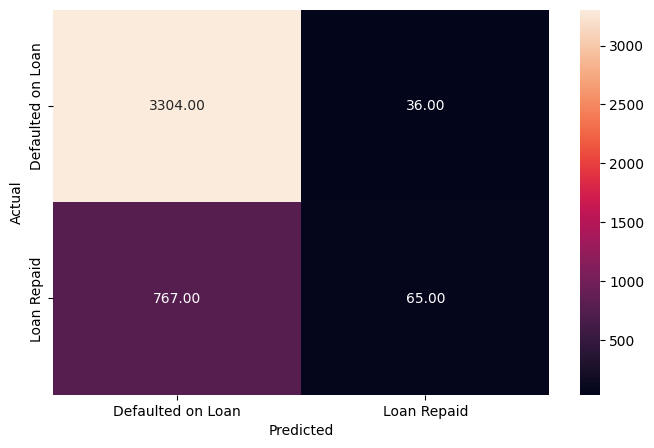

In [72]:
# Checking the performance on the training data by predicting the target variable using the logistic regression model (lg1)
y1_pred_train = lg1.predict(x1_train)

# Computing various performance metrics using the 'metrics_score' function
metrics_score(y1_train, y1_pred_train)


              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1431
           1       0.69      0.08      0.14       357

    accuracy                           0.81      1788
   macro avg       0.75      0.53      0.51      1788
weighted avg       0.79      0.81      0.74      1788



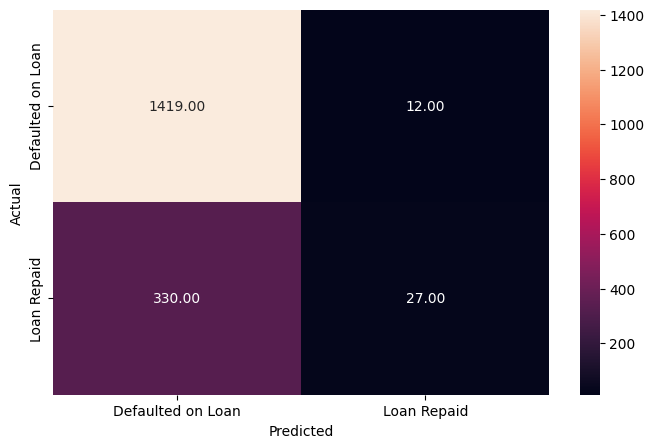

In [73]:
# Checking the performance on the testing data by predicting the target variable using the logistic regression model (lg1)
y1_pred_test = lg1.predict(x1_test)

# Computing various performance metrics using the 'metrics_score' function
metrics_score(y1_test, y1_pred_test)

In [74]:
# Evaluating the performance of the Logistic Regression model (lg1) on the test dataset (x1_test and y1_test)

# Calling the model_performance_classification function to compute performance metrics
lg1_test_median = model_performance_classification(lg1, x1_test, y1_test)

# Displaying the performance metrics for the logistic regression model on the test dataset
lg1_test_median

Precision  Recall  Accuracy
0    0.75181 0.53362   0.80872

***Observations:***

* *The model trained on the dataset with median/mode imputation (Dataframe: `Loan_df_1`) demonstrates similar performance across both the training and testing datasets, suggesting a generalized capability to classify loan default instances.*
* *There's a marginal enhancement in precision for class 1 (Defaulted on loan), indicating a slightly improved ability to accurately identify loan default cases.*
* *However, a notable concern arises from the presence of 330 False Negative instances in the confusion matrices of the testing datasets. This implies that the model struggles to correctly identify loan default cases. Given the bank's reliance on clients who repay loans, such misclassifications could lead to substantial financial losses if this model is put into operational use.*

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      3340
           1       0.69      0.07      0.13       832

    accuracy                           0.81      4172
   macro avg       0.75      0.53      0.51      4172
weighted avg       0.79      0.81      0.74      4172



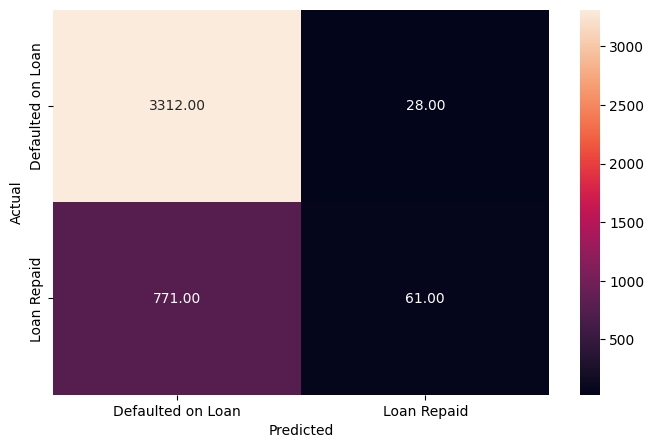

In [75]:
# Checking the performance on the training data by predicting the target variable using the logistic regression model (lg1)
y2_pred_train = lg2.predict(x2_train_imputed)

# Computing various performance metrics using the 'metrics_score' function
metrics_score(y2_train, y2_pred_train)

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1431
           1       0.67      0.07      0.12       357

    accuracy                           0.81      1788
   macro avg       0.74      0.53      0.51      1788
weighted avg       0.78      0.81      0.74      1788



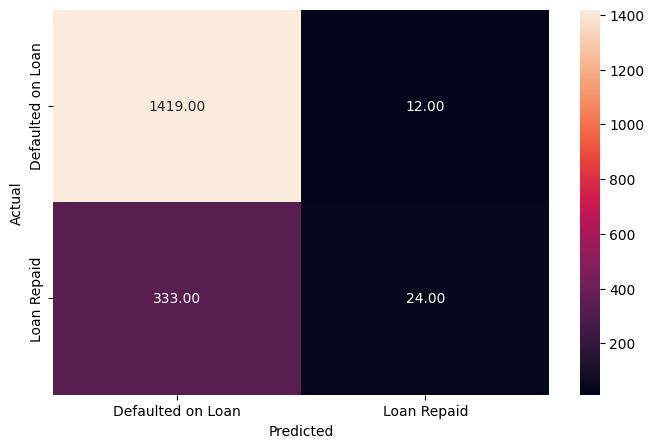

In [76]:
# Checking the performance on the testing data by predicting the target variable using the logistic regression model (lg1)
y2_pred_test = lg2.predict(x2_test_imputed)

# Computing various performance metrics using the 'metrics_score' function
metrics_score(y2_test, y2_pred_test)

In [77]:
# Evaluating the performance of the Logistic Regression model (lg2) on the test dataset (x2_test and y2_test)

# Calling the model_performance_classification function to compute performance metrics
lg2_test_KNN = model_performance_classification(lg2, x2_test_imputed, y2_test)

# Displaying the performance metrics for the logistic regression model on the test dataset
lg2_test_KNN

Precision  Recall  Accuracy
0    0.73830 0.52942   0.80705

***Observations:***

* *Much like the dataset imputed using median/mode imputation (DataFrame: `Loan_df_1`), the dataset imputed using K-NNImputer (DataFrame: `Loan_df_2`) demonstrates quite similar performance across both the training and testing datasets. This suggests a generalized proficiency across different classes.*
* *The model exhibits a slightly better performance on the testing dataset compared to the training dataset, showing higher precision in the testing dataset.*
* *However, the presence of 333 False Negative cases in the confusion matrices of the testing dataset raises concerns. It indicates the model's challenge in accurately identifying instances of loan defaults.* 

2. **Model Improvement**

***Let's use the Precision-Recall Curve***

*The Precision-Recall Curve provides valuable insights into the model's ability to balance precision and recall.*


In [78]:
def plot_precision_recall_curve(model, x_train, y_train):
    """
    Plot the Precision-Recall Curve for a given model.

    Parameters:
    - model: Trained classifier model with predict_proba() method
    - x_train: Features of the training set
    - y_train: Target variable of the training set

    Returns:
    - None (displays the plot)
    """
    # Predict probabilities of each observation belonging to each class
    y_scores = model.predict_proba(x_train)
    
    # Compute precision, recall, and thresholds
    precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores[:, 1])
    
    # Plot values of precisions, recalls, and thresholds
    plt.figure(figsize=(10, 7))
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label='recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0, 1])
    plt.show()


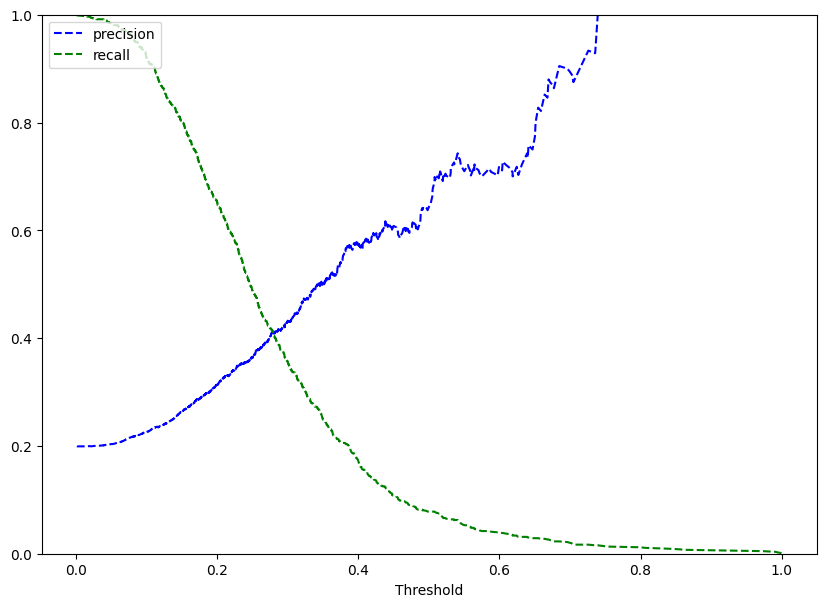

In [79]:
# Plot the precision-recall curve for the logistic regression model (lg1) using the training data from Loan_df_1
plot_precision_recall_curve(lg1, x1_train, y1_train)

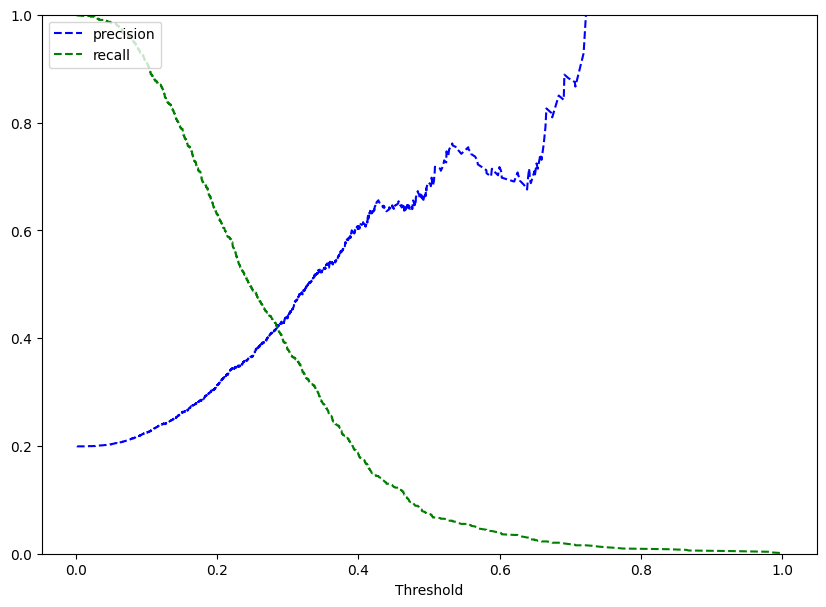

In [80]:
# Plot the precision-recall curve for the logistic regression model (lg2) using the training data from Loan_df_2
plot_precision_recall_curve(lg2, x2_train_imputed, y2_train)

***Observations:***

* *We can see that the precision and the recall are balanced for a threshold of about **0.35** for both datasets (`Loan_df_1` and `Loan_df_2`)*

***We will use this threshold for the model because the performance is better.***

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      3340
           1       0.50      0.25      0.33       832

    accuracy                           0.80      4172
   macro avg       0.67      0.59      0.61      4172
weighted avg       0.77      0.80      0.77      4172



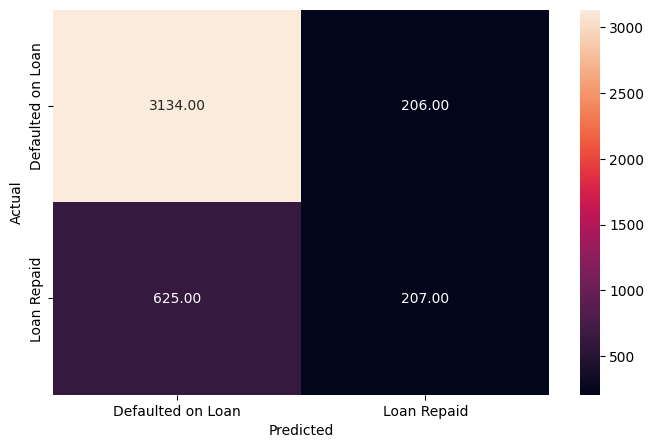

In [81]:
# Define the optimal threshold for classification
optimal_threshold1 = 0.35

# Predict probabilities for the x1 training data using the logistic regression model
y1_pred_train = lg1.predict_proba(x1_train)

# Calculate the metrics score using the specified threshold
metrics_score(y1_train, y1_pred_train[:, 1] > optimal_threshold1)


              precision    recall  f1-score   support

           0       0.83      0.95      0.89      1431
           1       0.54      0.24      0.33       357

    accuracy                           0.81      1788
   macro avg       0.69      0.59      0.61      1788
weighted avg       0.77      0.81      0.78      1788



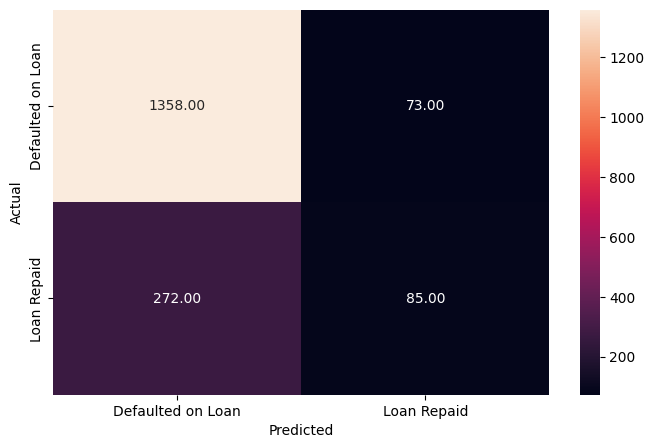

In [82]:
# Define the optimal threshold for classification
optimal_threshold1 = 0.35

# Predict probabilities for the x1 testing data using the logistic regression model
y1_pred_test = lg1.predict_proba(x1_test)

# Calculate the metrics score using the specified threshold
metrics_score(y1_test, y1_pred_test[:, 1] > optimal_threshold1)

***Observations:***

* *For the data imputed using the median/mode imputation method (Dataframe:`Loan_df_1`), the model shows **similar performance** on both the test and train datasets, indicating a generalized performance across the classes. There's a slight improvement in precision for class 1 (Defaulted on loan) in the testing dataset.*
* *However, the presence of 272 False Negative cases in the confusion matrices in the testing dataset is concerning. This indicates that the model is failing to identify instances of loan defaults accurately. The bank needs clients who repay loans, such errors could lead to significant financial losses for the bank if this model is deployed.*

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      3340
           1       0.52      0.28      0.36       832

    accuracy                           0.81      4172
   macro avg       0.68      0.61      0.62      4172
weighted avg       0.78      0.81      0.78      4172



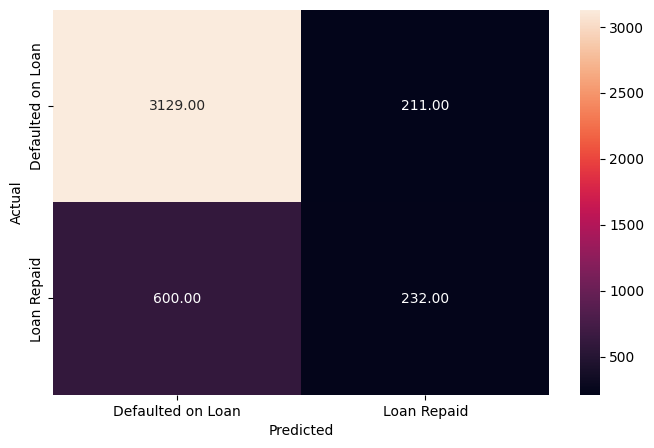

In [83]:
# Define the optimal threshold for classification
optimal_threshold1 = 0.35

# Predict probabilities for the x2 training data using the logistic regression model
y2_pred_train = lg2.predict_proba(x2_train_imputed)

# Calculate the metrics score using the specified threshold
metrics_score(y2_train, y2_pred_train[:, 1] > optimal_threshold1)

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1431
           1       0.57      0.25      0.35       357

    accuracy                           0.81      1788
   macro avg       0.70      0.60      0.62      1788
weighted avg       0.78      0.81      0.78      1788



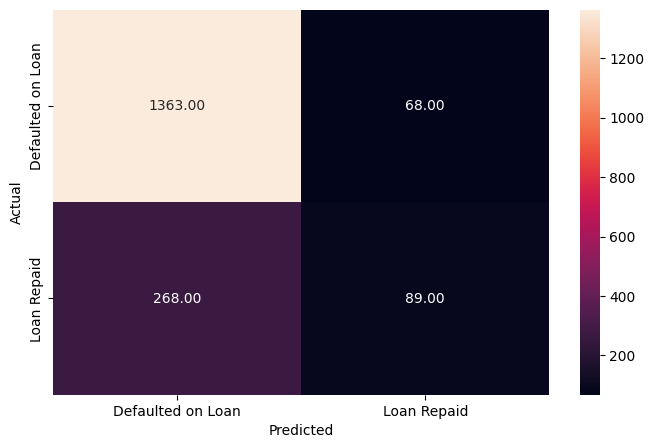

In [84]:
# Define the optimal threshold for classification
optimal_threshold1 = 0.35

# Predict probabilities for the x2 testing data using the logistic regression model
y2_pred_test = lg2.predict_proba(x2_test_imputed)

# Calculate the metrics score using the specified threshold
metrics_score(y2_test, y2_pred_test[:, 1] > optimal_threshold1)

***Observations:***

* *Similar to the data imputed using the median/mode imputation method (DataFrame: `Loan_df_1`), the data imputed using K-NNImputer (DataFrame: `Loan_df_2`) shows a quite **similar performance** on both the test and train datasets, suggesting a generalized performance across the classes. The model on the training dataset is performing slightly better than on the test dataset. The precision for class 1 (Defaulted on loan) is lower on the training dataset.*

* *However, the presence of 268 False Negative cases in the confusion matrices of the testing dataset is concerning. This indicates that the model is failing to identify instances of loan defaults accurately. Given that the bank relies on clients who repay loans, such errors could lead to significant financial losses if this model is deployed.*

***Overall performance of the model with median/mode imputation or K-NN imputation method:***

*The bank depends on clients who repay loans, so a model with fewer false negative cases is better for the bank's interests. Given this, the model with K-NN imputation has fewer false negatives and is currently the most advantageous option.*

## **Decision Tree**

***Decision Tree** is a simple yet powerful algorithm used for both classification and regression tasks. It provides a straightforward and interpretable method for decision-making by recursively splitting the feature space based on the most informative features.*

*A breakdown of how it operates:*

1. ***Splitting**: The algorithm partitions the feature space into regions based on the feature values that best separate the data.*
2. ***Decision Making**: At each split, decisions are made based on feature values to classify or predict the target variable.*
3. ***Tree Structure**: The decisions form a tree-like structure, with nodes representing features, branches representing decisions, and leaf nodes containing the final predictions.*
4. ***Interpretability**: Decision Trees are easily interpretable, making them valuable for understanding the logic behind predictions.*

***Model Construction with DecisionTreeClassifier:***

* *We're opting for the DecisionTreeClassifier method to build our model.*
* *In our dataset, the target feature is labeled **"BAD"**. The distribution of subcategories in **"BAD"** shows around 80.1% for `'BAD=0'` (indicating clients who repaid loans) and about 19.9% for `'BAD=1'` (indicating clients who defaulted on loans).*
* *`'BAD=0'` dominates the dataset. To ensure the decision tree considers both classes adequately, we'll adjust the weights of each subcategory.*

***class_weight, a hyperparameter for the decision tree classifier, will be utilized in this context:***

1. *We'll specify the weight of each class by passing a dictionary `{0:0.199, 1:0.801}` to class_weight. This ensures the decision tree assigns more importance to class 1.*

2. *Additionally, we'll employ SMOTE (Synthetic Minority Over-sampling Technique) to tackle imbalanced datasets effectively.*

*We'll implement both strategies and assess their impact on model performance.*

In [85]:
# Importing the SMOTE library for oversampling
from imblearn.over_sampling import SMOTE

# Initializing the SMOTE object
smote = SMOTE()

# Performing oversampling on x1_train and y1_train
x1_train_smote, y1_train_smote = smote.fit_resample(x1_train, y1_train)

# Performing oversampling on x1_test and y1_test
x1_test_smote, y1_test_smote = smote.fit_resample(x1_test, y1_test)

# Performing oversampling on x2_train_imputed and y2_train
x2_train_smote, y2_train_smote = smote.fit_resample(x2_train_imputed, y2_train)

# Performing oversampling on x2_test_imputed and y2_test
x2_test_smote, y2_test_smote = smote.fit_resample(x2_test_imputed, y2_test)


In [86]:
'''
Display the proportion of each value in the target feature 'BAD' before and after oversampling using SMOTE
'''

# List of DataFrames
dfs = [y1_train, y1_train_smote, y1_test, y1_test_smote, y2_train, y2_train_smote, y2_test, y2_test_smote]

# List of DataFrame names
df_names = ["y1_train", "y1_train_smote", "y1_test", "y1_test_smote", "y2_train", "y2_train_smote", "y2_test", "y2_test_smote"]

# Iterate over each DataFrame
for name, df in zip(df_names, dfs):
    # Calculate the total number of values in the DataFrame
    total_values = len(df)
    # Count the occurrences of each unique value
    value_counts = df.value_counts()
    print(f"DataFrame: {name}")
    # Iterate over each unique value and its count
    for value, count in value_counts.items():
        # Calculate the percentage of the current value
        percentage = (count / total_values) * 100
        # Print the value, count, and percentage
        print(f"{value}: Count = {count}, Percentage = {percentage:.2f}%")
    print()  # Add a blank line for clarity between DataFrames


DataFrame: y1_train
(0,): Count = 3340, Percentage = 80.06%
(1,): Count = 832, Percentage = 19.94%

DataFrame: y1_train_smote
(0,): Count = 3340, Percentage = 50.00%
(1,): Count = 3340, Percentage = 50.00%

DataFrame: y1_test
(0,): Count = 1431, Percentage = 80.03%
(1,): Count = 357, Percentage = 19.97%

DataFrame: y1_test_smote
(0,): Count = 1431, Percentage = 50.00%
(1,): Count = 1431, Percentage = 50.00%

DataFrame: y2_train
(0,): Count = 3340, Percentage = 80.06%
(1,): Count = 832, Percentage = 19.94%

DataFrame: y2_train_smote
(0,): Count = 3340, Percentage = 50.00%
(1,): Count = 3340, Percentage = 50.00%

DataFrame: y2_test
(0,): Count = 1431, Percentage = 80.03%
(1,): Count = 357, Percentage = 19.97%

DataFrame: y2_test_smote
(0,): Count = 1431, Percentage = 50.00%
(1,): Count = 1431, Percentage = 50.00%



In [87]:
y1_test_smote

BAD
0      0
1      0
2      0
3      0
4      0
...   ..
2857   1
2858   1
2859   1
2860   1
2861   1

[2862 rows x 1 columns]

In [88]:
y1_test

BAD
4394   0
5000   0
2786   0
2256   0
114    0
...   ..
4506   0
4768   1
4162   0
1331   0
4924   0

[1788 rows x 1 columns]

***Observations:***

*To address imbalanced datasets, one strategy is oversampling the minority class. A simple approach involves duplicating instances in the minority class, but this doesn't provide new insights to the model. Instead, Synthetic Minority Oversampling Technique (SMOTE) synthesizes new instances based on existing ones, effectively augmenting the minority class data. This augmentation can be observed in the proportion of values in the target feature `'BAD'` displayed above.*


In [89]:
# Building decision tree model for the DataFrame Loan_df_1 (x1_train and x1_test dataset) 
dt1 = DecisionTreeClassifier(class_weight = {0: 0.199, 1: 0.801}, random_state = 1)
# Fitting decision tree model for the DataFrame Loan_df_1 (x1_train and x1_test dataset) 
dt1.fit(x1_train, y1_train)

DecisionTreeClassifier(class_weight={0: 0.199, 1: 0.801}, random_state=1)

In [90]:
# Building decision tree model for the DataFrame Loan_df_2 (x2_train_imputed and x1_test_imputed dataset) 
dt2 = DecisionTreeClassifier(class_weight = {0: 0.199, 1: 0.801}, random_state = 1)
# Fitting decision tree model for the DataFrame Loan_df_2 (x2_train_imputed and x1_test_imputed dataset)
dt2.fit(x2_train_imputed, y2_train)

DecisionTreeClassifier(class_weight={0: 0.199, 1: 0.801}, random_state=1)

In [91]:
# Building decision tree model for the DataFrame Loan_df_1 (x1_train and x1_test dataset) with SMOTE sampling strategy
dt_smote_1 = DecisionTreeClassifier( random_state = 1)
# Fitting decision tree model for the DataFrame Loan_df_1 (x1_train and x1_test dataset) 
dt_smote_1.fit(x1_train_smote, y1_train_smote)

DecisionTreeClassifier(random_state=1)

In [92]:
# Building decision tree model for the DataFrame Loan_df_2 (x2_train_imputed and x2_test dataset) with SMOTE sampling strategy
dt_smote_2 = DecisionTreeClassifier( random_state = 1)
dt_smote_2.fit(x2_train_smote, y2_train_smote)

DecisionTreeClassifier(random_state=1)

**Decision Tree Model Performance and Evaluations**

1. **Let's check the model performance of decision tree`"dt1"`**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



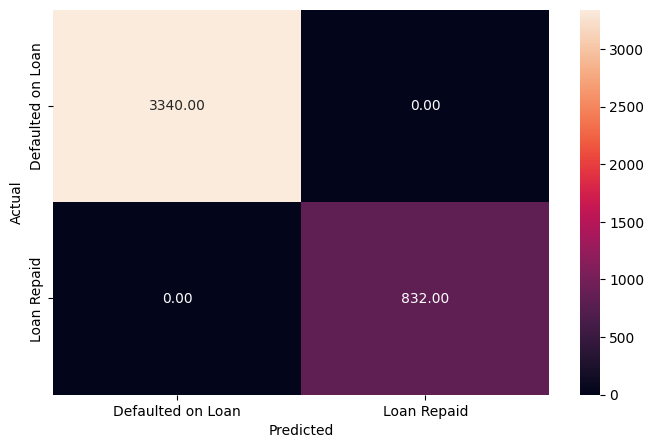

In [93]:
# Predicting the target variable 'y1_train_pred_dt1' using the Decision Tree model (dt1) on the training dataset 'x1_train'
y1_train_pred_dt1 = dt1.predict(x1_train)

# Evaluating the performance metrics of the Decision Tree model
# on the training dataset 'x1_train' and comparing it with the actual target variable 'y1_train'
metrics_score(y1_train, y1_train_pred_dt1)


              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1431
           1       0.64      0.58      0.61       357

    accuracy                           0.85      1788
   macro avg       0.77      0.75      0.76      1788
weighted avg       0.85      0.85      0.85      1788



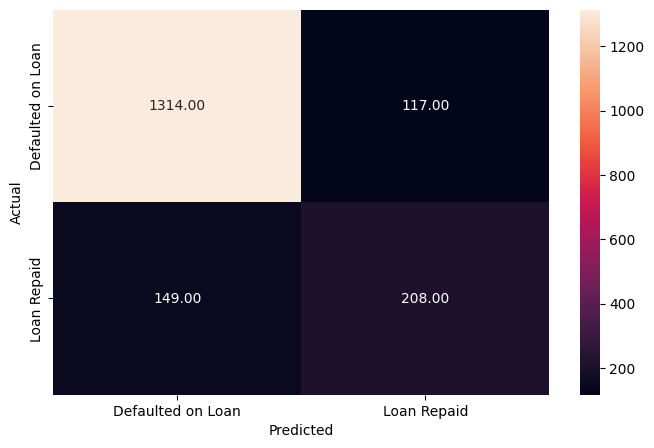

In [94]:
# Predicting the target variable 'y1_test_pred_dt1' using the Decision Tree model (dt1) on the testing dataset 'x1_test'
y1_test_pred_dt1 = dt1.predict(x1_test)

# Evaluating the performance metrics of the Decision Tree model
# on the testing dataset 'x1_test' and comparing it with the actual target variable 'y1_test'
metrics_score(y1_test, y1_test_pred_dt1)

In [95]:
# Evaluating the performance of the Decision Tree model (dt1) on the test dataset (x1_test and y1_test)

# Calling the model_performance_classification function to compute performance metrics
dt1_test_median = model_performance_classification(dt1, x1_test, y1_test)

# Displaying the performance metrics for the logistic regression model on the test dataset
dt1_test_median

Precision  Recall  Accuracy
0    0.76908 0.75044   0.85123

***Observations:***

* *The Decision Tree performs effectively on the training data but exhibits a decline in performance on the test data, indicated by a recall score of 0.75 compared to a perfect score of 1 on the training dataset. This discrepancy suggests that the Decision Tree is overfitting the training data.*
* *The precision score on the test data indicates that there's a 23% chance (1 - 0.77) that the model will incorrectly predict that a client will default on loans when they actually would not. **This error could result in the bank missing out on potential profits from misclassified clients.***

2. **Let's check the model performance of decision tree`"dt2"`**

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3340
           1       0.88      0.87      0.87       832

    accuracy                           0.95      4172
   macro avg       0.92      0.92      0.92      4172
weighted avg       0.95      0.95      0.95      4172



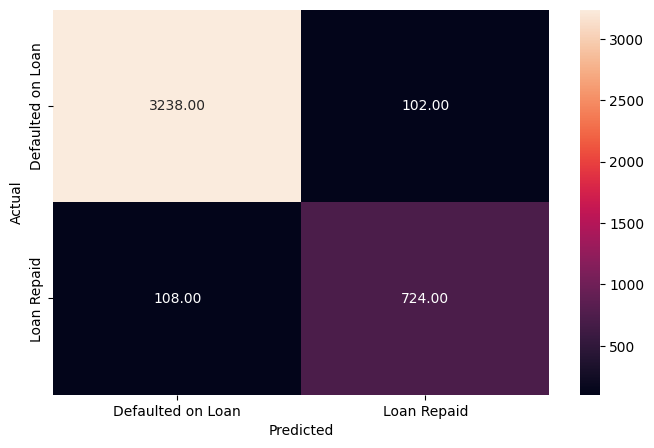

In [96]:
# Predicting the target variable 'y2_train_pred_dt2' using the Decision Tree model (dt2) on the training dataset 'x2_train'
y2_train_pred_dt2 = dt2.predict(x2_train)

# Evaluating the performance metrics of the Decision Tree model
# on the training dataset 'x2_train' and comparing it with the actual target variable 'y2_train'
metrics_score(y2_train, y2_train_pred_dt2)


              precision    recall  f1-score   support

           0       0.88      0.91      0.89      1431
           1       0.57      0.48      0.52       357

    accuracy                           0.82      1788
   macro avg       0.72      0.70      0.71      1788
weighted avg       0.81      0.82      0.82      1788



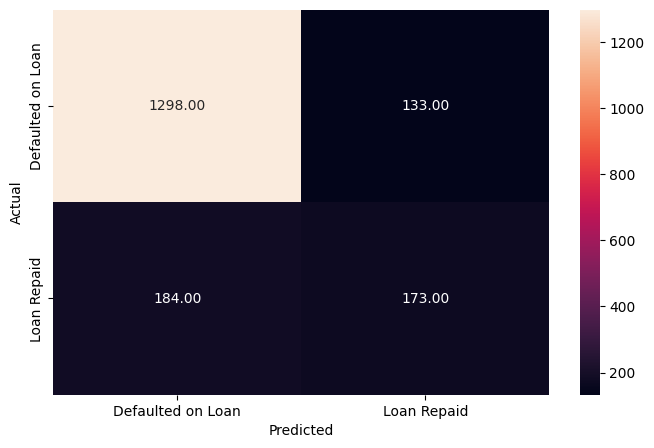

In [97]:
# Predicting the target variable 'y2_test_pred_dt2' using the Decision Tree model (dt2) on the testing dataset 'x2_test'
y2_test_pred_dt2 = dt2.predict(x2_test)

# Evaluating the performance metrics of the Decision Tree model
# on the testing dataset 'x2_test' and comparing it with the actual target variable 'y2_test'
metrics_score(y2_test, y2_test_pred_dt2)

In [98]:
# Evaluating the performance of the Decision Tree model (dt2) on the test dataset (x2_test and y2_test)

# Calling the model_performance_classification function to compute performance metrics
dt2_test_KNN = model_performance_classification(dt2, x2_test, y2_test)

# Displaying the performance metrics for the logistic regression model on the test dataset
dt2_test_KNN

Precision  Recall  Accuracy
0    0.72060 0.69583   0.82271

***Observation:***

* *The Decision Tree shows strong performance on the training dataset, but its effectiveness diminishes on the testing data. However, there's no indication of overfitting.*
* *A comparison between the previous Decision Tree (dt1) and this one (dt2) reveals a higher count of false negatives (189) in dt2 compared to dt1 (149). This suggests that dt1 outperforms dt2 in terms of minimizing false negatives, which is crucial for the bank's interest in accurately predicting loan defaults.*


3. **Let's check the model performance of Decision Tree`"dt_smote_1"`**

* *To address the imbalance in the target feature `'BAD'`, we employed the Synthetic Minority Oversampling Technique (SMOTE). This technique augments the minority class in the dataset. The training and testing datasets used for this model are the ones with the augmented minority class: `y1_train_smote`, and `y1_test_smote`.*


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00      3340

    accuracy                           1.00      6680
   macro avg       1.00      1.00      1.00      6680
weighted avg       1.00      1.00      1.00      6680



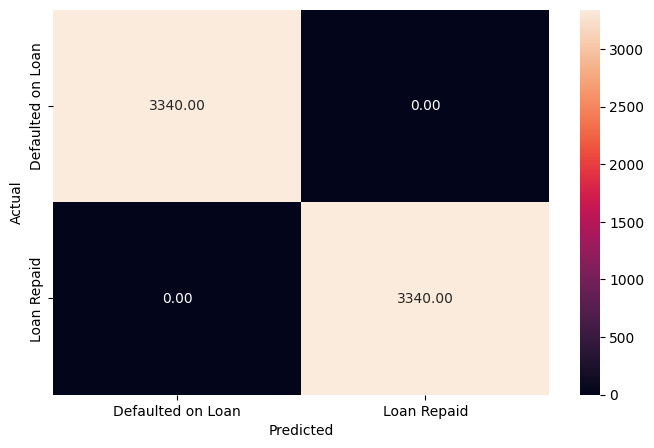

In [99]:
# Predicting the target variable 'y1_train_pred_dt_smote_1' using the Decision Tree model (dt_smote_1) on the training dataset 'x1_train'
y1_train_pred_dt_smote_1 = dt_smote_1.predict(x1_train_smote)

# Evaluating the performance metrics of the Decision Tree model
# on the training dataset 'x1_train' and comparing it with the actual target variable 'y1_train'
metrics_score(y1_train_smote, y1_train_pred_dt_smote_1)

              precision    recall  f1-score   support

           0       0.73      0.88      0.79      1431
           1       0.84      0.67      0.75      1431

    accuracy                           0.77      2862
   macro avg       0.79      0.77      0.77      2862
weighted avg       0.79      0.77      0.77      2862



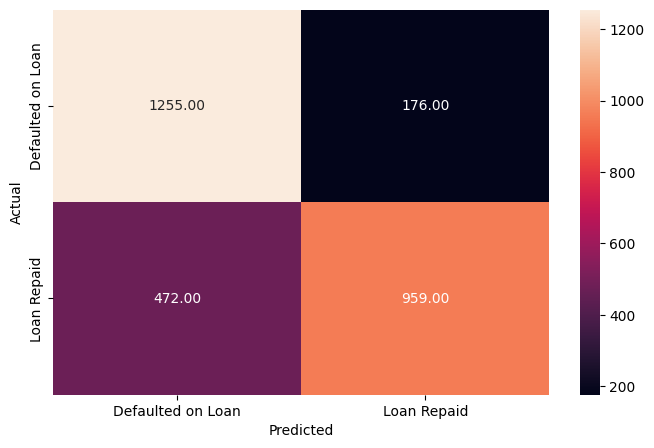

In [100]:
# Predicting the target variable 'y1_test_pred_dt_smote_1' using the Decision Tree model (dt_smote_1) on the testing dataset 'x1_test'
y1_test_pred_dt_smote_1 = dt_smote_1.predict(x1_test_smote)

# Evaluating the performance metrics of the Decision Tree model
# on the testing dataset 'x1_test' and comparing it with the actual target variable 'y1_test'
metrics_score(y1_test_smote, y1_test_pred_dt_smote_1)

In [101]:
# Evaluating the performance of the Decision Tree model (dt_smote_1) on the test dataset (x1_test and y1_test)

# Calling the model_performance_classification function to compute performance metrics
dt_smote_1_test_median = model_performance_classification(dt_smote_1, x1_test_smote, y1_test_smote)

# Displaying the performance metrics for the logistic regression model on the test dataset
dt_smote_1_test_median

Precision  Recall  Accuracy
0    0.78581 0.77358   0.77358

***Observations:***

* *While the Decision Tree performs well on the training data, its effectiveness drops on the test data, with a recall score of 0.77 compared to a perfect 1 on the training set, hinting at potential overfitting.*
* *The precision score on the test data implies a 22% chance (1 - 0.78) of the model incorrectly predicting loan defaults, potentially resulting in missed profits from misclassified clients.*


4. **Let's check the model performance of Decision Tree`"dt_smote_2"`**

* *To address the imbalance in the target feature `'BAD'`, we employed the Synthetic Minority Oversampling Technique (SMOTE). This technique augments the minority class in the dataset. The training and testing datasets used for this model are the ones with the augmented minority class: `y2_train_smote`, and `y2_test_smote`.*

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00      3340

    accuracy                           1.00      6680
   macro avg       1.00      1.00      1.00      6680
weighted avg       1.00      1.00      1.00      6680



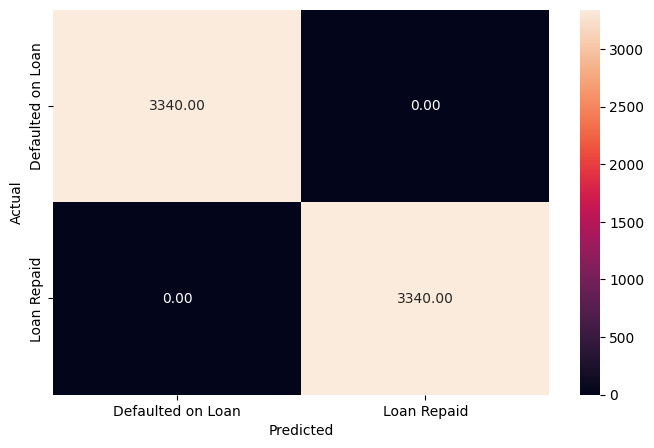

In [102]:
# Predicting the target variable 'y2_train_pred_dt_smote_2' using the Decision Tree model (dt_smote_2) on the training dataset 'x2_train'
y2_train_pred_dt_smote_2 = dt_smote_2.predict(x2_train_smote)

# Evaluating the performance metrics of the Decision Tree model
# on the training dataset 'x2_train' and comparing it with the actual target variable 'y2_train'
metrics_score(y2_train_smote, y2_train_pred_dt_smote_2)

              precision    recall  f1-score   support

           0       0.74      0.88      0.81      1431
           1       0.86      0.70      0.77      1431

    accuracy                           0.79      2862
   macro avg       0.80      0.79      0.79      2862
weighted avg       0.80      0.79      0.79      2862



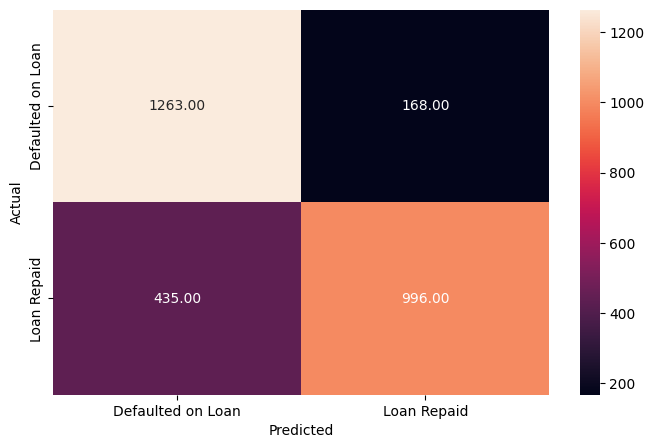

In [103]:
# Predicting the target variable 'y2_test_pred_dt_smote_2' using the Decision Tree model (dt_smote_2) on the testing dataset 'x2_test'
y2_test_pred_dt_smote_2 = dt_smote_2.predict(x2_test_smote)

# Evaluating the performance metrics of the Decision Tree model
# on the testing dataset 'x2_test' and comparing it with the actual target variable 'y2_test'
metrics_score(y2_test_smote, y2_test_pred_dt_smote_2)

In [104]:
# Evaluating the performance of the Decision Tree model (dt_smote_2) on the test dataset (x2_test and y2_test)

# Calling the model_performance_classification function to compute performance metrics
dt_smote_2_test_KNN = model_performance_classification(dt_smote_2, x2_test_smote, y2_test_smote)

# Displaying the performance metrics for the logistic regression model on the test dataset
dt_smote_2_test_KNN

Precision  Recall  Accuracy
0    0.79974 0.78931   0.78931

***Observation:***

* *The Decision Tree shows strong performance on the training dataset, but its effectiveness diminishes on the testing data. However, there's an indication of overfitting.*
* *The precision score on the test data implies a 20% chance (1 - 0.80) of the model incorrectly predicting loan defaults, potentially resulting in missed profits from misclassified clients.*


In [105]:
# Comparison of the performance of the models done so far (logistic regression models and the Decision Tree models) on the test dataset.

models_test_comp_df = pd.concat(
    [
        lg1_test_median.T,
        lg2_test_KNN.T,
        dt1_test_median.T,
        dt2_test_KNN.T,
        dt_smote_1_test_median.T,
        dt_smote_2_test_KNN.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Original Logistic Regression with median imputer",
    "Original Logistic Regression with K-NNimputer",
    "Original Decision Tree with median imputer",
    "Original Decision Tree with K-NNimputer",
    "Original Decision Tree with median imputer & SMOTE",
    "Original Decision Tree with K-NNimputer & SMOTE"
]
print("Performance comparison on the different model done on the test dataset:")
models_test_comp_df.T

Performance comparison on the different model done on the test dataset:


Precision  Recall  \
Original Logistic Regression with median imputer      0.75181 0.53362   
Original Logistic Regression with K-NNimputer         0.73830 0.52942   
Original Decision Tree with median imputer            0.76908 0.75044   
Original Decision Tree with K-NNimputer               0.72060 0.69583   
Original Decision Tree with median imputer & SMOTE    0.78581 0.77358   
Original Decision Tree with K-NNimputer & SMOTE       0.79974 0.78931   

                                                    Accuracy  
Original Logistic Regression with median imputer     0.80872  
Original Logistic Regression with K-NNimputer        0.80705  
Original Decision Tree with median imputer           0.85123  
Original Decision Tree with K-NNimputer              0.82271  
Original Decision Tree with median imputer & SMOTE   0.77358  
Original Decision Tree with K-NNimputer & SMOTE      0.78931


***Observations:***

* *The decision Tree with K-NNimputer & SMOTE, the last model completed has the highest precision and recall scores among all the models done so far. It is the top recommendation for the bank thus far.*

### **Decision Tree - Hyperparameter Tuning**

* *Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.*
* ***Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.***
* ***It is an exhaustive search** that is performed on the specific parameter values of a model.*
* *The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.*

***Criterion {“gini”, “entropy”}***

*The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.*

***max_depth*** 

*The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.*

***min_samples_leaf***

*The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.*

*You can learn about more Hyperpapameters on this link and try to tune them.* 

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


***Our Tuning Approach***

*The imbalance in the target feature indicates that adjusting the class weight hyperparameter might be necessary for tuning the Decision Tree models. Since we've also addressed the class imbalance using SMOTE, we'll explore tuning a Decision Tree model both with and without considering class weight as a hyperparameter. After tuning, we'll compare the performance of all the models to determine the most effective approach.*

***We will create four Decision Tree models with tuned hyperparameters:***

1. ***`dt_estimator_median`**: This model will be trained using data imputed through the median/mode imputation method.*
2. ***`dt_estimator_KNN`**: This model will be trained using data imputed with K-NNImputer.*
3. ***`dt_estimator_SMOTE_median`**: This model will be tuned without considering the class weight hyperparameter and will be trained using data imputed through the median/mode imputation method.*
4. ***`dt_estimator_SMOTE_KNN`**: This model will be tuned without considering the class weight hyperparameter and will be trained using data imputed with K-NNImputer and SMOTE.*

In [106]:
# Choose the type of classifier
dt_estimator_median = DecisionTreeClassifier(class_weight = {0: 0.199, 1: 0.801}, random_state = 1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 9),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [3, 5, 10, 20, 25, 30, 35]
             }

# Type of scoring used to compare parameter combinations
scorer_median = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV_median = GridSearchCV(dt_estimator_median, parameters, scoring = scorer_median, cv = 10)

# Fitting the grid search on the train data
gridCV_median = gridCV_median.fit(x1_train, y1_train)

# Set the classifier to the best combination of parameters
dt_estimator_median = gridCV_median.best_estimator_

# Fit the best estimator to the data
dt_estimator_median.fit(x1_train, y1_train)

DecisionTreeClassifier(class_weight={0: 0.199, 1: 0.801}, max_depth=8,
                       min_samples_leaf=30, random_state=1)

In [107]:
# Choose the type of classifier
dt_estimator_KNN = DecisionTreeClassifier(class_weight = {0: 0.199, 1: 0.801}, random_state = 1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 9),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [3, 5, 10, 20, 25, 30, 35]
             }

# Type of scoring used to compare parameter combinations
scorer_KNN = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV_KNN = GridSearchCV(dt_estimator_KNN, parameters, scoring = scorer_KNN, cv = 10)

# Fitting the grid search on the train data
gridCV_KNN = gridCV_KNN.fit(x2_train_imputed, y2_train)

# Set the classifier to the best combination of parameters
dt_estimator_KNN = gridCV_KNN.best_estimator_

# Fit the best estimator to the data
dt_estimator_KNN.fit(x2_train_imputed, y2_train)

DecisionTreeClassifier(class_weight={0: 0.199, 1: 0.801}, max_depth=8,
                       min_samples_leaf=25, random_state=1)

In [108]:
# Choose the type of classifier
dt_estimator_SMOTE_median = DecisionTreeClassifier(random_state = 1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 9),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [3, 5, 10, 20, 25, 30, 35]
             }

# Type of scoring used to compare parameter combinations
scorer_SMOTE_median = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV_SMOTE_median = GridSearchCV(dt_estimator_SMOTE_median, parameters, scoring = scorer_SMOTE_median, cv = 10)

# Fitting the grid search on the train data
gridCV_SMOTE_median = gridCV_SMOTE_median.fit(x1_train_smote, y1_train_smote)

# Set the classifier to the best combination of parameters
dt_estimator_SMOTE_median = gridCV_SMOTE_median.best_estimator_

# Fit the best estimator to the data
dt_estimator_SMOTE_median.fit(x1_train_smote, y1_train_smote)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=3, random_state=1)

In [109]:
# Choose the type of classifier
dt_estimator_SMOTE_KNN = DecisionTreeClassifier(random_state = 1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 9),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [3, 5, 10, 20, 25, 30, 35]
             }

# Type of scoring used to compare parameter combinations
scorer_SMOTE_KNN = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV_SMOTE_KNN = GridSearchCV(dt_estimator_SMOTE_KNN, parameters, scoring = scorer_SMOTE_KNN, cv = 10)

# Fitting the grid search on the train data
gridCV_SMOTE_KNN = gridCV_SMOTE_KNN.fit(x2_train_smote, y2_train_smote)

# Set the classifier to the best combination of parameters
dt_estimator_SMOTE_KNN = gridCV_SMOTE_KNN.best_estimator_

# Fit the best estimator to the data
dt_estimator_SMOTE_KNN.fit(x2_train_smote, y2_train_smote)

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=3,
                       random_state=1)

**Tuned Decision Trees Model Performance and Evaluations**

              precision    recall  f1-score   support

           0       0.95      0.85      0.90      3340
           1       0.58      0.83      0.68       832

    accuracy                           0.85      4172
   macro avg       0.77      0.84      0.79      4172
weighted avg       0.88      0.85      0.85      4172



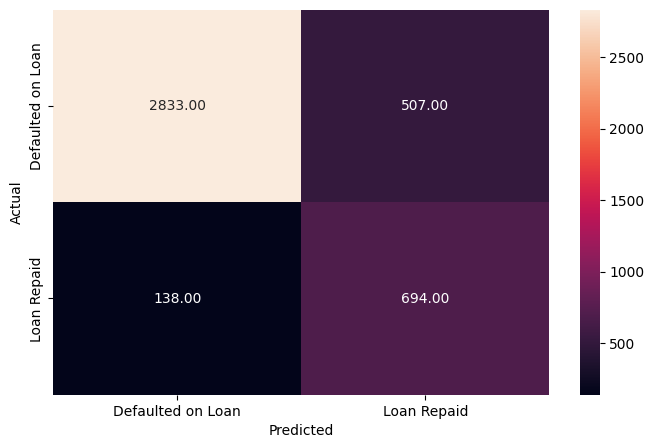

In [110]:
'''
dt_estimator_median: This model will be trained using data imputed through the median/mode imputation method.
'''
# Predicting labels on the training dataset using the trained decision tree model
y1_train_pred_dt_estimator_median = dt_estimator_median.predict(x1_train)

# Evaluating the performance of the model on the training dataset
metrics_score(y1_train, y1_train_pred_dt_estimator_median)

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      1431
           1       0.57      0.77      0.66       357

    accuracy                           0.84      1788
   macro avg       0.76      0.81      0.78      1788
weighted avg       0.87      0.84      0.85      1788



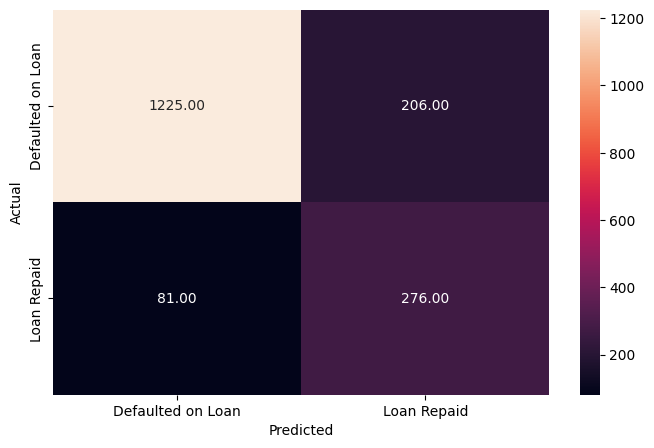

In [111]:
# Predicting labels on the test dataset using the trained decision tree model
y1_test_pred_dt_estimator_median = dt_estimator_median.predict(x1_test)

# Evaluating the performance of the model on the test dataset
metrics_score(y1_test, y1_test_pred_dt_estimator_median)


In [112]:
# Assess the performance of the decision tree model on the test dataset
dt_estimator_median_test = model_performance_classification(dt_estimator_median, x1_test, y1_test)

# Display the performance metrics for the decision tree model on the test dataset
dt_estimator_median_test

Precision  Recall  Accuracy
0    0.75530 0.81458   0.83949

***Observations:***

* *The tuned Decision Tree exhibits strong performance on the training data but experiences a slight decline in performance on the test data, with a recall score of 0.81 compared to 0.84 on the training dataset. There's no sign of overfitting.*
* *On the test data, the precision score suggests a 24% chance (1 - 0.76) of incorrectly predicting that a client will default on loans when they actually won't, potentially leading to missed profits from misclassified clients.*
* *This model has the fewest false negatives (81 cases) and the highest recall among all models tested so far, making it the top recommendation for the bank at this stage.*


              precision    recall  f1-score   support

           0       0.89      0.86      0.87      3340
           1       0.51      0.58      0.54       832

    accuracy                           0.80      4172
   macro avg       0.70      0.72      0.71      4172
weighted avg       0.82      0.80      0.81      4172



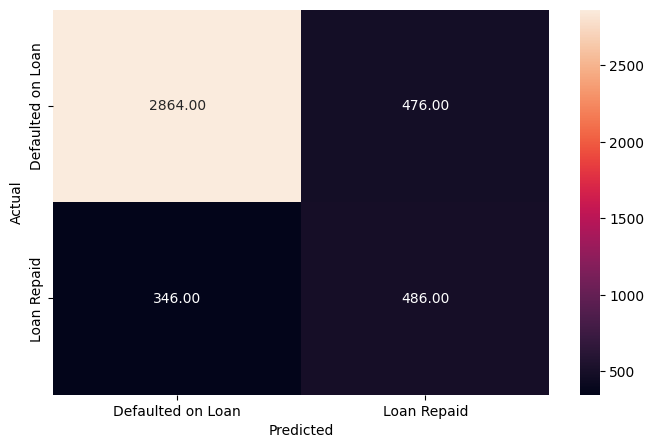

In [113]:
'''
dt_estimator_KNN: This model will be trained using data imputed with K-NNImputer.
'''
# Predicting labels on the training dataset using the trained decision tree model
y2_train_pred_dt_estimator_KNN = dt_estimator_KNN.predict(x2_train_imputed)

# Evaluating the performance of the model on the training dataset
metrics_score(y2_train, y2_train_pred_dt_estimator_KNN)

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1431
           1       0.42      0.46      0.44       357

    accuracy                           0.77      1788
   macro avg       0.64      0.65      0.65      1788
weighted avg       0.77      0.77      0.77      1788



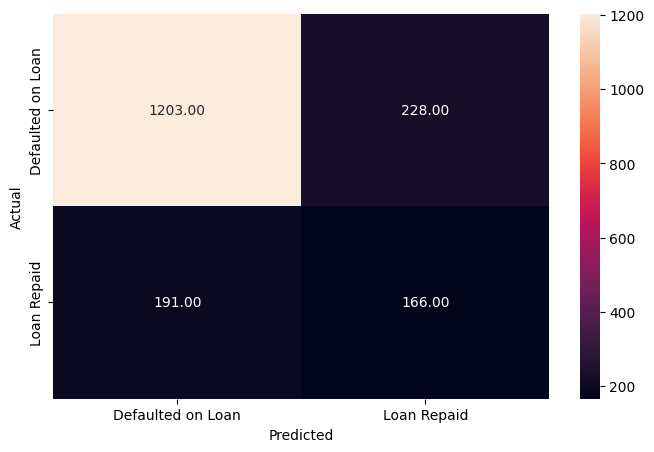

In [114]:
# Predicting labels on the test dataset using the trained decision tree model
y2_test_pred_dt_estimator_KNN = dt_estimator_KNN.predict(x2_test_imputed)

# Evaluating the performance of the model on the test dataset
metrics_score(y2_test, y2_test_pred_dt_estimator_KNN)

In [115]:
# Assess the performance of the decision tree model on the test dataset
dt_estimator_KNN_test = model_performance_classification(dt_estimator_KNN, x2_test_imputed, y2_test)

# Display the performance metrics for the decision tree model on the test dataset
dt_estimator_KNN_test

Precision  Recall  Accuracy
0    0.64215 0.65283   0.76566

***Observations:***

* *The Decision Tree performs quite well on the training dataset, but its effectiveness decreases when applied to the testing data. Nonetheless, there is no evidence of overfitting.*

              precision    recall  f1-score   support

           0       0.89      0.81      0.85      3340
           1       0.83      0.90      0.86      3340

    accuracy                           0.86      6680
   macro avg       0.86      0.86      0.86      6680
weighted avg       0.86      0.86      0.86      6680



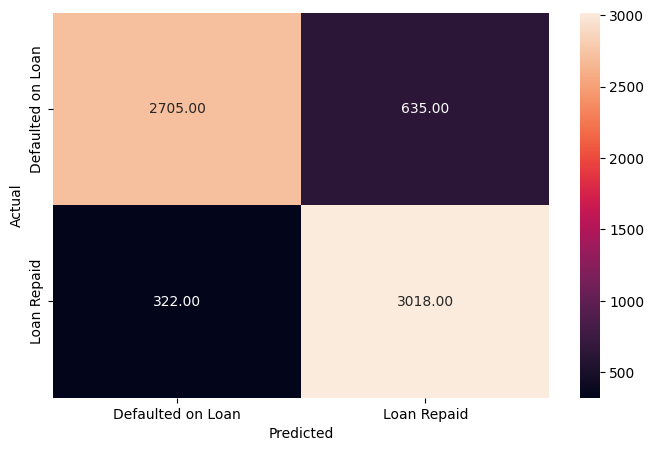

In [116]:
'''
dt_estimator_SMOTE_median: This model will be tuned without considering the class weight hyperparameter and will be trained 
using data imputed through the median/mode imputation method.
'''
# Predicting labels on the training dataset using the trained decision tree model
y1_train_pred_dt_estimator_SMOTE_median = dt_estimator_SMOTE_median.predict(x1_train_smote)

# Evaluating the performance of the model on the training dataset
metrics_score(y1_train_smote, y1_train_pred_dt_estimator_SMOTE_median)

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1431
           1       0.78      0.78      0.78      1431

    accuracy                           0.78      2862
   macro avg       0.78      0.78      0.78      2862
weighted avg       0.78      0.78      0.78      2862



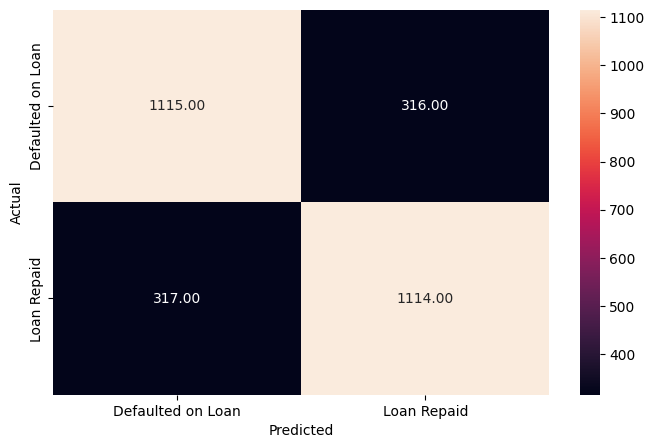

In [117]:
# Predicting labels on the test dataset using the trained decision tree model
y1_test_pred_dt_estimator_SMOTE_median = dt_estimator_SMOTE_median.predict(x1_test_smote)

# Evaluating the performance of the model on the test dataset
metrics_score(y1_test_smote, y1_test_pred_dt_estimator_SMOTE_median)

In [118]:
# Assess the performance of the decision tree model on the test dataset
dt_estimator_SMOTE_median_test = model_performance_classification(dt_estimator_SMOTE_median, x1_test_smote, y1_test_smote)

# Display the performance metrics for the decision tree model on the test dataset
dt_estimator_SMOTE_median_test

Precision  Recall  Accuracy
0    0.77883 0.77883   0.77883

***Observations:***

* *There's no overfitting observed. The model performs better on training compared to test datasets.*


              precision    recall  f1-score   support

           0       0.70      0.32      0.44      3340
           1       0.56      0.86      0.68      3340

    accuracy                           0.59      6680
   macro avg       0.63      0.59      0.56      6680
weighted avg       0.63      0.59      0.56      6680



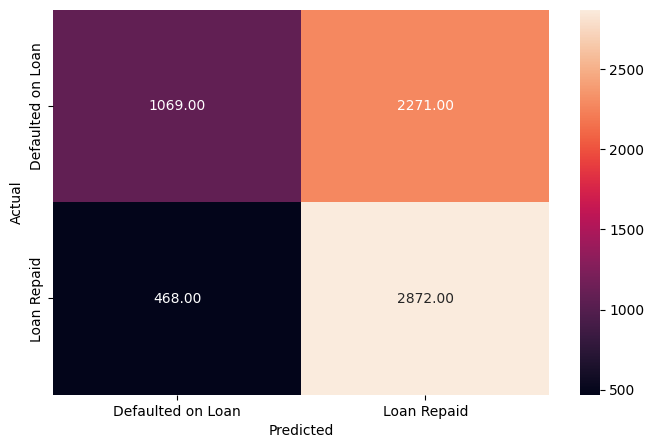

In [119]:
'''
dt_estimator_SMOTE_KNN: This model will be tuned without considering the class weight hyperparameter and will be trained 
using data imputed with K-NNImputer.
'''
# Predicting labels on the training dataset using the trained decision tree model
y2_train_pred_dt_estimator_SMOTE_KNN = dt_estimator_SMOTE_KNN.predict(x2_train_smote)

# Evaluating the performance of the model on the training dataset
metrics_score(y2_train_smote, y2_train_pred_dt_estimator_SMOTE_KNN)

              precision    recall  f1-score   support

           0       0.70      0.31      0.43      1431
           1       0.56      0.87      0.68      1431

    accuracy                           0.59      2862
   macro avg       0.63      0.59      0.55      2862
weighted avg       0.63      0.59      0.55      2862



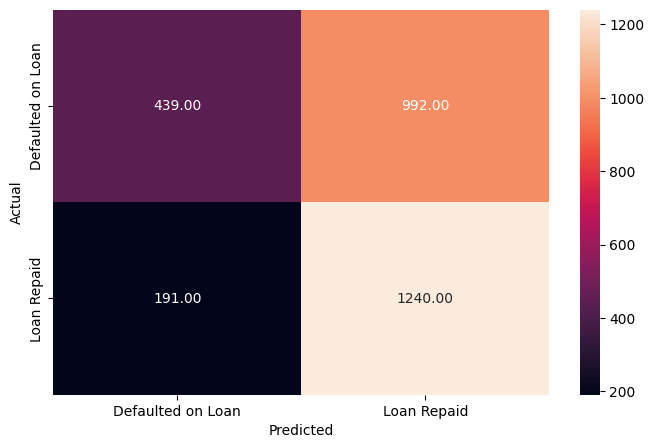

In [120]:
# Predicting labels on the test dataset using the trained decision tree model
y2_test_pred_dt_estimator_SMOTE_KNN = dt_estimator_SMOTE_KNN.predict(x2_test_smote)

# Evaluating the performance of the model on the test dataset
metrics_score(y2_test_smote, y2_test_pred_dt_estimator_SMOTE_KNN)

In [121]:
# Assess the performance of the decision tree model on the test dataset
dt_estimator_SMOTE_KNN_test = model_performance_classification(dt_estimator_SMOTE_KNN, x2_test_smote, y2_test_smote)

# Display the performance metrics for the decision tree model on the test dataset
dt_estimator_SMOTE_KNN_test

Precision  Recall  Accuracy
0    0.62619 0.58665   0.58665

***Observations:***

* *The Decision Tree performs better on the training dataset than on the testing dataset. There is no evidence of overfitting.*


In [122]:
# Comparison of the performance of the models done so far (logistic regression models and the Decision Tree models) on the test dataset.

models_test_comp_df = pd.concat(
    [
        lg1_test_median.T,
        lg2_test_KNN.T,
        dt1_test_median.T,
        dt2_test_KNN.T,
        dt_smote_1_test_median.T,
        dt_smote_2_test_KNN.T,
        dt_estimator_median_test.T,
        dt_estimator_KNN_test.T,
        dt_estimator_SMOTE_median_test.T,
        dt_estimator_SMOTE_KNN_test.T
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Original Logistic Regression with median imputer",
    "Original Logistic Regression with K-NNimputer",
    "Original Decision Tree with median imputer",
    "Original Decision Tree with K_NNimputer",
    "Original Decision Tree with median imputer & SMOTE",
    "Original Decision Tree with K-NNimputer & SMOTE",
    "Tuned Decision Tree with median imputer",
    "Tuned Decision Tree with K-NNimputer",
    "Tuned Decision Tree with median imputer & SMOTE",
    "Tuned Decision Tree with K-NNimputer & SMOTE"
]
print("Performance comparison on the different model done on the test dataset:")
models_test_comp_df.T

Performance comparison on the different model done on the test dataset:


Precision  Recall  \
Original Logistic Regression with median imputer      0.75181 0.53362   
Original Logistic Regression with K-NNimputer         0.73830 0.52942   
Original Decision Tree with median imputer            0.76908 0.75044   
Original Decision Tree with K_NNimputer               0.72060 0.69583   
Original Decision Tree with median imputer & SMOTE    0.78581 0.77358   
Original Decision Tree with K-NNimputer & SMOTE       0.79974 0.78931   
Tuned Decision Tree with median imputer               0.75530 0.81458   
Tuned Decision Tree with K-NNimputer                  0.64215 0.65283   
Tuned Decision Tree with median imputer & SMOTE       0.77883 0.77883   
Tuned Decision Tree with K-NNimputer & SMOTE          0.62619 0.58665   

                                                    Accuracy  
Original Logistic Regression with median imputer     0.80872  
Original Logistic Regression with K-NNimputer        0.80705  
Original Decision Tree with median imputer           0.85123  
Original Decision Tree with K_NNimputer              0.82271  
Original Decision Tree with median imputer & SMOTE   0.77358  
Original Decision Tree with K-NNimputer & SMOTE      0.78931  
Tuned Decision Tree with median imputer              0.83949  
Tuned Decision Tree with K-NNimputer                 0.76566  
Tuned Decision Tree with median imputer & SMOTE      0.77883  
Tuned Decision Tree with K-NNimputer & SMOTE         0.58665

***Observations:***

*The Decision Tree model tuned with a median imputer achieves the highest recall score (0.81) among all models and also has the lowest number of false negatives (81 cases). It is the top recommendation for the bank at this stage.*


## **Building a Random Forest Classifier**

***Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction.* 

***The results from all the decision trees are combined together and the final prediction is made using voting or averaging.***


*Here's how it works:*

1. ***Sampling**: Random subsets are taken from the training data.*
2. ***Decision Trees**: A decision tree is built on each subset to make predictions.*
3. ***Combination**: The results from all the decision trees are combined.*
4. ***Voting or Averaging**: For classification problems, voting determines the final prediction. For regression problems, averaging is used.*

*In essence, Random Forest leverages multiple Decision Trees to produce more accurate predictions by aggregating their outputs.*


***Our Approach To Build the Models***

*The target feature's imbalance suggests adjusting the class weight hyperparameter may be needed for Random Forest Classifier models. Given we've addressed class imbalance with SMOTE, we'll explore tuning models with and without considering class weight. Then, we'll compare their performance to find the most effective models.*

***We will create four Random Forest Classifier models:***

1. ***`rfc_median`**: This model will be trained using data imputed through the median/mode imputation method.*
2. ***`rfc_KNN`**: This model will be trained using data imputed with K-NNImputer.*
3. ***`rfc_SMOTE_median`**: This model will be tuned without considering the class weight hyperparameter and will be trained using data imputed through the median/mode imputation method.*
4. ***`rfc_SMOTE_KNN`**: This model will be tuned without considering the class weight hyperparameter and will be trained using data imputed with K-NNImputer & SMOTE.*

In [123]:
# Creating a Random Forest classifier object with specified class weights and random state
rfc_median = RandomForestClassifier(class_weight={0: 0.199, 1: 0.801}, random_state=1)

# Fitting the Random Forest classifier to the training data
rfc_median.fit(x1_train, y1_train)

RandomForestClassifier(class_weight={0: 0.199, 1: 0.801}, random_state=1)

In [124]:
# Creating a Random Forest classifier object with specified class weights and random state
rfc_KNN = RandomForestClassifier(class_weight={0: 0.199, 1: 0.801}, random_state=1)

# Fitting the Random Forest classifier to the training data
rfc_KNN.fit(x2_train_imputed, y2_train)

RandomForestClassifier(class_weight={0: 0.199, 1: 0.801}, random_state=1)

In [125]:
# Creating a Random Forest classifier object with specified class weights and random state
rfc_SMOTE_median = RandomForestClassifier(random_state=1)

# Fitting the Random Forest classifier to the training data
rfc_SMOTE_median.fit(x1_train_smote, y1_train_smote)

RandomForestClassifier(random_state=1)

In [126]:
# Creating a Random Forest classifier object with specified class weights and random state
rfc_SMOTE_KNN = RandomForestClassifier(random_state=1)

# Fitting the Random Forest classifier to the training data
rfc_SMOTE_KNN.fit(x2_train_smote, y2_train_smote)

RandomForestClassifier(random_state=1)

**Random forest Model Performance and Evaluations**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



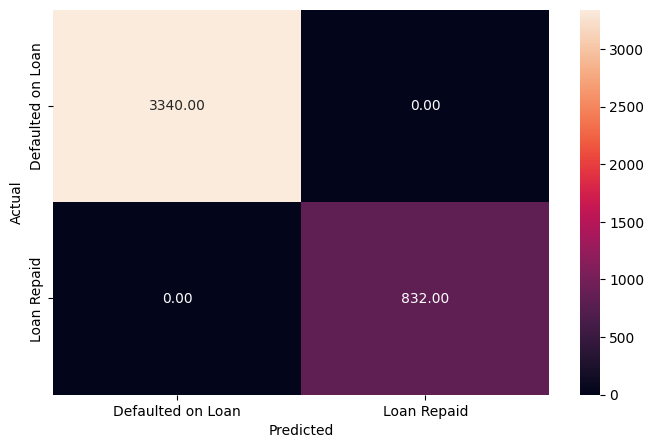

In [127]:
'''
rfc_median: This model will be trained using data imputed through the median/mode imputation method.
'''

# Predicting labels on the training data using the trained Random Forest classifier
y1_pred_train_rfc_median = rfc_median.predict(x1_train)

# Evaluating performance metrics on the training data
metrics_score(y1_train, y1_pred_train_rfc_median)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1431
           1       0.82      0.62      0.71       357

    accuracy                           0.90      1788
   macro avg       0.87      0.79      0.82      1788
weighted avg       0.89      0.90      0.89      1788



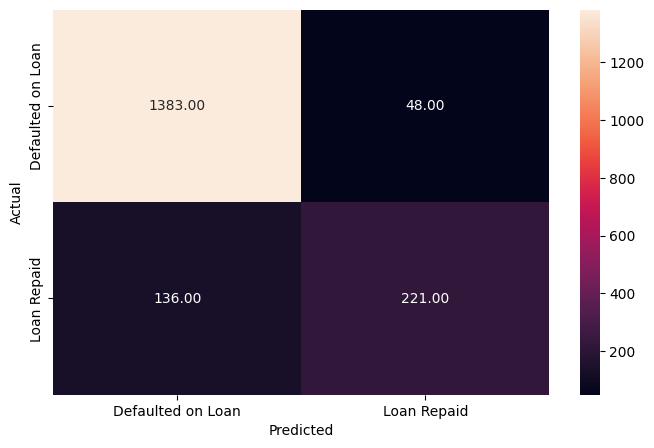

In [128]:
# Predicting labels on the testing data using the trained Random Forest classifier
y1_pred_test_rfc_median = rfc_median.predict(x1_test)

# Evaluating performance metrics on the testing data
metrics_score(y1_test, y1_pred_test_rfc_median)


In [129]:
# Assess the performance of the random forest classifier model on the test dataset
rfc_test_median = model_performance_classification(rfc_median,x1_test,y1_test)

# Display the performance metrics for the random forest classifier model on the test dataset
rfc_test_median

Precision  Recall  Accuracy
0    0.86601 0.79275   0.89709


***Observations:***

* *The Random Forest classifier **seems to be overfitting the training data**. The recall on the training data is 100%, while the recall on the test data is only  ~ 79% for class 1.*


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



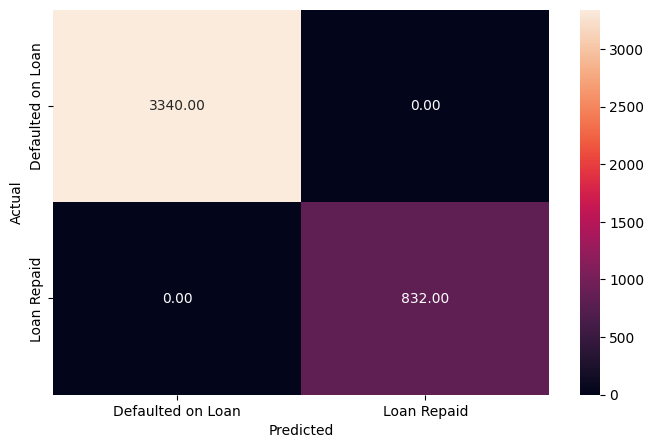

In [130]:
'''
rfc_KNN: This model will be trained using data imputed with K-NNImputer.
'''

# Predicting labels on the training data using the trained Random Forest classifier
y2_pred_train_rfc_KNN = rfc_KNN.predict(x2_train_imputed)

# Evaluating performance metrics on the training data
metrics_score(y2_train, y2_pred_train_rfc_KNN)

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1431
           1       0.98      0.42      0.59       357

    accuracy                           0.88      1788
   macro avg       0.93      0.71      0.76      1788
weighted avg       0.89      0.88      0.86      1788



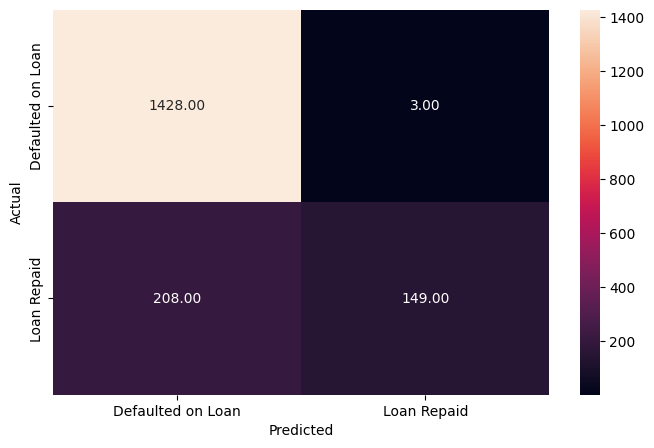

In [131]:
# Predicting labels on the testing data using the trained Random Forest classifier
y2_pred_test_rfc_KNN = rfc_KNN.predict(x2_test_imputed)

# Evaluating performance metrics on the testing data
metrics_score(y2_test, y2_pred_test_rfc_KNN)


In [132]:
# Assess the performance of the random forest classifier model on the test dataset
rfc_test_KNN = model_performance_classification(rfc_KNN,x2_test_imputed,y2_test)

# Display the performance metrics for the random forest classifier model on the test dataset
rfc_test_KNN

Precision  Recall  Accuracy
0    0.92656 0.70764   0.88199


***Observations:***

* *The Random Forest classifier appears to overfit the training data, with a perfect recall of 100%, but a lower recall of around 70% for class 1 on the test data.*
* *While the precision score on the test data is high (93%), indicating a low chance of false positives, the recall performance is not the best among the models evaluated.*

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



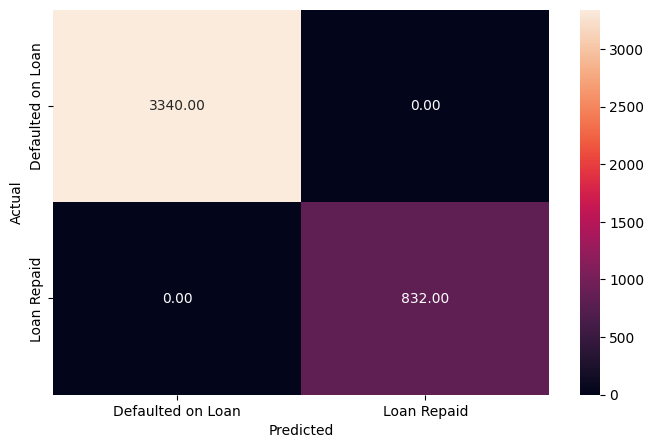

In [133]:
'''
rfc_SMOTE_median: This model will be tuned without considering the class weight hyperparameter and will be trained 
using data imputed through the median/mode imputation method.
'''

# Predicting labels on the training data using the trained Random Forest classifier
y1_pred_train_rfc_SMOTE_median = rfc_SMOTE_median.predict(x1_train)

# Evaluating performance metrics on the training data
metrics_score(y1_train, y1_pred_train_rfc_SMOTE_median)

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1431
           1       0.76      0.79      0.77       357

    accuracy                           0.91      1788
   macro avg       0.85      0.86      0.86      1788
weighted avg       0.91      0.91      0.91      1788



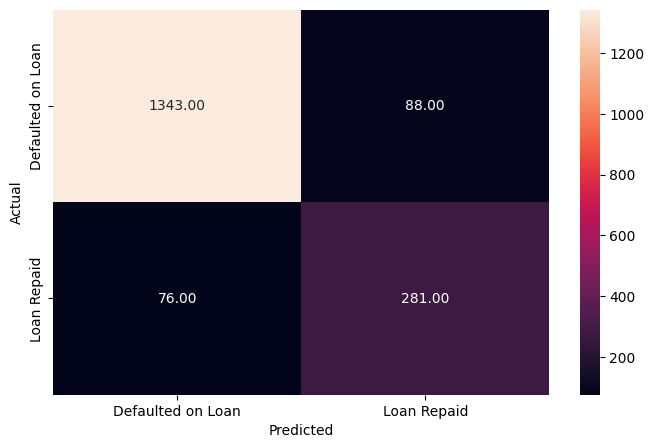

In [134]:
# Predicting labels on the testing data using the trained Random Forest classifier
y1_pred_test_rfc_SMOTE_median = rfc_SMOTE_median.predict(x1_test)

# Evaluating performance metrics on the testing data
metrics_score(y1_test, y1_pred_test_rfc_SMOTE_median)

In [135]:
# Assess the performance of the random forest classifier model on the test dataset
rfc_SMOTE_test_median = model_performance_classification(rfc_SMOTE_median,x1_test,y1_test)

# Display the performance metrics for the random forest classifier model on the test dataset
rfc_SMOTE_test_median

Precision  Recall  Accuracy
0    0.85398 0.86281   0.90828

***Observations:***

* *The Random Forest classifier **seems to be overfitting the training data**. The recall on the training data is 100%, while the recall on the test data is only  ~ 84% for class 1.*
* *The precision score of approximately 0.844 suggests that there is an 84.4% chance of correctly identifying positive cases out of all cases predicted as positive.*
* *The recall score of around 0.845 indicates that approximately 84.5% of actual positive cases were correctly identified by the model.*
* *The accuracy score of roughly 0.900 indicates that the model correctly classified approximately 90% of all cases in the dataset.*


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00      3340

    accuracy                           1.00      6680
   macro avg       1.00      1.00      1.00      6680
weighted avg       1.00      1.00      1.00      6680



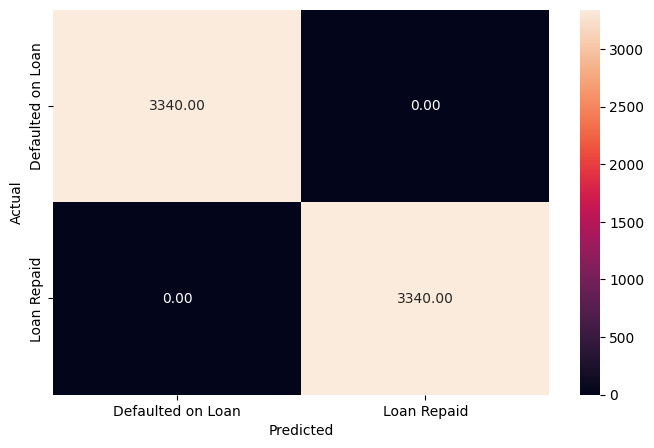

In [136]:
'''
rfc_SMOTE_KNN: This model will be tuned without considering the class weight 
hyperparameter and will be trained using data imputed with K-NNImputer.
'''

# Predicting labels on the training data using the trained Random Forest classifier
y2_pred_train_rfc_SMOTE_KNN = rfc_SMOTE_KNN.predict(x2_train_smote)

# Evaluating performance metrics on the training data
metrics_score(y2_train_smote, y2_pred_train_rfc_SMOTE_KNN)

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1431
           1       0.98      0.78      0.87      1431

    accuracy                           0.88      2862
   macro avg       0.90      0.88      0.88      2862
weighted avg       0.90      0.88      0.88      2862



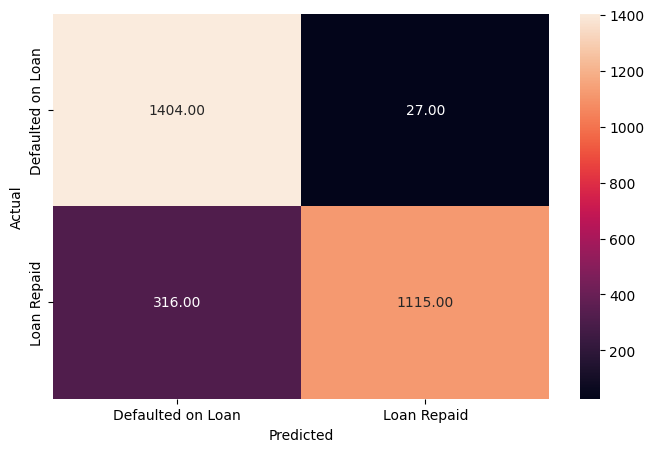

In [137]:
# Predicting labels on the testing data using the trained Random Forest classifier
y2_pred_test_rfc_SMOTE_KNN = rfc_SMOTE_KNN.predict(x2_test_smote)

# Evaluating performance metrics on the testing data
metrics_score(y2_test_smote, y2_pred_test_rfc_SMOTE_KNN)


In [138]:
# Assess the performance of the random forest classifier model on the test dataset
rfc_SMOTE_test_KNN = model_performance_classification(rfc_SMOTE_KNN,x2_test_smote,y2_test_smote)

# Display the performance metrics for the random forest classifier model on the test dataset
rfc_SMOTE_test_KNN

Precision  Recall  Accuracy
0    0.89632 0.88015   0.88015

***Observations:***

* *While the Random Forest classifier shows excellent performance on the training dataset, its effectiveness diminishes when tested on new data. Notably, the recall on the training data is perfect at 100%, but drops to approximately 88% for class 1 on the test data, indicating potential overfitting.*
* *Despite the overfitting concern, this model showcases the highest recall score among those evaluated. Its relatively lower false negatives make it a promising choice for the bank, offering a favorable balance between precision and accuracy.*


In [139]:
# Comparison of the performance of the models done so far (logistic regression models and the Decision Tree models) on the test dataset.

models_test_comp_df = pd.concat(
    [
        lg1_test_median.T,
        lg2_test_KNN.T,
        dt1_test_median.T,
        dt2_test_KNN.T,
        dt_smote_1_test_median.T,
        dt_smote_2_test_KNN.T,
        dt_estimator_median_test.T,
        dt_estimator_KNN_test.T,
        dt_estimator_SMOTE_median_test.T,
        dt_estimator_SMOTE_KNN_test.T,
        rfc_test_median.T,
        rfc_test_KNN.T,
        rfc_SMOTE_test_median.T,
        rfc_SMOTE_test_KNN.T,
        
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Original Logistic Regression with median imputer",
    "Original Logistic Regression with K-NNimputer",
    "Original Decision Tree with median imputer",
    "Original Decision Tree with K_NNimputer",
    "Original Decision Tree with median imputer & SMOTE",
    "Original Decision Tree with K-NNimputer & SMOTE",
    "Tuned Decision Tree with median imputer",
    "Tuned Decision Tree with K-NNimputer",
    "Tuned Decision Tree with median imputer & SMOTE",
    "Tuned Decision Tree with K-NNimputer & SMOTE",
    "Original Random Forest with median imputer",
    "Original Random Forest with K_NNimputer",
    "Original Random Forest with median imputer & SMOTE",
    "Original Random Forest with K-NNimputer & SMOTE",
]
print("Performance comparison on the different model done on the test dataset:")
models_test_comp_df.T

Performance comparison on the different model done on the test dataset:


Precision  Recall  \
Original Logistic Regression with median imputer      0.75181 0.53362   
Original Logistic Regression with K-NNimputer         0.73830 0.52942   
Original Decision Tree with median imputer            0.76908 0.75044   
Original Decision Tree with K_NNimputer               0.72060 0.69583   
Original Decision Tree with median imputer & SMOTE    0.78581 0.77358   
Original Decision Tree with K-NNimputer & SMOTE       0.79974 0.78931   
Tuned Decision Tree with median imputer               0.75530 0.81458   
Tuned Decision Tree with K-NNimputer                  0.64215 0.65283   
Tuned Decision Tree with median imputer & SMOTE       0.77883 0.77883   
Tuned Decision Tree with K-NNimputer & SMOTE          0.62619 0.58665   
Original Random Forest with median imputer            0.86601 0.79275   
Original Random Forest with K_NNimputer               0.92656 0.70764   
Original Random Forest with median imputer & SMOTE    0.85398 0.86281   
Original Random Forest with K-NNimputer & SMOTE       0.89632 0.88015   

                                                    Accuracy  
Original Logistic Regression with median imputer     0.80872  
Original Logistic Regression with K-NNimputer        0.80705  
Original Decision Tree with median imputer           0.85123  
Original Decision Tree with K_NNimputer              0.82271  
Original Decision Tree with median imputer & SMOTE   0.77358  
Original Decision Tree with K-NNimputer & SMOTE      0.78931  
Tuned Decision Tree with median imputer              0.83949  
Tuned Decision Tree with K-NNimputer                 0.76566  
Tuned Decision Tree with median imputer & SMOTE      0.77883  
Tuned Decision Tree with K-NNimputer & SMOTE         0.58665  
Original Random Forest with median imputer           0.89709  
Original Random Forest with K_NNimputer              0.88199  
Original Random Forest with median imputer & SMOTE   0.90828  
Original Random Forest with K-NNimputer & SMOTE      0.88015


***Observations:***

* *The last model evaluated so far, the Random Forest with K-NNimputer & SMOTE has the better performance on recall and an appropriate level of precision and accuracy. It is the top recommendation for the bank at this point.*

### **Random Forest Classifier Hyperparameter Tuning**


***Improving Model Performance with Random Forest Classifier:** Utilizing GridSearch for Hyperparameter Optimization*

*To enhance our model's accuracy, we're employing GridSearch, a technique that fine-tunes the model's parameters using cross-validation across a specified parameter grid.*

*We'll be using the following parameters with GridSearch to optimize the Random Forest Classifier:*

* ***n_estimators**: Determines the number of trees in the forest.*
* ***min_samples_split**: Specifies the minimum number of samples required to split an internal node.*
* ***min_samples_leaf**: Specifies the minimum number of samples required to be at a leaf node.*
* ***max_features{“auto”, “sqrt”, “log2”, 'None'}**: Dictates the number of features to consider when searching for the best split.*

  - *If “auto”, then max_features=sqrt(n_features).*
  - *If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).*
  - *If “log2”, then max_features=log2(n_features).*
  - *If None, then max_features=n_features.*

*Using GridSearch with these parameters helps us find the optimal configuration for our Random Forest Classifier, ultimately improving its performance.*

***We will create four Decision Tree models with tuned hyperparameters:***

1. ***`rfc_estimator_median`**: This model will be trained using data imputed through the median/mode imputation method.*
2. ***`rfc_estimator_KNN`**: This model will be trained using data imputed with K-NNImputer.*
3. ***`rfc_estimator_SMOTE_median`**: This model will be tuned without considering the class weight hyperparameter and will be trained using data imputed through the median/mode imputation method.*
4. ***`rfc_estimator_SMOTE_KNN`**: This model will be tuned without considering the class weight hyperparameter and will be trained using data imputed with K-NNImputer and SMOTE.*


In [140]:
# Choose the type of classifier
rfc_estimator_median = RandomForestClassifier(class_weight={0: 0.199, 1: 0.801}, random_state=1)

# Grid of parameters to choose from
params_rfc_median = {
    "n_estimators": [100, 250, 500],         # Number of trees in the forest
    "min_samples_leaf": np.arange(1, 4, 1),  # Minimum number of samples required to be at a leaf node
    "max_features": [0.7, 0.9, 'auto'],      # Number of features to consider when looking for the best split
}

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer_rfc_median = metrics.make_scorer(recall_score, pos_label=1)

# Run the grid search
grid_rfc_median = GridSearchCV(rfc_estimator_median, params_rfc_median, scoring=scorer_rfc_median, cv=5)  # 5-fold cross-validation

grid_rfc_median = grid_rfc_median.fit(x1_train, y1_train)

# Set the classifier to the best combination of parameters
rfc_estimator_median = grid_rfc_median.best_estimator_

# Fit the tuned random forest estimator to the data
rfc_estimator_median.fit(x1_train, y1_train)

RandomForestClassifier(class_weight={0: 0.199, 1: 0.801}, max_features=0.7,
                       min_samples_leaf=3, n_estimators=250, random_state=1)

In [141]:
# Choose the type of classifier
rfc_estimator_KNN = RandomForestClassifier(class_weight={0: 0.199, 1: 0.801}, random_state=1)

# Grid of parameters to choose from
params_rfc_KNN = {
    "n_estimators": [100, 250, 500],         # Number of trees in the forest
    "min_samples_leaf": np.arange(1, 4, 1),  # Minimum number of samples required to be at a leaf node
    "max_features": [0.7, 0.9, 'auto'],      # Number of features to consider when looking for the best split
}

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer_rfc_KNN = metrics.make_scorer(recall_score, pos_label=1)

# Run the grid search
grid_rfc_KNN = GridSearchCV(rfc_estimator_KNN, params_rfc_KNN, scoring=scorer_rfc_KNN, cv=5)  # 5-fold cross-validation

grid_rfc_KNN = grid_rfc_KNN.fit(x2_train_imputed, y2_train)

# Set the classifier to the best combination of parameters
rfc_estimator_KNN = grid_rfc_KNN.best_estimator_

# Fit the tuned random forest estimator to the data
rfc_estimator_KNN.fit(x2_train_imputed, y2_train)

RandomForestClassifier(class_weight={0: 0.199, 1: 0.801}, max_features=0.9,
                       min_samples_leaf=3, n_estimators=500, random_state=1)

In [142]:
# Choose the type of classifier
rfc_estimator_SMOTE_median = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
params_rfc_SMOTE_median = {
    "n_estimators": [100, 250, 500],         # Number of trees in the forest
    "min_samples_leaf": np.arange(1, 4, 1),  # Minimum number of samples required to be at a leaf node
    "max_features": [0.7, 0.9, 'auto'],      # Number of features to consider when looking for the best split
}

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer_rfc_SMOTE_median = metrics.make_scorer(recall_score, pos_label=1)

# Run the grid search
grid_rfc_SMOTE_median = GridSearchCV(rfc_estimator_SMOTE_median, params_rfc_SMOTE_median, scoring=scorer_rfc_SMOTE_median, cv=5)  # 5-fold cross-validation

grid_rfc_SMOTE_median = grid_rfc_SMOTE_median.fit(x1_train, y1_train)

# Set the classifier to the best combination of parameters
rfc_estimator_SMOTE_median = grid_rfc_SMOTE_median.best_estimator_

# Fit the tuned random forest estimator to the data
rfc_estimator_SMOTE_median.fit(x1_train, y1_train)

RandomForestClassifier(max_features=0.7, n_estimators=500, random_state=1)

In [143]:
# Choose the type of classifier
rfc_estimator_SMOTE_KNN = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
params_rfc_SMOTE_KNN = {
    "n_estimators": [100, 250, 500],         # Number of trees in the forest
    "min_samples_leaf": np.arange(1, 4, 1),  # Minimum number of samples required to be at a leaf node
    "max_features": [0.7, 0.9, 'auto'],      # Number of features to consider when looking for the best split
}

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer_rfc_SMOTE_KNN = metrics.make_scorer(recall_score, pos_label=1)

# Run the grid search
grid_rfc_SMOTE_KNN = GridSearchCV(rfc_estimator_SMOTE_KNN, params_rfc_SMOTE_KNN, scoring=scorer_rfc_SMOTE_KNN, cv=5)  # 5-fold cross-validation

grid_rfc_SMOTE_KNN = grid_rfc_SMOTE_KNN.fit(x2_train_smote, y2_train_smote)

# Set the classifier to the best combination of parameters
rfc_estimator_SMOTE_KNN = grid_rfc_SMOTE_KNN.best_estimator_

# Fit the tuned random forest estimator to the data
rfc_estimator_SMOTE_KNN.fit(x2_train_smote, y2_train_smote)

RandomForestClassifier(max_features=0.7, n_estimators=500, random_state=1)

**Tuned Random Forest Model Performance and Evaluations**

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      3340
           1       0.88      0.99      0.93       832

    accuracy                           0.97      4172
   macro avg       0.94      0.98      0.96      4172
weighted avg       0.97      0.97      0.97      4172



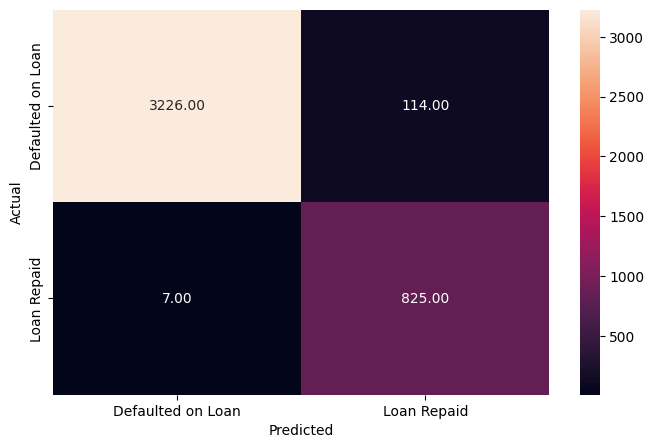

In [144]:
'''
rfc_estimator_median: This model will be trained using data imputed through the median/mode imputation method.
'''

# Assess the performance of the random forest classifier model on the training dataset
y1_train_pred_rfc_estimator_median = rfc_estimator_median.predict(x1_train)

# Display the performance metrics for the random forest classifier model on the training dataset
metrics_score(y1_train, y1_train_pred_rfc_estimator_median)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1431
           1       0.69      0.70      0.69       357

    accuracy                           0.88      1788
   macro avg       0.81      0.81      0.81      1788
weighted avg       0.88      0.88      0.88      1788



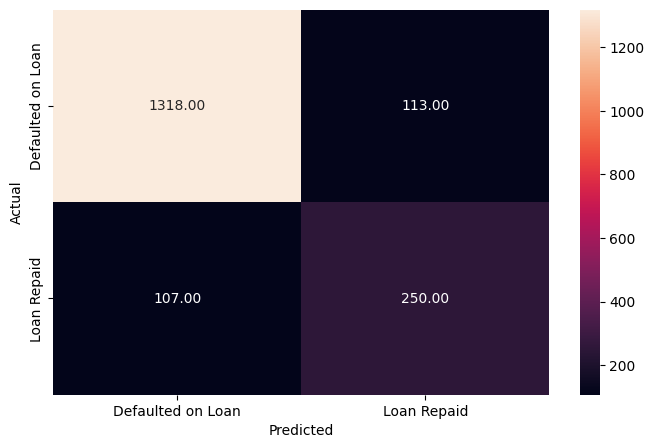

In [145]:
# Assess the performance of the random forest classifier model on the test dataset
y1_test_pred_rfc_estimator_median = rfc_estimator_median.predict(x1_test)

# Display the performance metrics for the random forest classifier model on the test dataset
metrics_score(y1_test, y1_test_pred_rfc_estimator_median)

In [146]:
# Assess the performance of the random forest classifier model on the test dataset
rfc_estimator_median_test = model_performance_classification(rfc_estimator_median,x1_test,y1_test)

# Display the performance metrics for the random forest classifier model on the test dataset
rfc_estimator_median_test

Precision  Recall  Accuracy
0    0.80681 0.81066   0.87696

***Observations:***

* *The Decision Tree performs quite well on the training dataset, but its effectiveness decreases when applied to the testing data. Nonetheless, there is no evidence of overfitting.*


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       0.99      1.00      0.99       832

    accuracy                           1.00      4172
   macro avg       0.99      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



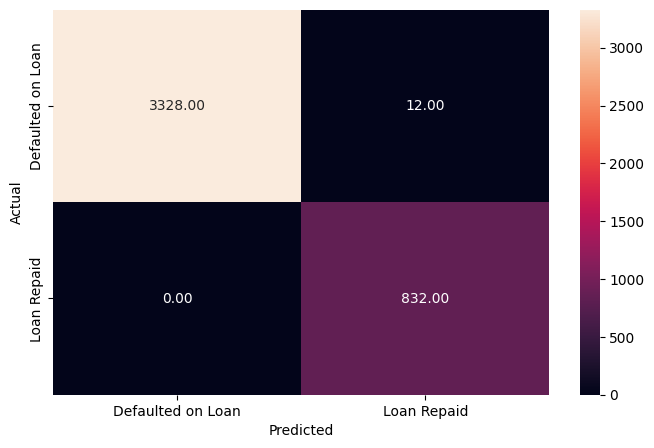

In [147]:
'''
rfc_estimator_KNN: This model will be trained using data imputed with K-NNImputer.
'''

# Assess the performance of the random forest classifier model on the training dataset
y2_train_pred_rfc_estimator_KNN = rfc_estimator_KNN.predict(x2_train_imputed)

# Display the performance metrics for the random forest classifier model on the training dataset
metrics_score(y2_train, y2_train_pred_rfc_estimator_KNN)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1431
           1       0.88      0.51      0.65       357

    accuracy                           0.89      1788
   macro avg       0.88      0.75      0.79      1788
weighted avg       0.89      0.89      0.88      1788



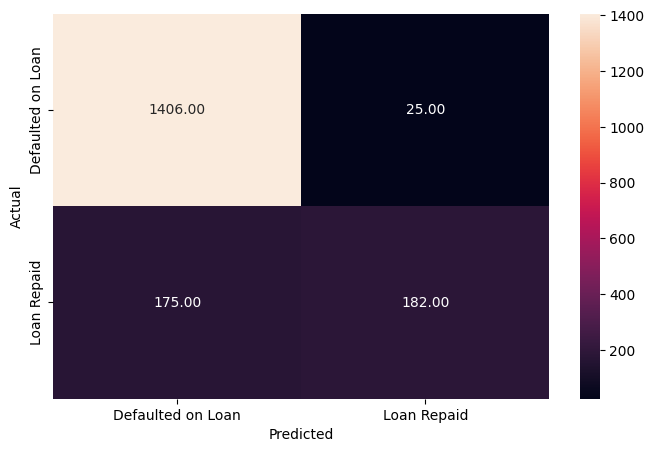

In [148]:
# Assess the performance of the random forest classifier model on the test dataset
y2_test_pred_rfc_estimator_KNN = rfc_estimator_KNN.predict(x2_test_imputed)

# Display the performance metrics for the random forest classifier model on the test dataset
metrics_score(y2_test, y2_test_pred_rfc_estimator_KNN)

In [149]:
# Assess the performance of the random forest classifier model on the test dataset
rfc_estimator_KNN_test = model_performance_classification(rfc_estimator_KNN,x2_test_imputed,y2_test)

# Display the performance metrics for the random forest classifier model on the test dataset
rfc_estimator_KNN_test

Precision  Recall  Accuracy
0    0.88427 0.74617   0.88814

***Observations:***

* *The Decision Tree performs quite well on the training dataset, but its effectiveness decreases when applied to the testing data. The model seems to be overfitting on the training data.*


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



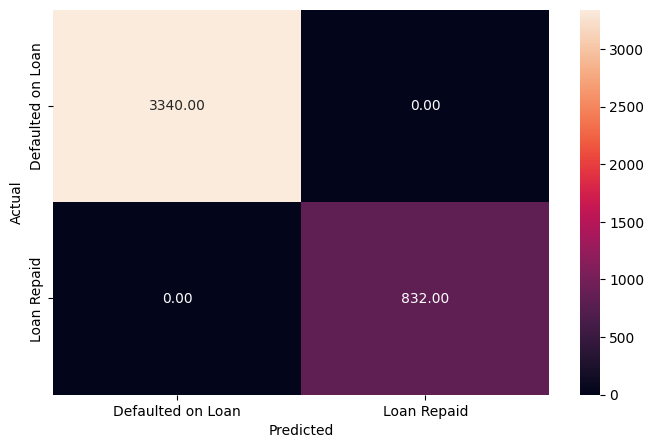

In [150]:
'''
rfc_estimator_SMOTE_median: This model will be tuned without considering the class weight hyperparameter and will be trained 
using data imputed through the median/mode imputation method.
'''

# Assess the performance of the random forest classifier model on the training dataset
y1_train_pred_rfc_estimator_SMOTE_median = rfc_estimator_SMOTE_median.predict(x1_train)

# Display the performance metrics for the random forest classifier model on the training dataset
metrics_score(y1_train, y1_train_pred_rfc_estimator_SMOTE_median)

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      1431
           1       0.74      0.64      0.69       357

    accuracy                           0.88      1788
   macro avg       0.83      0.79      0.81      1788
weighted avg       0.88      0.88      0.88      1788



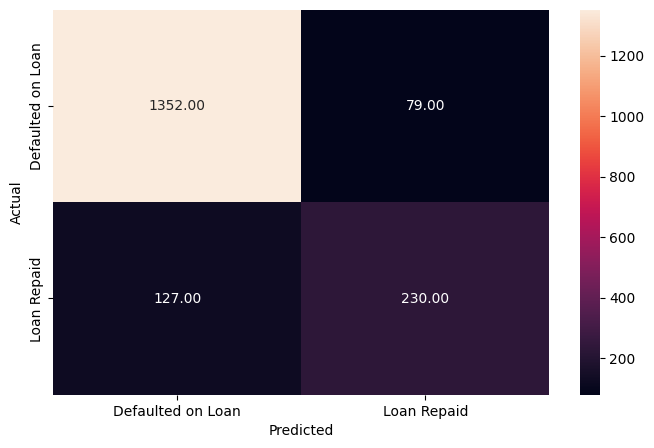

In [151]:
# Assess the performance of the random forest classifier model on the test dataset
y1_test_pred_rfc_estimator_SMOTE_median = rfc_estimator_SMOTE_median.predict(x1_test)

# Display the performance metrics for the random forest classifier model on the test dataset
metrics_score(y1_test, y1_test_pred_rfc_estimator_SMOTE_median)

In [152]:
# Assess the performance of the random forest classifier model on the test dataset
rfc_estimator_SMOTE_median_test = model_performance_classification(rfc_estimator_SMOTE_median,x1_test,y1_test)

# Display the performance metrics for the random forest classifier model on the test dataset
rfc_estimator_SMOTE_median_test

Precision  Recall  Accuracy
0    0.82923 0.79453   0.88479

***Observations:***

* *The Decision Tree performs quite well on the training dataset, but its effectiveness decreases when applied to the testing data. The model seems to be overfitting on the training data.*

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00      3340

    accuracy                           1.00      6680
   macro avg       1.00      1.00      1.00      6680
weighted avg       1.00      1.00      1.00      6680



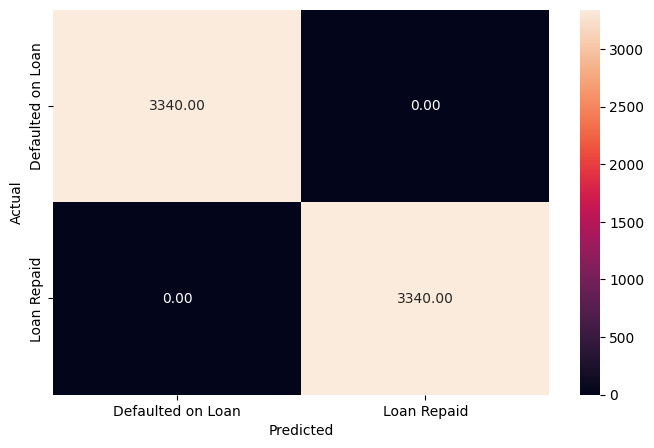

In [153]:
'''
rfc_estimator_SMOTE_KNN: This model will be tuned without considering the class weight hyperparameter 
and will be trained using data imputed with K-NNImputer and SMOTE.
'''

# Assess the performance of the random forest classifier model on the training dataset
y2_train_pred_rfc_estimator_SMOTE_KNN = rfc_estimator_SMOTE_KNN.predict(x2_train_smote)

# Display the performance metrics for the random forest classifier model on the training dataset
metrics_score(y2_train_smote, y2_train_pred_rfc_estimator_SMOTE_KNN)

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1431
           1       0.97      0.79      0.87      1431

    accuracy                           0.88      2862
   macro avg       0.90      0.88      0.88      2862
weighted avg       0.90      0.88      0.88      2862



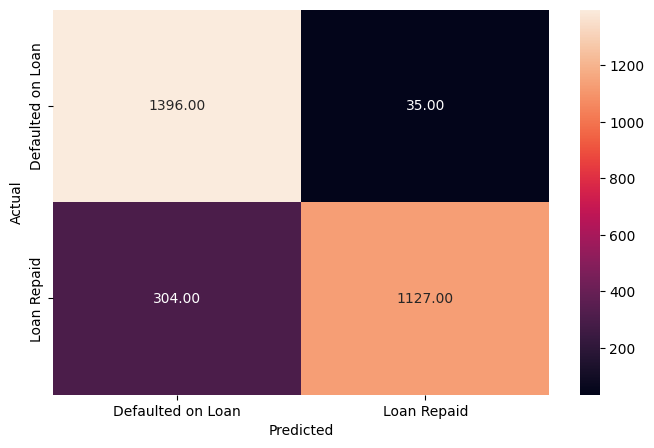

In [154]:
# Assess the performance of the random forest classifier model on the test dataset
y2_test_pred_rfc_estimator_SMOTE_KNN = rfc_estimator_SMOTE_KNN.predict(x2_test_smote)

# Display the performance metrics for the random forest classifier model on the test dataset
metrics_score(y2_test_smote, y2_test_pred_rfc_estimator_SMOTE_KNN)

In [155]:
# Assess the performance of the random forest classifier model on the test dataset
rfc_estimator_SMOTE_KNN_test = model_performance_classification(rfc_estimator_SMOTE_KNN,x2_test_smote,y2_test_smote)

# Display the performance metrics for the random forest classifier model on the test dataset
rfc_estimator_SMOTE_KNN_test

Precision  Recall  Accuracy
0    0.89553 0.88155   0.88155

***Observations:***

* *The Random Forest model seems to be overfitting. It performs very well on the training dataset but its performance declines on the test dataset.*
* *It has the best recall score of all models evaluated.*
* *The bank will benefit from using this model to predict if a client will default on loans. It has the fewest false negative cases so far.*
* *The Random Forest model shows signs of overfitting, excelling on the training dataset but showing a decrease in performance when applied to the test dataset. This discrepancy suggests that the model may have memorized the training data rather than learning generalizable patterns.*
* *Despite the overfitting concern, this model boasts the best recall score among all models evaluated so far. Recall, in this context, signifies the model's ability to correctly identify instances of clients who defaulted on loans, which is a crucial metric for the bank's risk assessment.*
* *Given its superior performance in detecting instances of default, this model is highly valuable for the bank's loan prediction tasks. Its ability to minimize false negatives, indicating cases where the model incorrectly predicts that a client will repay the loan when they actually default, enhances the bank's decision-making process.*



In [156]:
# Comparison of the performance of the models done so far (logistic regression models and the Decision Tree models) on the test dataset.

models_test_comp_df = pd.concat(
    [
        lg1_test_median.T,
        lg2_test_KNN.T,
        dt1_test_median.T,
        dt2_test_KNN.T,
        dt_smote_1_test_median.T,
        dt_smote_2_test_KNN.T,
        dt_estimator_median_test.T,
        dt_estimator_KNN_test.T,
        dt_estimator_SMOTE_median_test.T,
        dt_estimator_SMOTE_KNN_test.T,
        rfc_test_median.T,
        rfc_test_KNN.T,
        rfc_SMOTE_test_median.T,
        rfc_SMOTE_test_KNN.T,
        rfc_estimator_median_test.T,
        rfc_estimator_KNN_test.T,
        rfc_estimator_SMOTE_median_test.T,
        rfc_estimator_SMOTE_KNN_test.T
        
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Original Logistic Regression with median imputer",
    "Original Logistic Regression with K-NNimputer",
    "Original Decision Tree with median imputer",
    "Original Decision Tree with K-NNimputer",
    "Original Decision Tree with median imputer & SMOTE",
    "Original Decision Tree with K-NNimputer & SMOTE",
    "Tuned Decision Tree with median imputer",
    "Tuned Decision Tree with K-NNimputer",
    "Tuned Decision Tree with median imputer & SMOTE",
    "Tuned Decision Tree with K-NNimputer & SMOTE",
    "Original Random Forest with median imputer",
    "Original Random Forest with K-NNimputer",
    "Original Random Forest with median imputer & SMOTE",
    "Original Random Forest with K-NNimputer & SMOTE",
    "Tuned Random Forest with median imputer",
    "Tuned Random Forest with K-NNimputer",
    "Tuned Random Forest with median imputer & SMOTE",
    "Tuned Random Forest with K-NNimputer & SMOTE"
    
    
]
print("Performance comparison on the different model done on the test dataset:")
models_test_comp_df.T

Performance comparison on the different model done on the test dataset:


Precision  Recall  \
Original Logistic Regression with median imputer      0.75181 0.53362   
Original Logistic Regression with K-NNimputer         0.73830 0.52942   
Original Decision Tree with median imputer            0.76908 0.75044   
Original Decision Tree with K-NNimputer               0.72060 0.69583   
Original Decision Tree with median imputer & SMOTE    0.78581 0.77358   
Original Decision Tree with K-NNimputer & SMOTE       0.79974 0.78931   
Tuned Decision Tree with median imputer               0.75530 0.81458   
Tuned Decision Tree with K-NNimputer                  0.64215 0.65283   
Tuned Decision Tree with median imputer & SMOTE       0.77883 0.77883   
Tuned Decision Tree with K-NNimputer & SMOTE          0.62619 0.58665   
Original Random Forest with median imputer            0.86601 0.79275   
Original Random Forest with K-NNimputer               0.92656 0.70764   
Original Random Forest with median imputer & SMOTE    0.85398 0.86281   
Original Random Forest with K-NNimputer & SMOTE       0.89632 0.88015   
Tuned Random Forest with median imputer               0.80681 0.81066   
Tuned Random Forest with K-NNimputer                  0.88427 0.74617   
Tuned Random Forest with median imputer & SMOTE       0.82923 0.79453   
Tuned Random Forest with K-NNimputer & SMOTE          0.89553 0.88155   

                                                    Accuracy  
Original Logistic Regression with median imputer     0.80872  
Original Logistic Regression with K-NNimputer        0.80705  
Original Decision Tree with median imputer           0.85123  
Original Decision Tree with K-NNimputer              0.82271  
Original Decision Tree with median imputer & SMOTE   0.77358  
Original Decision Tree with K-NNimputer & SMOTE      0.78931  
Tuned Decision Tree with median imputer              0.83949  
Tuned Decision Tree with K-NNimputer                 0.76566  
Tuned Decision Tree with median imputer & SMOTE      0.77883  
Tuned Decision Tree with K-NNimputer & SMOTE         0.58665  
Original Random Forest with median imputer           0.89709  
Original Random Forest with K-NNimputer              0.88199  
Original Random Forest with median imputer & SMOTE   0.90828  
Original Random Forest with K-NNimputer & SMOTE      0.88015  
Tuned Random Forest with median imputer              0.87696  
Tuned Random Forest with K-NNimputer                 0.88814  
Tuned Random Forest with median imputer & SMOTE      0.88479  
Tuned Random Forest with K-NNimputer & SMOTE         0.88155

**Observations:***

* *The Original Random Forest with K-NNimputer & SMOTE and the Tuned Random Forest with K-NNimputer & SMOTE have the best precision, recall, and accuracy scores respectively (0.89632, 0.88015, and 0.88015) and (0.89553, 0.88155, and 0.88155), at this point*

**Next step: Let's examine the feature importance of the best models.**

<Axes: xlabel='Importance', ylabel='None'>

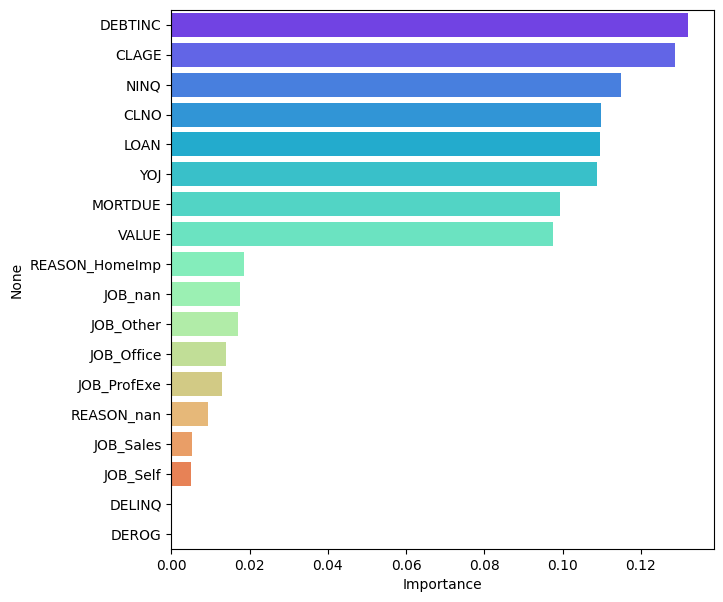

In [157]:
'''
Plot the feature importance of the Original Random Forest with K-NNimputer & SMOTE model
'''

# Get feature importances from the decision tree model
importances = rfc_SMOTE_KNN.feature_importances_

# Get column names of the features
columns = X2.columns

# Create a DataFrame to store feature importances and sort them
importance_rfc_SMOTE_KNN = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

# Set up the figure size
plt.figure(figsize=(7, 7))

# Define custom colors for the bar plot with gradient
color_palette = sns.color_palette("rainbow", len(importance_rfc_SMOTE_KNN))

# Plot bar plot with gradient colors
sns.barplot(x=importance_rfc_SMOTE_KNN.Importance, y=importance_rfc_SMOTE_KNN.index, palette=color_palette)

***Observations:***

* *The analysis of the important features of the Random Forest with K-NNimputer & SMOTE model highlights the Debt-to-income ratio (*DEBTINC*) as the most crucial feature, followed by the Age of the oldest credit line in months (*CLAGE*), the number of recent credit inquiries (*NINQ:*), the number of existing credit lines (*CLNO:*), the amount of loan approved (*LOAN*), the number of years at the present job (*YOJ*), the amount due on the existing mortgage (*MORTDUE*), the current value of the property (*VALUE*), and the reason for the loan request that is home improvement.*  

<Axes: xlabel='Importance', ylabel='None'>

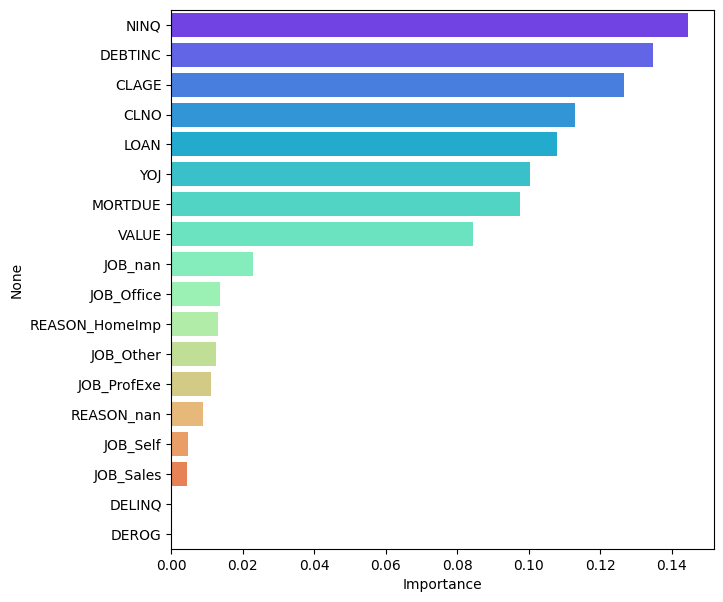

In [158]:
'''
Plot the feature importance of the Tuned Random Forest with K-NNimputer & SMOTE
'''

# Get feature importances from the decision tree model
importances = rfc_estimator_SMOTE_KNN.feature_importances_

# Get column names of the features
columns = X2.columns

# Create a DataFrame to store feature importances and sort them
importance_rfc_estimator_SMOTE_KNN = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

# Set up the figure size
plt.figure(figsize=(7, 7))

# Define custom colors for the bar plot with rainbow gradient
color_palette = sns.color_palette("rainbow", len(importance_rfc_estimator_SMOTE_KNN))

# Plot bar plot with rainbow gradient colors
sns.barplot(x=importance_rfc_estimator_SMOTE_KNN.Importance, y=importance_rfc_estimator_SMOTE_KNN.index, palette=color_palette)
  

***Observations:***

* *The analysis of the important features of the Random Forest with K-NNimputer & SMOTE model highlights the number of recent credit inquiries (*NINQ:*) as the most crucial feature, followed by the Debt-to-income ratio (*DEBTINC*), the Age of the oldest credit line in months (*CLAGE*), the number of existing credit lines (*CLNO:*), the amount of loan approved (*LOAN*), the number of years at the present job (*YOJ*), the amount due on the existing mortgage (*MORTDUE*), the current value of the property (*VALUE*), and the missing values in the feature type of job that loan applicant has.* 

## **Building a XGBoost Classifier model**

***XGBoost (Extreme Gradient Boosting)** is an ensemble learning technique that is particularly powerful for structured/tabular data. It is a tree-based ensemble machine learning technique that improves prediction power and performance by improvising on the Gradient Boosting framework and incorporating reliable approximation algorithms.*

*Here's how it works:*

* ***Gradient Boosting:** XGBoost builds a series of decision trees sequentially, each one aiming to correct the errors made by the previous tree.*
* ***Objective Function:** It optimizes a predefined objective function, typically focusing on reducing the loss or error of the model.*
* ***Regularization:** XGBoost includes regularization techniques to prevent overfittings, such as shrinkage (learning rate) and tree pruning.*
* ***Feature Importance:** It provides a measure of feature importance, highlighting which features contribute the most to the model's predictive performance.*

***In summary, XGBoost combines the predictions from multiple weak learners (decision trees) to create a strong learner, achieving state-of-the-art performance in many machine learning tasks. It's widely used in various applications due to its efficiency, scalability, and high predictive accuracy.***

***We will create four XGBoost Classifier models with tuned hyperparameters:***

1. ***`xgb_median`**: This model will be trained using data imputed through the median/mode imputation method.*
2. ***`xgb_KNN`**: This model will be trained using data imputed with K-NNImputer.*
3. ***`xgb_SMOTE_median`**: This model will be tuned without considering the class weight hyperparameter and will be trained using data imputed through the median/mode imputation method.*
4. ***`xgb_SMOTE_KNN`**: This model will be tuned without considering the class weight hyperparameter and will be trained using data imputed with K-NNImputer and SMOTE.*

In [159]:
# Importing the XGBClassifier from the xgboost library
from xgboost import XGBClassifier

# Creating a XGBoost Classifier object with specified objective function (eval_metric) and random state
xgb_median = XGBClassifier(random_state = 1, eval_metric = 'logloss')


# Fitting the XGBoost Classifier classifier to the training data
xgb_median.fit(x1_train,y1_train.astype('int'))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [160]:
# Creating a XGBoost Classifier object with specified objective function (eval_metric) and random state
xgb_KNN = XGBClassifier(random_state = 1, eval_metric = 'logloss')

# Fitting the XGBoost Classifier classifier to the training data
xgb_KNN.fit(x2_train_imputed,y2_train.astype('int'))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [161]:
# Creating a XGBoost Classifier object with specified objective function (eval_metric) and random state
xgb_SMOTE_median = XGBClassifier(random_state = 1, eval_metric = 'logloss')

# Fitting the XGBoost Classifier classifier to the training data
xgb_SMOTE_median.fit(x1_train_smote,y1_train_smote.astype('int'))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [162]:
# Creating a XGBoost Classifier object with specified objective function (eval_metric) and random state
xgb_SMOTE_KNN = XGBClassifier(random_state = 1, eval_metric = 'logloss')

# Fitting the XGBoost Classifier classifier to the training data
xgb_SMOTE_KNN.fit(x2_train_smote,y2_train_smote.astype('int'))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

**XGBoost Model Performance and Evaluations**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



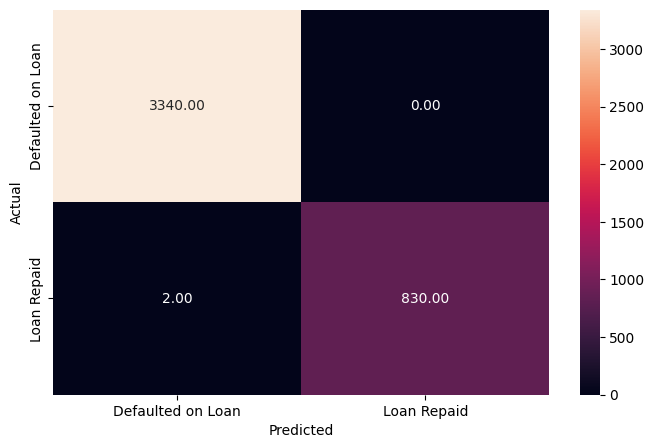

In [163]:
'''
xgb_median: This model will be trained using data imputed through the median/mode imputation method.
'''

# Assess the performance of the XGBoost Classifier model on the training dataset
y1_train_pred_xgb_median = xgb_median.predict(x1_train)

# Display the performance metrics for XGBoost Classifier model on the training dataset
metrics_score(y1_train, y1_train_pred_xgb_median)

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      1431
           1       0.81      0.62      0.70       357

    accuracy                           0.90      1788
   macro avg       0.86      0.79      0.82      1788
weighted avg       0.89      0.90      0.89      1788



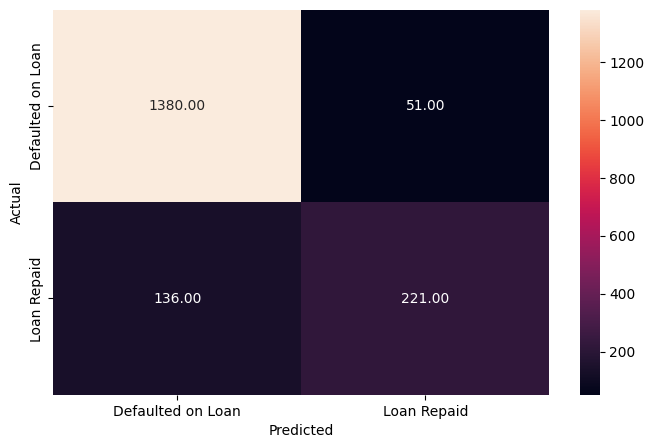

In [164]:
# Assess the performance of the XGBoost Classifier model on the test dataset
y1_test_pred_xgb_median = xgb_median.predict(x1_test)

# Display the performance metrics for XGBoost Classifier model on the test dataset
metrics_score(y1_test, y1_test_pred_xgb_median)

In [165]:
# Model Performance on the test data
xgb_median_test = model_performance_classification(xgb_median,x1_test,y1_test)

# Display the performance metrics for the XGBoost classifier model on the test dataset
xgb_median_test

Precision  Recall  Accuracy
0    0.86140 0.79170   0.89541

***Observations:***

*The model exhibits high performance metrics when evaluated on the training dataset. However, when tested on the testing dataset, its performance notably declines. This phenomenon strongly suggests that the model may be overfitting the training data.*


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      0.99      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



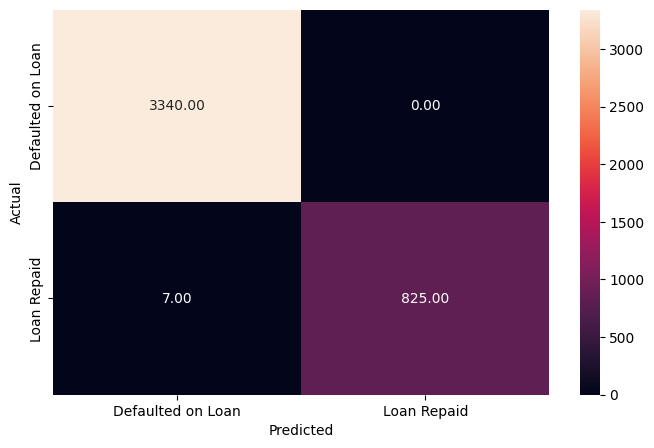

In [166]:
'''
xgb_KNN: This model will be trained using data imputed with K-NNImputer.
'''

# Assess the performance of the XGBoost Classifier model on the training dataset
y2_train_pred_xgb_KNN = xgb_KNN.predict(x2_train_imputed)

# Display the performance metrics for XGBoost Classifier model on the training dataset
metrics_score(y2_train, y2_train_pred_xgb_KNN)

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1431
           1       0.92      0.51      0.66       357

    accuracy                           0.89      1788
   macro avg       0.90      0.75      0.80      1788
weighted avg       0.90      0.89      0.88      1788



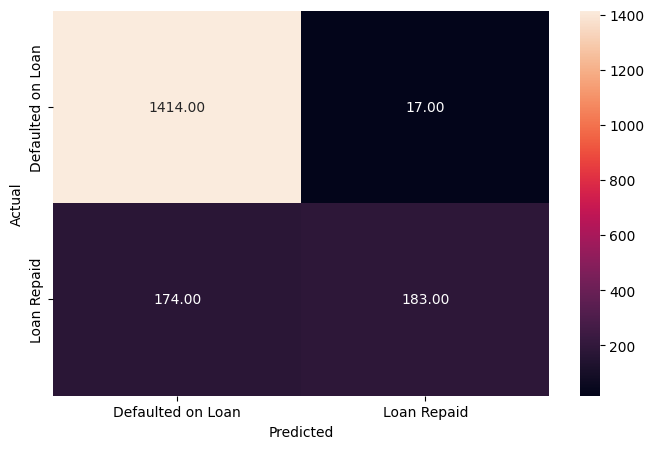

In [167]:
# Assess the performance of the XGBoost Classifier model on the test dataset
y2_test_pred_xgb_KNN = xgb_KNN.predict(x2_test_imputed)

# Display the performance metrics for XGBoost Classifier model on the test dataset
metrics_score(y2_test, y2_test_pred_xgb_KNN)

In [168]:
# Model Performance on the test data
xgb_KNN_test = model_performance_classification(xgb_KNN,x2_test_imputed,y2_test)

# Display the performance metrics for the XGBoost classifier model on the test dataset
xgb_KNN_test

Precision  Recall  Accuracy
0    0.90271 0.75036   0.89318


***Observations:***

*The model exhibits high performance metrics when evaluated on the training dataset. However, when tested on the testing dataset, its performance notably declines. This phenomenon strongly suggests that the model may be overfitting the training data.*


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00      3340

    accuracy                           1.00      6680
   macro avg       1.00      1.00      1.00      6680
weighted avg       1.00      1.00      1.00      6680



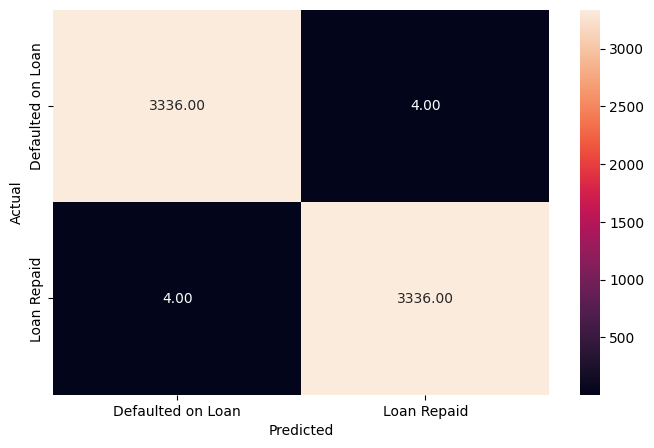

In [169]:
'''
xgb_SMOTE_median: This model will be tuned without considering the class weight hyperparameter 
and will be trained using data imputed through the median/mode imputation method.
'''

# Assess the performance of the XGBoost Classifier model on the training dataset
y1_train_pred_xgb_SMOTE_median = xgb_SMOTE_median.predict(x1_train_smote)

# Display the performance metrics for XGBoost Classifier model on the training dataset
metrics_score(y1_train_smote, y1_train_pred_xgb_SMOTE_median)

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1431
           1       0.95      0.83      0.89      1431

    accuracy                           0.89      2862
   macro avg       0.90      0.89      0.89      2862
weighted avg       0.90      0.89      0.89      2862



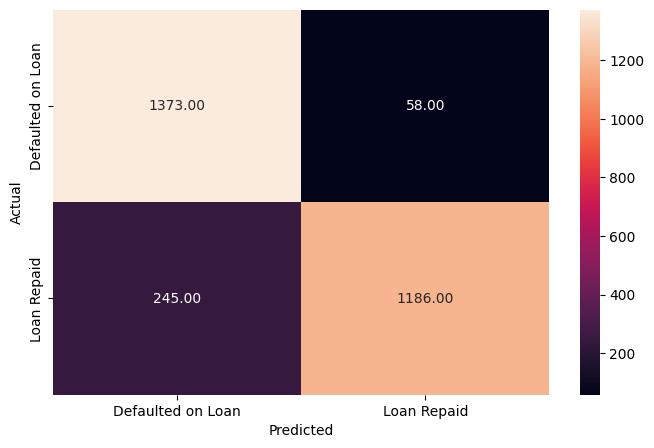

In [170]:
# Assess the performance of the XGBoost Classifier model on the test dataset
y1_test_pred_xgb_SMOTE_median = xgb_SMOTE_median.predict(x1_test_smote)

# Display the performance metrics for XGBoost Classifier model on the test dataset
metrics_score(y1_test_smote, y1_test_pred_xgb_SMOTE_median)

In [171]:
# Model Performance on the test data
xgb_SMOTE_median_test = model_performance_classification(xgb_SMOTE_median,x1_test_smote,y1_test_smote)

# Display the performance metrics for the XGBoost classifier model on the test dataset
xgb_SMOTE_median_test

Precision  Recall  Accuracy
0    0.90098 0.89413   0.89413


***Observations:***

*The model exhibits high-performance metrics when evaluated on the training dataset. However, when tested on the testing dataset, its performance notably declines. This phenomenon strongly suggests that the model may be overfitting the training data.*

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00      3340

    accuracy                           1.00      6680
   macro avg       1.00      1.00      1.00      6680
weighted avg       1.00      1.00      1.00      6680



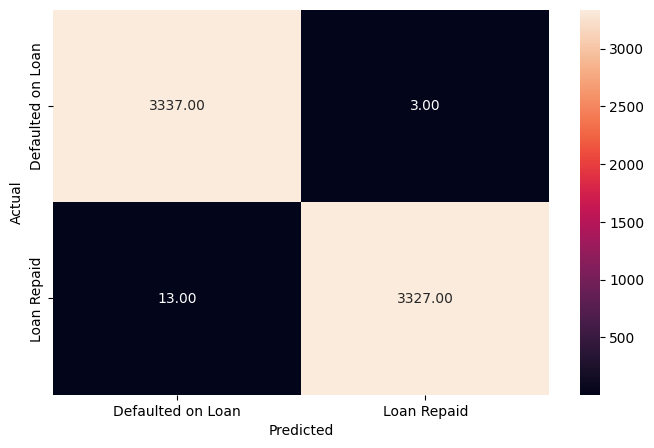

In [172]:
'''
xgb_SMOTE_KNN: This model will be tuned without considering the class weight hyperparameter 
and will be trained using data imputed with K-NNImputer and SMOTE.
'''

# Assess the performance of the XGBoost Classifier model on the training dataset
y2_train_pred_xgb_SMOTE_KNN = xgb_SMOTE_KNN.predict(x2_train_smote)

# Display the performance metrics for XGBoost Classifier model on the training dataset
metrics_score(y2_train_smote, y2_train_pred_xgb_SMOTE_KNN)

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1431
           1       0.98      0.83      0.90      1431

    accuracy                           0.91      2862
   macro avg       0.91      0.91      0.91      2862
weighted avg       0.91      0.91      0.91      2862



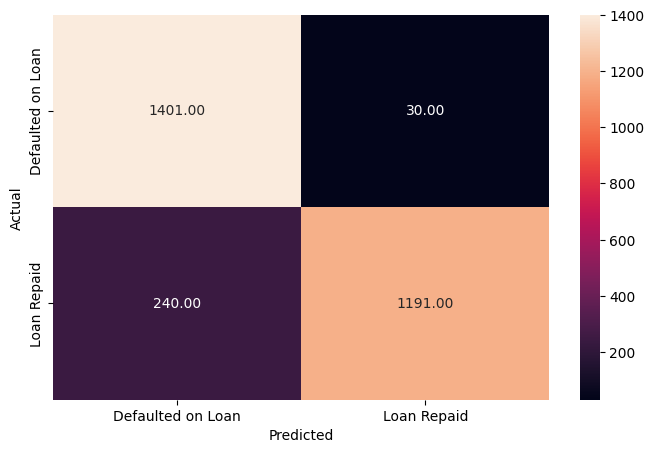

In [173]:
# Assess the performance of the XGBoost Classifier model on the test dataset
y2_test_pred_xgb_SMOTE_KNN = xgb_SMOTE_KNN.predict(x2_test_smote)

# Display the performance metrics for XGBoost Classifier model on the test dataset
metrics_score(y2_test_smote, y2_test_pred_xgb_SMOTE_KNN)

In [174]:
# Model Performance on the test data
xgb_SMOTE_KNN_test = model_performance_classification(xgb_SMOTE_KNN,x2_test_smote,y2_test_smote)

# Display the performance metrics for the XGBoost classifier model on the test dataset
xgb_SMOTE_KNN_test

Precision  Recall  Accuracy
0    0.91459 0.90566   0.90566


***Observations:***

* *The model performs exceptionally well when trained on the dataset, but its performance drops significantly when tested on a separate dataset. This suggests potential overfitting of the model to the training data.*
* *Despite concerns about overfitting, this model stands out as the top choice. It achieves the highest recall score compared to other models assessed.*
* *Recall, in this context, reflects the model's accuracy in identifying clients who default on loans, a critical factor for the bank's risk evaluation.*


In [175]:
# Comparison of the performance of the models done so far (logistic regression models and the Decision Tree models) on the test dataset.

models_test_comp_df = pd.concat(
    [
        lg1_test_median.T,
        lg2_test_KNN.T,
        dt1_test_median.T,
        dt2_test_KNN.T,
        dt_smote_1_test_median.T,
        dt_smote_2_test_KNN.T,
        dt_estimator_median_test.T,
        dt_estimator_KNN_test.T,
        dt_estimator_SMOTE_median_test.T,
        dt_estimator_SMOTE_KNN_test.T,
        rfc_test_median.T,
        rfc_test_KNN.T,
        rfc_SMOTE_test_median.T,
        rfc_SMOTE_test_KNN.T,
        rfc_estimator_median_test.T,
        rfc_estimator_KNN_test.T,
        rfc_estimator_SMOTE_median_test.T,
        rfc_estimator_SMOTE_KNN_test.T,
        xgb_median_test.T,
        xgb_KNN_test.T,
        xgb_SMOTE_median_test.T,
        xgb_SMOTE_KNN_test.T,     
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Original Logistic Regression with median imputer",
    "Original Logistic Regression with K-NNimputer",
    "Original Decision Tree with median imputer",
    "Original Decision Tree with K-NNimputer",
    "Original Decision Tree with median imputer & SMOTE",
    "Original Decision Tree with K-NNimputer & SMOTE",
    "Tuned Decision Tree with median imputer",
    "Tuned Decision Tree with K-NNimputer",
    "Tuned Decision Tree with median imputer & SMOTE",
    "Tuned Decision Tree with K-NNimputer & SMOTE",
    "Original Random Forest with median imputer",
    "Original Random Forest with K-NNimputer",
    "Original Random Forest with median imputer & SMOTE",
    "Original Random Forest with K-NNimputer & SMOTE",
    "Tuned Random Forest with median imputer",
    "Tuned Random Forest with K-NNimputer",
    "Tuned Random Forest with median imputer & SMOTE",
    "Tuned Random Forest with K-NNimputer & SMOTE",
    "Original XGBoost with median imputer",
    "Original XGBoost with K-NNimputer",
    "Original XGBoost with median imputer & SMOTE",
    "Original XGBoost with K-NNimputer & SMOTE"
    
]
print("Performance comparison on the different model done on the test dataset:")
models_test_comp_df.T

Performance comparison on the different model done on the test dataset:


Precision  Recall  \
Original Logistic Regression with median imputer      0.75181 0.53362   
Original Logistic Regression with K-NNimputer         0.73830 0.52942   
Original Decision Tree with median imputer            0.76908 0.75044   
Original Decision Tree with K-NNimputer               0.72060 0.69583   
Original Decision Tree with median imputer & SMOTE    0.78581 0.77358   
Original Decision Tree with K-NNimputer & SMOTE       0.79974 0.78931   
Tuned Decision Tree with median imputer               0.75530 0.81458   
Tuned Decision Tree with K-NNimputer                  0.64215 0.65283   
Tuned Decision Tree with median imputer & SMOTE       0.77883 0.77883   
Tuned Decision Tree with K-NNimputer & SMOTE          0.62619 0.58665   
Original Random Forest with median imputer            0.86601 0.79275   
Original Random Forest with K-NNimputer               0.92656 0.70764   
Original Random Forest with median imputer & SMOTE    0.85398 0.86281   
Original Random Forest with K-NNimputer & SMOTE       0.89632 0.88015   
Tuned Random Forest with median imputer               0.80681 0.81066   
Tuned Random Forest with K-NNimputer                  0.88427 0.74617   
Tuned Random Forest with median imputer & SMOTE       0.82923 0.79453   
Tuned Random Forest with K-NNimputer & SMOTE          0.89553 0.88155   
Original XGBoost with median imputer                  0.86140 0.79170   
Original XGBoost with K-NNimputer                     0.90271 0.75036   
Original XGBoost with median imputer & SMOTE          0.90098 0.89413   
Original XGBoost with K-NNimputer & SMOTE             0.91459 0.90566   

                                                    Accuracy  
Original Logistic Regression with median imputer     0.80872  
Original Logistic Regression with K-NNimputer        0.80705  
Original Decision Tree with median imputer           0.85123  
Original Decision Tree with K-NNimputer              0.82271  
Original Decision Tree with median imputer & SMOTE   0.77358  
Original Decision Tree with K-NNimputer & SMOTE      0.78931  
Tuned Decision Tree with median imputer              0.83949  
Tuned Decision Tree with K-NNimputer                 0.76566  
Tuned Decision Tree with median imputer & SMOTE      0.77883  
Tuned Decision Tree with K-NNimputer & SMOTE         0.58665  
Original Random Forest with median imputer           0.89709  
Original Random Forest with K-NNimputer              0.88199  
Original Random Forest with median imputer & SMOTE   0.90828  
Original Random Forest with K-NNimputer & SMOTE      0.88015  
Tuned Random Forest with median imputer              0.87696  
Tuned Random Forest with K-NNimputer                 0.88814  
Tuned Random Forest with median imputer & SMOTE      0.88479  
Tuned Random Forest with K-NNimputer & SMOTE         0.88155  
Original XGBoost with median imputer                 0.89541  
Original XGBoost with K-NNimputer                    0.89318  
Original XGBoost with median imputer & SMOTE         0.89413  
Original XGBoost with K-NNimputer & SMOTE            0.90566

***Observations:***

* *The Original XGBoost with median imputer & SMOTE and the Original XGBoost with K-NNimputer & SMOTE have the best precision, recall, and accuracy scores respectively (0.90098, 0.89413, and 0.89413) and (0.91459, 0.90566, and 0.90566), at this point.*



### **XGBoost Classifier Hyperparameter Tuning**


***Improving Model Performance with XGBOosting Classifier:** Utilizing GridSearch for Hyperparameter Optimization*

*We'll be using the following parameters with GridSearch to optimize the XGBoosting Classifier:*

1. *`'n_estimators'`: Number of trees in the XGBoost model. Higher values can increase model complexity and potentially overfitting but may improve performance up to a point.*

2. *`'max_depth'`: Maximum depth of each decision tree. Controls the complexity of individual trees. Deeper trees can capture more complex patterns but may lead to overfitting.*

3. *`'learning_rate'`: Step size at each iteration while moving towards minimizing the loss function. Lower values require more boosting rounds but can improve generalization.*

4. *`'scale_pos_weight'`: Helps handle class imbalance in binary classification tasks by adjusting the balance of positive and negative class weights. Higher values give more weight to the minority class, potentially improving its classification.*

*Using GridSearch with these parameters helps us find the optimal configuration for our XGBoost Classifier, ultimately improving its performance.*

***We will create four Decision Tree models with tuned hyperparameters:***

1. ***`xgb_estimator_median`**: This model will be trained using data imputed through the median/mode imputation method.*
2. ***`xgb_estimator_KNN`**: This model will be trained using data imputed with K-NNImputer.*
3. ***`xgb_estimator_SMOTE_median`**: This model will be tuned without considering the class weight hyperparameter and will be trained using data imputed through the median/mode imputation method.*
4. ***`xgb_estimator_SMOTE_KNN`**: This model will be tuned without considering the class weight hyperparameter and will be trained using data imputed with K-NNImputer and SMOTE.*

In [176]:
# Define the XGBoost classifier
xgb_estimator_median = XGBClassifier()

# Define parameter grid to search through
param_grid_estimator_median = {
    'n_estimators': [200, 300, 400, 500],
    'max_depth': [3, 4, 5, 7, 8, 9],
    'learning_rate': [0.1, 0.01, 0.001],
    'scale_pos_weight': [0.8, 0.9, 1]  # Adjusting for class imbalance
}

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer_xgb_estimator_median = metrics.make_scorer(recall_score, pos_label=1)  # Using recall as the scoring metric

# Initialize GridSearchCV
grid_search_estimator_median = GridSearchCV(estimator=xgb_estimator_median, param_grid=param_grid_estimator_median, 
                                            scoring=scorer_xgb_estimator_median, cv=5)

# Fit the GridSearchCV to the data
grid_search_estimator_median.fit(x1_train, y1_train.astype('int'))

# Print the best parameters found
print("Best parameters found: ", grid_search_estimator_median.best_params_)

# Set the classifier to the best combination of parameters
xgb_estimator_median = grid_search_estimator_median.best_estimator_

# Fit the tuned XGBoosting classifier estimator to the data
xgb_estimator_median.fit(x1_train, y1_train.astype('int'))

Best parameters found:  {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 500, 'scale_pos_weight': 1}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [177]:
# Define the XGBoost classifier
xgb_estimator_KNN = XGBClassifier()

# Define parameter grid to search through
param_grid_estimator_KNN = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'learning_rate': [0.1, 0.01, 0.001],
    'scale_pos_weight': [0.8, 0.9, 1]  # Adjusting for class imbalance
}

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer_xgb_estimator_KNN = metrics.make_scorer(recall_score, pos_label=1)  # Using recall as the scoring metric

# Initialize GridSearchCV
grid_search_estimator_KNN = GridSearchCV(estimator=xgb_estimator_KNN, param_grid=param_grid_estimator_KNN, 
                                            scoring=scorer_xgb_estimator_KNN, cv=5)

# Fit the GridSearchCV to the data
grid_search_estimator_KNN.fit(x2_train_imputed, y2_train.astype('int'))

# Print the best parameters found
print("Best parameters found: ", grid_search_estimator_KNN.best_params_)

# Set the classifier to the best combination of parameters
xgb_estimator_KNN = grid_search_estimator_KNN.best_estimator_

# Fit the tuned XGBoosting classifier estimator to the data
xgb_estimator_KNN.fit(x2_train_imputed, y2_train.astype('int'))

Best parameters found:  {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 400, 'scale_pos_weight': 0.9}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [178]:
# Define the XGBoost classifier
xgb_estimator_SMOTE_median = XGBClassifier()

# Define parameter grid to search through
param_grid_estimator_SMOTE_median = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7, 8, 9],
    'learning_rate': [0.1, 0.01, 0.001],
    'scale_pos_weight': [1]  # Adjusting for class imbalance
}

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer_xgb_estimator_SMOTE_median = metrics.make_scorer(recall_score, pos_label=1)  # Using recall as the scoring metric

# Initialize GridSearchCV
grid_search_estimator_SMOTE_median = GridSearchCV(estimator=xgb_estimator_SMOTE_median, param_grid=param_grid_estimator_SMOTE_median, 
                                            scoring=scorer_xgb_estimator_SMOTE_median, cv=5)

# Fit the GridSearchCV to the data
grid_search_estimator_SMOTE_median.fit(x1_train_smote, y1_train_smote.astype('int'))

# Print the best parameters found
print("Best parameters found: ", grid_search_estimator_SMOTE_median.best_params_)

# Set the classifier to the best combination of parameters
xgb_estimator_SMOTE_median = grid_search_estimator_SMOTE_median.best_estimator_

# Fit the tuned XGBoosting classifier estimator to the data
xgb_estimator_SMOTE_median.fit(x1_train_smote, y1_train_smote.astype('int'))

Best parameters found:  {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 500, 'scale_pos_weight': 1}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [179]:
# Define the XGBoost classifier
xgb_estimator_SMOTE_KNN = XGBClassifier()

# Define parameter grid to search through
param_grid_estimator_SMOTE_KNN = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [ 4, 5, 6, 7, 8, 9],
    'learning_rate': [0.1, 0.01, 0.001],
    'scale_pos_weight': [1]  # Adjusting for class imbalance
}

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer_xgb_estimator_SMOTE_KNN = metrics.make_scorer(recall_score, pos_label=1)  # Using recall as the scoring metric

# Initialize GridSearchCV
grid_search_estimator_SMOTE_KNN = GridSearchCV(estimator=xgb_estimator_SMOTE_KNN, param_grid=param_grid_estimator_SMOTE_KNN, 
                                            scoring=scorer_xgb_estimator_SMOTE_KNN, cv=5)

# Fit the GridSearchCV to the data
grid_search_estimator_SMOTE_KNN.fit(x2_train_smote, y2_train_smote.astype('int'))

# Print the best parameters found
print("Best parameters found: ", grid_search_estimator_SMOTE_KNN.best_params_)

# Set the classifier to the best combination of parameters
xgb_estimator_SMOTE_KNN = grid_search_estimator_SMOTE_KNN.best_estimator_

# Fit the tuned XGBoosting classifier estimator to the data
xgb_estimator_SMOTE_KNN.fit(x2_train_smote, y2_train_smote.astype('int'))

Best parameters found:  {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 400, 'scale_pos_weight': 1}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

**Tuned XGBoot Model Performance and evaluations**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



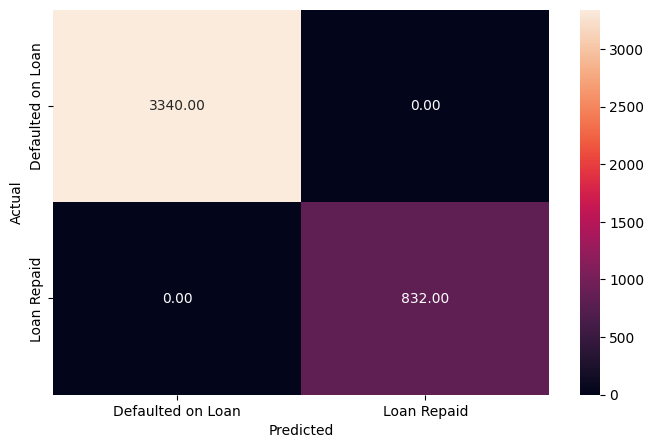

In [180]:
'''
xgb_estimator_median: This model will be trained using data imputed through the median/mode imputation method.
'''

# Assess the performance of the XGBoost Classifier model on the training dataset
y1_train_pred_xgb_estimator_median = xgb_estimator_median.predict(x1_train)

# Display the performance metrics for XGBoost Classifier model on the training dataset
metrics_score(y1_train, y1_train_pred_xgb_estimator_median)

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      1431
           1       0.81      0.62      0.70       357

    accuracy                           0.90      1788
   macro avg       0.86      0.79      0.82      1788
weighted avg       0.89      0.90      0.89      1788



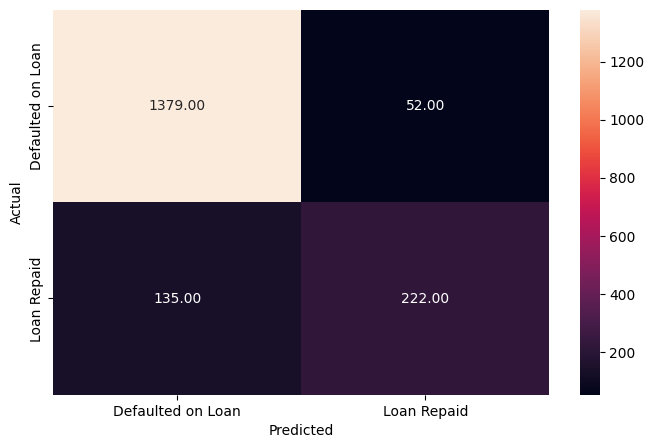

In [181]:
# Assess the performance of the XGBoost Classifier model on the test dataset
y1_test_pred_xgb_estimator_median = xgb_estimator_median.predict(x1_test)

# Display the performance metrics for XGBoost Classifier model on the test dataset
metrics_score(y1_test, y1_test_pred_xgb_estimator_median)

In [182]:
# Model Performance on the test data
xgb_estimator_median_test = model_performance_classification(xgb_estimator_median,x1_test,y1_test)

# Display the performance metrics for the XGBoost classifier model on the test dataset
xgb_estimator_median_test

Precision  Recall  Accuracy
0    0.86053 0.79276   0.89541


***Observations:***

*The model exhibits high-performance metrics when evaluated on the training dataset. However, when tested on the testing dataset, its performance notably declines. This phenomenon strongly suggests that the model may be overfitting the training data.*


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



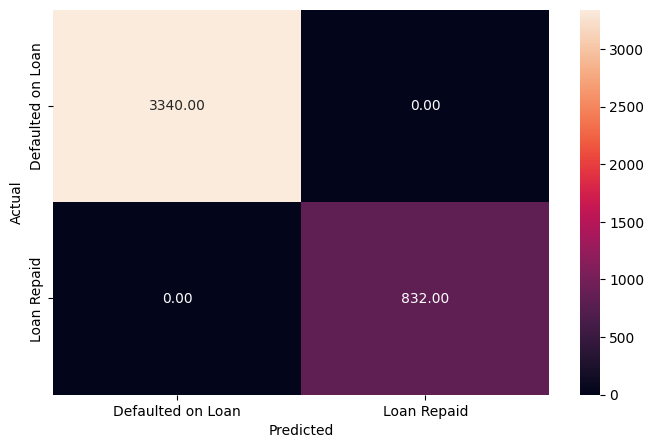

In [183]:
'''
xgb_estimator_KNN: This model will be trained using data imputed with K-NNImputer.
'''

# Assess the performance of the XGBoost Classifier model on the training dataset
y2_train_pred_xgb_estimator_KNN = xgb_estimator_KNN.predict(x2_train_imputed)

# Display the performance metrics for XGBoost Classifier model on the training dataset
metrics_score(y2_train, y2_train_pred_xgb_estimator_KNN)

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1431
           1       0.94      0.51      0.66       357

    accuracy                           0.90      1788
   macro avg       0.91      0.75      0.80      1788
weighted avg       0.90      0.90      0.88      1788



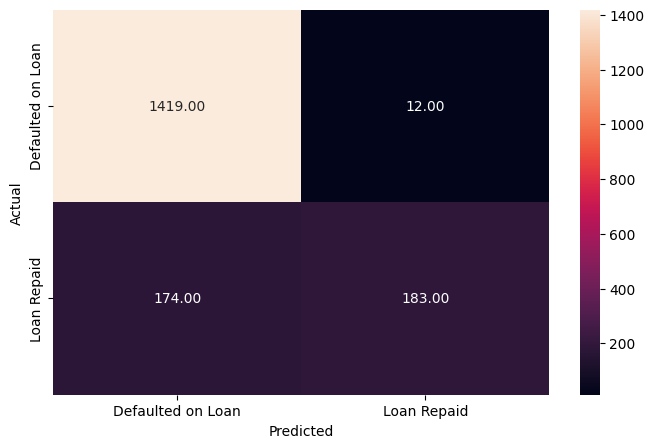

In [184]:
# Assess the performance of the XGBoost Classifier model on the test dataset
y2_test_pred_xgb_estimator_KNN = xgb_estimator_KNN.predict(x2_test_imputed)

# Display the performance metrics for XGBoost Classifier model on the test dataset
metrics_score(y2_test, y2_test_pred_xgb_estimator_KNN)

In [185]:
# Model Performance on the test data
xgb_estimator_KNN_test = model_performance_classification(xgb_estimator_KNN,x2_test_imputed,y2_test)

# Display the performance metrics for the XGBoost classifier model on the test dataset
xgb_estimator_KNN_test

Precision  Recall  Accuracy
0    0.91462 0.75211   0.89597


***Observations:***

*The model exhibits high-performance metrics when evaluated on the training dataset. However, when tested on the testing dataset, its performance notably declines. This phenomenon strongly suggests that the model may be overfitting the training data.*


              precision    recall  f1-score   support

           0       0.83      1.00      0.91      3340
           1       1.00      0.80      0.89      3340

    accuracy                           0.90      6680
   macro avg       0.92      0.90      0.90      6680
weighted avg       0.92      0.90      0.90      6680



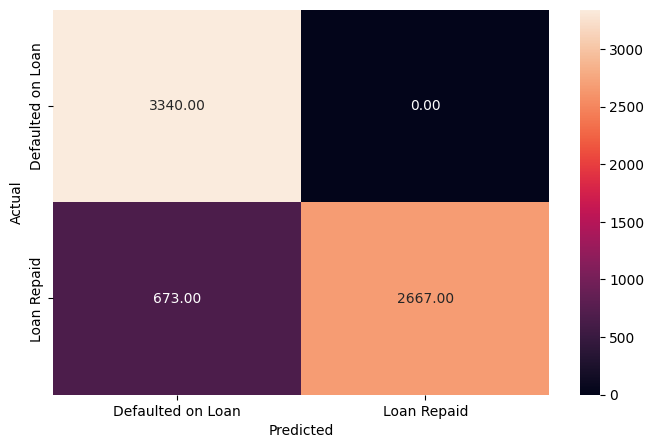

In [186]:
'''
xgb_estimator_SMOTE_median: This model will be tuned without considering the class weight hyperparameter 
and will be trained using data imputed through the median/mode imputation method.
'''

# Assess the performance of the XGBoost Classifier model on the training dataset
y1_train_pred_xgb_estimator_SMOTE_median = xgb_estimator_median.predict(x1_train_smote)

# Display the performance metrics for XGBoost Classifier model on the training dataset
metrics_score(y1_train_smote, y1_train_pred_xgb_estimator_SMOTE_median)

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1431
           1       0.95      0.82      0.88      1431

    accuracy                           0.89      2862
   macro avg       0.89      0.89      0.88      2862
weighted avg       0.89      0.89      0.88      2862



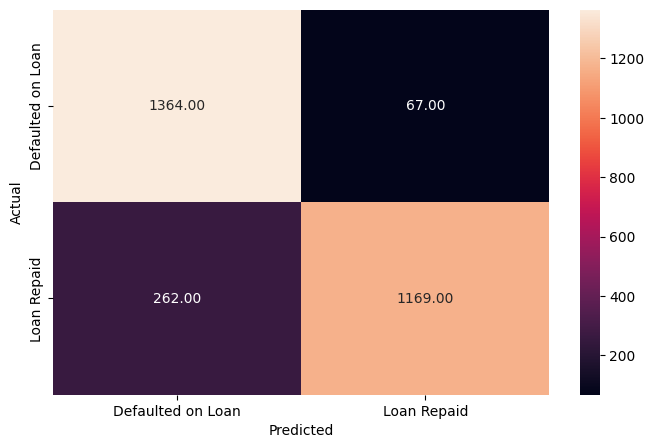

In [187]:
# Assess the performance of the XGBoost Classifier model on the test dataset
y1_test_pred_xgb_estimator_SMOTE_median = xgb_estimator_SMOTE_median.predict(x1_test_smote)

# Display the performance metrics for XGBoost Classifier model on the test dataset
metrics_score(y1_test_smote, y1_test_pred_xgb_estimator_SMOTE_median)

In [188]:
# Model Performance on the test data
xgb_estimator_SMOTE_median_test = model_performance_classification(xgb_estimator_SMOTE_median,x1_test_smote,y1_test_smote)

# Display the performance metrics for the XGBoost classifier model on the test dataset
xgb_estimator_SMOTE_median_test

Precision  Recall  Accuracy
0    0.89233 0.88505   0.88505

***Observations:***

* *The XGBoost model performs quite well on the training dataset, but its effectiveness decreases when applied to the testing dataset. Nonetheless, there is no evidence of overfitting.*
* *The model achieves the highest recall score compared to other models assessed. Recall, in this context, reflects the model's accuracy in identifying clients who default on loans, a critical factor for the bank's risk evaluation.*
* *Given the model's outstanding performance in identifying loan defaults, this model is invaluable for the bank's loan prediction tasks. Its capability to minimize false negatives enhances decision-making by reducing cases where the model incorrectly predicts loan repayment, thus improving risk assessment.*


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00      3340

    accuracy                           1.00      6680
   macro avg       1.00      1.00      1.00      6680
weighted avg       1.00      1.00      1.00      6680



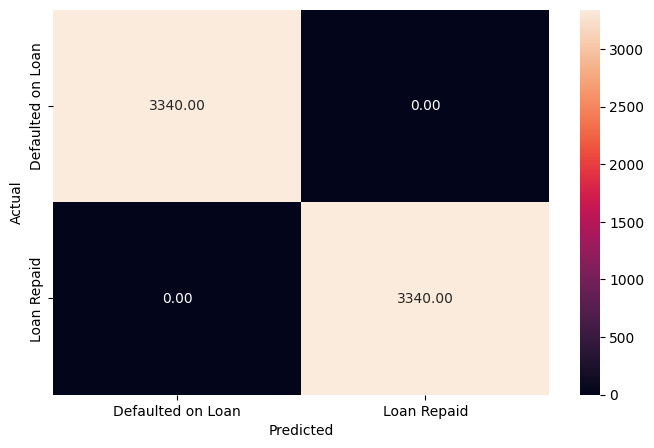

In [189]:
'''
xgb_estimator_SMOTE_KNN: This model will be tuned without considering the class weight hyperparameter 
and will be trained using data imputed with K-NNImputer and SMOTE.
'''

# Assess the performance of the XGBoost Classifier model on the training dataset
y2_train_pred_xgb_estimator_SMOTE_KNN = xgb_estimator_SMOTE_KNN.predict(x2_train_smote)

# Display the performance metrics for XGBoost Classifier model on the training dataset
metrics_score(y2_train_smote, y2_train_pred_xgb_estimator_SMOTE_KNN)

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      1431
           1       0.98      0.83      0.90      1431

    accuracy                           0.91      2862
   macro avg       0.92      0.91      0.91      2862
weighted avg       0.92      0.91      0.91      2862



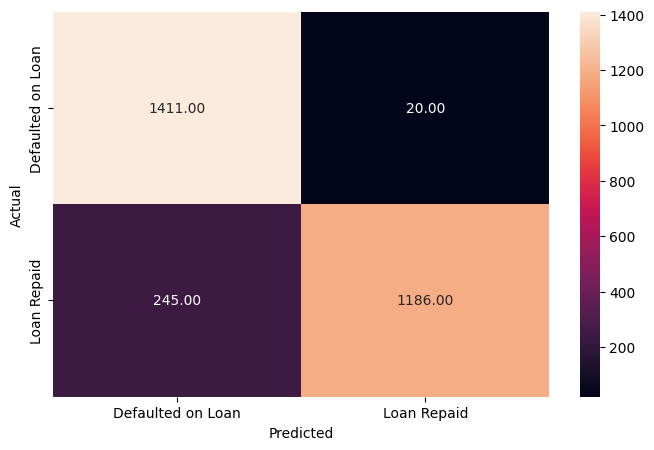

In [190]:
# Assess the performance of the XGBoost Classifier model on the test dataset
y2_test_pred_xgb_estimator_SMOTE_KNN = xgb_estimator_SMOTE_KNN.predict(x2_test_smote)

# Display the performance metrics for XGBoost Classifier model on the test dataset
metrics_score(y2_test_smote, y2_test_pred_xgb_estimator_SMOTE_KNN)

In [191]:
# Model Performance on the test data
xgb_estimator_SMOTE_KNN_test = model_performance_classification(xgb_estimator_SMOTE_KNN,x2_test_smote,y2_test_smote)

# Display the performance metrics for the XGBoost classifier model on the test dataset
xgb_estimator_SMOTE_KNN_test

Precision  Recall  Accuracy
0    0.91773 0.90741   0.90741


***Observations:***

*The model performs exceptionally well when trained on the dataset, but its performance drops significantly when tested on a separate dataset. This suggests potential overfitting of the model to the training data.*



In [192]:
# Comparison of the performance of the models done so far (logistic regression models and the Decision Tree models) on the test dataset.

models_test_comp_df = pd.concat(
    [
        lg1_test_median.T,
        lg2_test_KNN.T,
        dt1_test_median.T,
        dt2_test_KNN.T,
        dt_smote_1_test_median.T,
        dt_smote_2_test_KNN.T,
        dt_estimator_median_test.T,
        dt_estimator_KNN_test.T,
        dt_estimator_SMOTE_median_test.T,
        dt_estimator_SMOTE_KNN_test.T,
        rfc_test_median.T,
        rfc_test_KNN.T,
        rfc_SMOTE_test_median.T,
        rfc_SMOTE_test_KNN.T,
        rfc_estimator_median_test.T,
        rfc_estimator_KNN_test.T,
        rfc_estimator_SMOTE_median_test.T,
        rfc_estimator_SMOTE_KNN_test.T,
        xgb_median_test.T,
        xgb_KNN_test.T,
        xgb_SMOTE_median_test.T,
        xgb_SMOTE_KNN_test.T,
        xgb_estimator_median_test.T,
        xgb_estimator_KNN_test.T,
        xgb_estimator_SMOTE_median_test.T,
        xgb_estimator_SMOTE_KNN_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Original Logistic Regression with median imputer",
    "Original Logistic Regression with K-NNimputer",
    "Original Decision Tree with median imputer",
    "Original Decision Tree with K-NNimputer",
    "Original Decision Tree with median imputer & SMOTE",
    "Original Decision Tree with K-NNimputer & SMOTE",
    "Tuned Decision Tree with median imputer",
    "Tuned Decision Tree with K-NNimputer",
    "Tuned Decision Tree with median imputer & SMOTE",
    "Tuned Decision Tree with K-NNimputer & SMOTE",
    "Original Random Forest with median imputer",
    "Original Random Forest with K-NNimputer",
    "Original Random Forest with median imputer & SMOTE",
    "Original Random Forest with K-NNimputer & SMOTE",
    "Tuned Random Forest with median imputer",
    "Tuned Random Forest with K-NNimputer",
    "Tuned Random Forest with median imputer & SMOTE",
    "Tuned Random Forest with K-NNimputer & SMOTE",
    "Original XGBoost with median imputer",
    "Original XGBoost with K-NNimputer",
    "Original XGBoost with median imputer & SMOTE",
    "Original XGBoost with K-NNimputer & SMOTE",
    "Tuned XGBoost with median imputer",
    "Tuned XGBoost with K-NNimputer",
    "Tuned XGBoost with median imputer & SMOTE",
     "Tuned XGBoost with K-NNimputer & SMOTE"
    
]
print("Performance comparison on the different model done on the test dataset:")
models_test_comp_df.T

Performance comparison on the different model done on the test dataset:


Precision  Recall  \
Original Logistic Regression with median imputer      0.75181 0.53362   
Original Logistic Regression with K-NNimputer         0.73830 0.52942   
Original Decision Tree with median imputer            0.76908 0.75044   
Original Decision Tree with K-NNimputer               0.72060 0.69583   
Original Decision Tree with median imputer & SMOTE    0.78581 0.77358   
Original Decision Tree with K-NNimputer & SMOTE       0.79974 0.78931   
Tuned Decision Tree with median imputer               0.75530 0.81458   
Tuned Decision Tree with K-NNimputer                  0.64215 0.65283   
Tuned Decision Tree with median imputer & SMOTE       0.77883 0.77883   
Tuned Decision Tree with K-NNimputer & SMOTE          0.62619 0.58665   
Original Random Forest with median imputer            0.86601 0.79275   
Original Random Forest with K-NNimputer               0.92656 0.70764   
Original Random Forest with median imputer & SMOTE    0.85398 0.86281   
Original Random Forest with K-NNimputer & SMOTE       0.89632 0.88015   
Tuned Random Forest with median imputer               0.80681 0.81066   
Tuned Random Forest with K-NNimputer                  0.88427 0.74617   
Tuned Random Forest with median imputer & SMOTE       0.82923 0.79453   
Tuned Random Forest with K-NNimputer & SMOTE          0.89553 0.88155   
Original XGBoost with median imputer                  0.86140 0.79170   
Original XGBoost with K-NNimputer                     0.90271 0.75036   
Original XGBoost with median imputer & SMOTE          0.90098 0.89413   
Original XGBoost with K-NNimputer & SMOTE             0.91459 0.90566   
Tuned XGBoost with median imputer                     0.86053 0.79276   
Tuned XGBoost with K-NNimputer                        0.91462 0.75211   
Tuned XGBoost with median imputer & SMOTE             0.89233 0.88505   
Tuned XGBoost with K-NNimputer & SMOTE                0.91773 0.90741   

                                                    Accuracy  
Original Logistic Regression with median imputer     0.80872  
Original Logistic Regression with K-NNimputer        0.80705  
Original Decision Tree with median imputer           0.85123  
Original Decision Tree with K-NNimputer              0.82271  
Original Decision Tree with median imputer & SMOTE   0.77358  
Original Decision Tree with K-NNimputer & SMOTE      0.78931  
Tuned Decision Tree with median imputer              0.83949  
Tuned Decision Tree with K-NNimputer                 0.76566  
Tuned Decision Tree with median imputer & SMOTE      0.77883  
Tuned Decision Tree with K-NNimputer & SMOTE         0.58665  
Original Random Forest with median imputer           0.89709  
Original Random Forest with K-NNimputer              0.88199  
Original Random Forest with median imputer & SMOTE   0.90828  
Original Random Forest with K-NNimputer & SMOTE      0.88015  
Tuned Random Forest with median imputer              0.87696  
Tuned Random Forest with K-NNimputer                 0.88814  
Tuned Random Forest with median imputer & SMOTE      0.88479  
Tuned Random Forest with K-NNimputer & SMOTE         0.88155  
Original XGBoost with median imputer                 0.89541  
Original XGBoost with K-NNimputer                    0.89318  
Original XGBoost with median imputer & SMOTE         0.89413  
Original XGBoost with K-NNimputer & SMOTE            0.90566  
Tuned XGBoost with median imputer                    0.89541  
Tuned XGBoost with K-NNimputer                       0.89597  
Tuned XGBoost with median imputer & SMOTE            0.88505  
Tuned XGBoost with K-NNimputer & SMOTE               0.90741

***Observations:***

*After a thorough evaluation, we found that the XGBoost model, fine-tuned with K-NN imputer and SMOTE, achieved the highest precision, recall, and accuracy scores respectively (0.91773, 0.90741, and 0.90741) among all models tested. However, there's a concern about overfitting the training data, which might affect its generalization to new data.*

*On the other hand, the tuned XGBoost model with median imputer and SMOTE didn't exhibit signs of overfitting. Not only does it outperform other models without overfitting concerns in terms of precision (0.89233), recall (0.88505), and accuracy (0.88505), but it also excels in identifying loan defaults. This makes it invaluable for the bank's loan prediction tasks. By minimizing false negatives, it enhances risk assessment and decision-making. Therefore, among all the models assessed, we highly recommend this as the final model for the bank's use.* 


**Next step: Let's examine the feature importance of the best models.**

<Axes: xlabel='Importance', ylabel='None'>

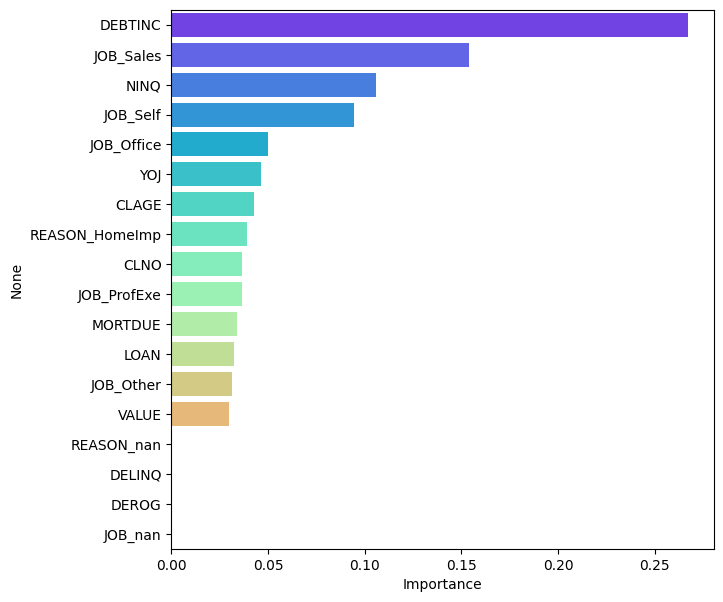

In [193]:
'''
Plot the feature importance of the tuned XGBoost model with median imputer and SMOTE
'''

# Get feature importances from the decision tree model
importances = xgb_estimator_SMOTE_median.feature_importances_

# Get column names of the features
columns = X1.columns

# Create a DataFrame to store feature importances and sort them
importance_xgb_estimator_SMOTE_median = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

# Set up the figure size
plt.figure(figsize=(7, 7))

# Define custom colors for the bar plot with rainbow gradient
color_palette = sns.color_palette("rainbow", len(importance_xgb_estimator_SMOTE_median))

# Plot bar plot with rainbow gradient colors
sns.barplot(x=importance_xgb_estimator_SMOTE_median.Importance, y=importance_xgb_estimator_SMOTE_median.index, palette=color_palette)
  

***Key Feature Observations:***

*Upon analyzing the important features in our recommended model, the tuned XGBoost with median imputer and SMOTE, we found that the most crucial feature is the Debt-to-Income Ratio (`DEBTINC`). Following this, the number of recent credit inquiries (`NINQ`), specific job categories such as self-employed, sales, and office positions (`JOB`), years at the present job, age of the oldest credit line (`CLAGE`), the reason for loan request (`REASON`) with a focus on home improvement (`HomeImp`), the amount due on existing mortgage (`MORTDUE`), current property value (`VALUE`), approved loan amount (`LOAN`), professional executive job category (`JOB`), and other job categories (`JOB`) also play significant roles.*

## **Conclusion**
---
We conducted an analysis of the Home Equity dataset (HMEQ), consisting of information on loan performance for 5960 recent home equity loans. The target feature, denoted as BAD, represents a binary variable indicating whether an applicant has defaulted on loans. This dataset exhibits class imbalance, with approximately 20 percent of instances representing clients who defaulted on loans. With twelve features available, we employed machine learning algorithms and predictive modeling techniques to construct a robust classification model. Leveraging historical loan data was instrumental in developing a model capable of forecasting potential loan defaults. Our analysis identified false negative predictions as having the greatest impact on banks, as they occur when the model fails to predict loan defaults that actually happen. To address this, we prioritized maximizing recall, which measures the proportion of true positives to all actual positives, in our predictive model design.

---
**Based on our analysis, we can confidently assert that the following features play a crucial role in accurately predicting whether a client will default on a loan.**

---

*1. **Number of Recent Credit Inquiries (NINQ):** This feature indicates the frequency of credit inquiries made by the applicant within a certain period. A high number of recent inquiries may suggest financial instability or a higher likelihood of taking on additional debt, which could increase the risk of default.*

*2. **Debt-to-Income Ratio (DEBTINC):** The debt-to-income ratio measures the proportion of the applicant's monthly debt payments to their monthly gross income. A higher debt-to-income ratio indicates a greater financial burden relative to income, which may signal a higher risk of default if the applicant's income is insufficient to cover their debts.*

*3. **Age of the Oldest Credit Line (CLAGE):** The age of the oldest credit line reflects the length of the applicant's credit history. A longer credit history typically indicates financial stability and responsible credit management, which may lower the risk of default.*

*4. **Number of Existing Credit Lines (CLNO):** The number of existing credit lines represents the applicant's credit utilization and borrowing history. A higher number of credit lines may suggest a greater reliance on credit and potentially higher debt levels, increasing the risk of default.*

*5. **Amount of Loan Approved (LOAN):** The loan amount approved signifies the financial commitment undertaken by the applicant. A larger loan amount may indicate a higher risk if the applicant struggles to repay the loan, particularly if it exceeds their repayment capacity.*

*6. **Number of Years at Present Job (YOJ):** Stability in employment tenure reflects financial stability and consistent income. Applicants with longer tenure at their current job may be perceived as lower risk due to the likelihood of steady income.*

*7. **Amount Due on Existing Mortgage (MORTDUE):** The amount due on the existing mortgage represents the outstanding balance on the applicant's mortgage. A higher mortgage balance may indicate higher debt levels and financial strain, increasing the risk of default.*

*8. **Current Value of Property (VALUE):** The current value of the property serves as collateral for the loan. A higher property value provides greater security for the lender and may lower the risk of default, as the lender can recover more of the outstanding loan amount through foreclosure if necessary.*

*9. **Missing Values in Type of Job:** Various job categories provide insights into borrowers' income sources and stability, impacting repayment capacity. It captures a diverse range of employment situations and income levels, affecting borrowers' ability to service debt. Without this information, it may be challenging to assess the applicant's financial stability and repayment capacity accurately, leading to higher uncertainty and potentially higher risk.*

*10. **Reason for Loan Request (REASON), specifically Home Improvement (HomeImp):** Home improvement loans may indicate investments in assets, potentially enhancing borrowers' financial stability. It distinguishes between loan purposes, with home improvements typically associated with asset-building rather than discretionary spending.*


These features collectively provide valuable insights into the applicant's financial health, creditworthiness, and risk profile, allowing lenders to make more informed decisions and mitigate the risk of defaults.

---

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):** 
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?


We employed various techniques and modeling approaches to develop a model that effectively serves the bank's interest in identifying clients who have repaid their loans while minimizing false negative cases. Given the presence of missing values in the dataset, we utilized two imputation techniques. Firstly, missing values were filled using the median for numerical features and the mode for categorical features. Secondly, we employed the K-NN imputer to impute missing data. Since the target feature exhibited imbalance, we applied the SMOTE method to augment the minority class.

Following data preparation and cleaning, we constructed predictive models using four different classification methods: Logistic Regression, Decision Trees, Random Forests Classifier, and XGBoost Classifier. By combining these techniques, we built and evaluated 26 predictive models, with only two meeting the criteria for effectively identifying clients who defaulted on loans.

The top-performing model is a tuned XGBoost model classifier with median imputer and SMOTE utilizing data imputed via median and mode imputation and SMOTE augmentation. This model achieved a precision of 90%, a recall of 89%, and an accuracy of 89%.

To further enhance predictive model performance, consideration of deep learning algorithms is advisable.

---

**2. Refined insights:** 

1. Monitoring and analyzing the frequency of recent credit inquiries can serve as an early warning indicator of potential financial instability among loan applicants. Lenders should consider implementing policies to scrutinize applications with a high number of recent inquiries more closely.

2. The debt-to-income ratio is a critical metric for assessing an applicant's financial health and repayment capacity. Lenders should establish maximum acceptable thresholds for debt-to-income ratios based on risk appetite and regulatory requirements to minimize the likelihood of defaults.

3. Longer credit histories typically indicate responsible credit management and lower default risk. Lenders should prioritize applicants with longer credit histories, as they are likely to have established patterns of timely repayment.

4. Higher numbers of existing credit lines may signal increased reliance on credit and potential financial strain. Lenders should carefully evaluate applicants with numerous credit lines to ensure they can manage additional debt responsibly.

5. Larger loan amounts represent higher financial commitments and, consequently, higher default risk if applicants struggle to meet repayment obligations. Lenders should assess applicants' repayment capacity thoroughly and consider imposing limits on loan amounts based on income and other financial factors such as debt-to-asset ratio, savings and assets, and monthly expenses.

6. Stability in employment tenure is a positive indicator of financial stability and consistent income. Lenders should prioritize applicants with longer job tenures, as they are more likely to have steady income streams and lower risk of default.

7. Higher mortgage balances may indicate elevated debt levels and financial strain. Lenders should carefully evaluate applicants with substantial mortgage debts to ensure they can manage additional loan obligations effectively.

8. Property values serve as collateral for loans and impact lenders' ability to recover outstanding balances in the event of default. Lenders should consider applicants with higher property values as lower risk, as they provide greater security for loan agreements.

9. Missing information on applicants' employment status introduces uncertainty into the assessment process and may hinder accurate risk evaluation. Lenders should implement strategies to verify and obtain complete employment information from applicants to enhance the accuracy of credit assessments.

By leveraging these insights and implementing robust risk management practices, lenders can optimize their loan approval processes, minimize default risk, and safeguard their financial interests effectively. Additionally, continuous monitoring and refinement of lending criteria based on evolving market dynamics and regulatory requirements are essential to maintain a resilient loan portfolio.

---

**3. Proposal for the final solution design:** 

We recommend utilizing the fine-tuned XGBoost model classifier with a median imputer and SMOTE. This model not only avoids overfitting but also demonstrates superior performance compared to other models, achieving precision, recall, and accuracy scores of 0.89233, 0.88505, and 0.88505, respectively. Its exceptional ability to identify loan defaults makes it invaluable for the bank's loan prediction tasks. By minimizing false negatives, it enhances risk assessment and decision-making processes. Therefore, among all the models evaluated, we strongly advocate for the adoption of this model as the final choice for the bank's use.